In [263]:
import sys
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')
# Importing the dataset
df = pd.read_csv("./Data/polovnjaciOcisceni2021.csv")

In [264]:
df_names = df.columns

In [265]:
df.count()

Marka                   28545
Model                   28545
Godiste                 28545
Kilometraza             28545
Karoserija              28545
Gorivo                  28545
Kubikaza                28545
Snaga motora            28545
Cena                    28545
EKM                     28545
Pogon                   28545
Menjac                  28545
Broj vrata              28545
Broj sedista            28545
Klima                   28545
Boja                    28545
Materijal enterijera    28545
Boja enterijera         28545
dtype: int64

In [266]:
df_names

Index(['Marka', 'Model', 'Godiste', 'Kilometraza', 'Karoserija', 'Gorivo',
       'Kubikaza', 'Snaga motora', 'Cena', 'EKM', 'Pogon', 'Menjac',
       'Broj vrata', 'Broj sedista', 'Klima', 'Boja', 'Materijal enterijera',
       'Boja enterijera'],
      dtype='object')

### Countplot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Volkswagen'),
  Text(1, 0, 'Audi'),
  Text(2, 0, 'Opel'),
  Text(3, 0, 'BMW'),
  Text(4, 0, 'Peugeot'),
  Text(5, 0, 'Renault'),
  Text(6, 0, 'Fiat'),
  Text(7, 0, 'Citroen'),
  Text(8, 0, 'Ford'),
  Text(9, 0, 'Mercedes Benz'),
  Text(10, 0, 'Skoda'),
  Text(11, 0, 'Alfa Romeo'),
  Text(12, 0, 'Seat'),
  Text(13, 0, 'Nissan'),
  Text(14, 0, 'Toyota'),
  Text(15, 0, 'Mazda'),
  Text(16, 0, 'Hyundai'),
  Text(17, 0, 'MINI'),
  Text(18, 0, 'Lancia'),
  Text(19, 0, 'Volvo'),
  Text(20, 0, 'Kia'),
  Text(21, 0, 'Chevrolet'),
  Text(22, 0, 'Honda'),
  Text(23, 0, 'Suzuki'),
  Text(24, 0, 'Land Rover'),
  Text(25, 0, 'Dacia'),
  Text(26, 0, 'Mitsubishi')])

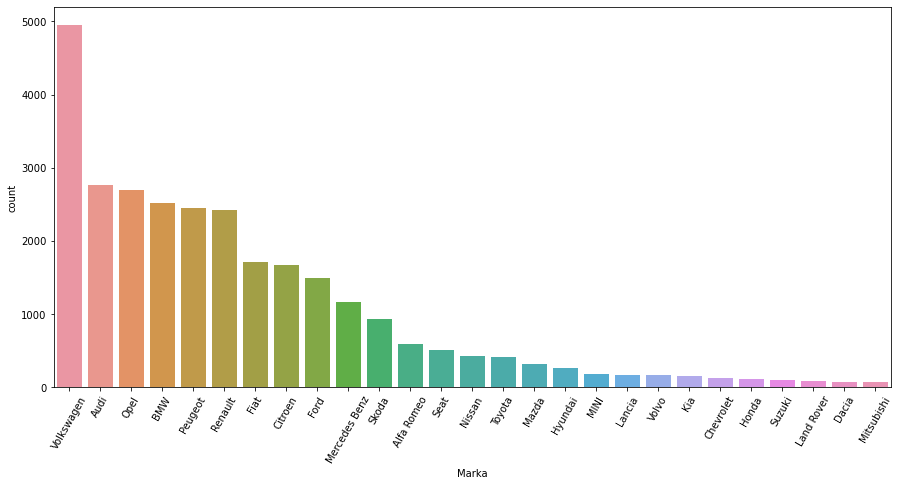

In [267]:
plt.figure(figsize=(15,7))
sns.countplot(df['Marka'], order=df['Marka'].value_counts().index)
plt.xticks(rotation=60)

<AxesSubplot:xlabel='Godiste', ylabel='Density'>

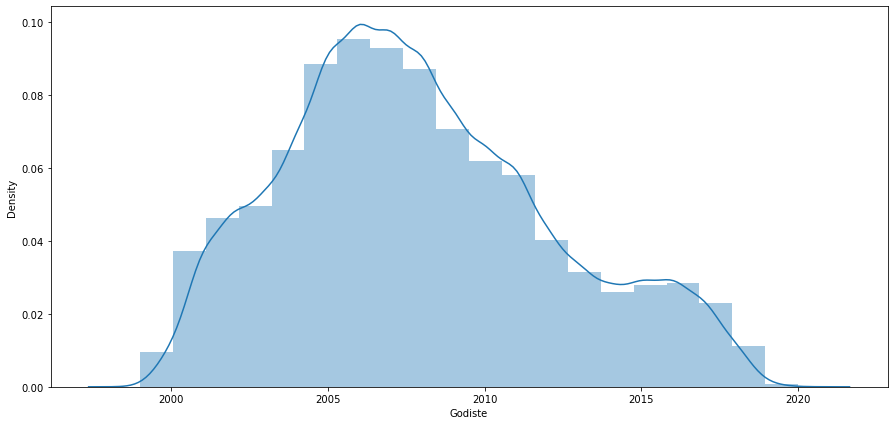

In [268]:
plt.figure(figsize=(15,7))
sns.distplot(df['Godiste'], bins=20)


<AxesSubplot:xlabel='Kilometraza', ylabel='Density'>

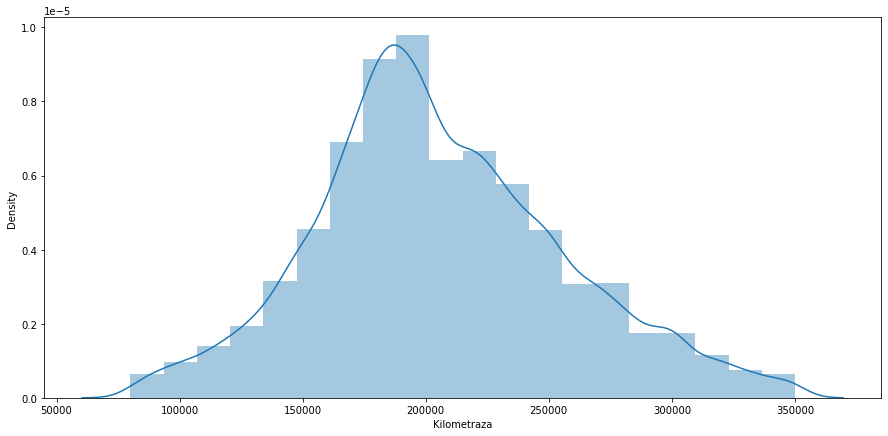

In [269]:
plt.figure(figsize=(15,7))
sns.distplot(df['Kilometraza'], bins=20)


In [270]:
df.drop(df[df['Karoserija']=='Kupe'].index, inplace=True)

<AxesSubplot:xlabel='Karoserija', ylabel='count'>

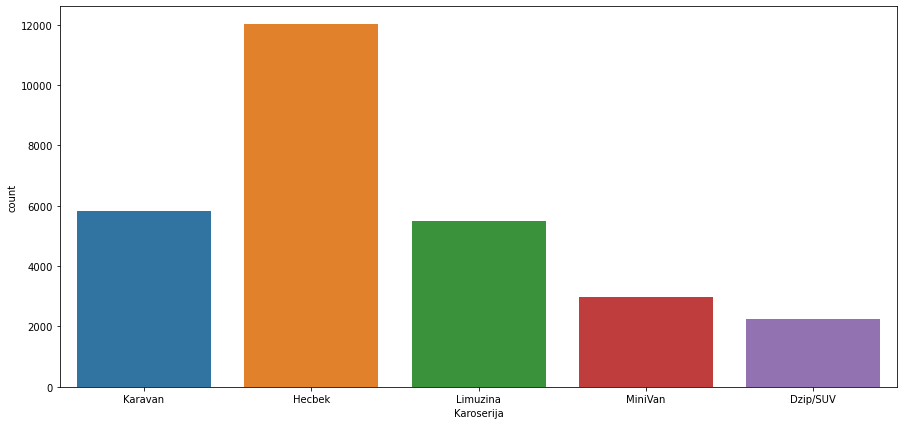

In [271]:
plt.figure(figsize=(15,7))
sns.countplot(df['Karoserija'])

<AxesSubplot:xlabel='Gorivo', ylabel='count'>

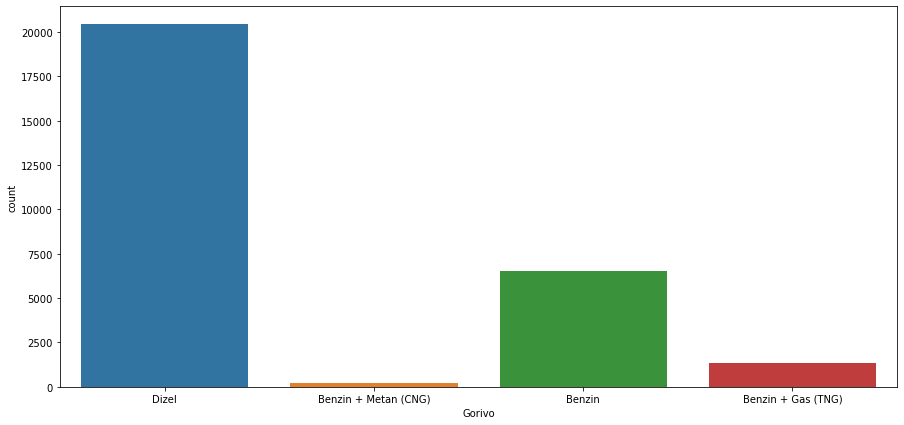

In [272]:
plt.figure(figsize=(15,7))
sns.countplot(df['Gorivo'])

In [273]:
df['Gorivo'].unique()

array(['Dizel', 'Benzin + Metan (CNG)', 'Benzin', 'Benzin + Gas (TNG)'],
      dtype=object)

In [274]:
df.drop(df[df['Gorivo']=='Benzin + Metan (CNG)'].index, inplace=True)

In [275]:
df['Kubikaza'].value_counts()

2.0    8759
1.6    5257
1.9    3459
1.4    2929
1.2    2213
1.5    1573
1.7     790
1.8     729
1.1     443
1.3     396
1.0     390
3.0     348
2.2     332
2.1     309
2.5     227
0.9      65
2.7      63
2.4      61
Name: Kubikaza, dtype: int64

<AxesSubplot:xlabel='Snaga motora', ylabel='Density'>

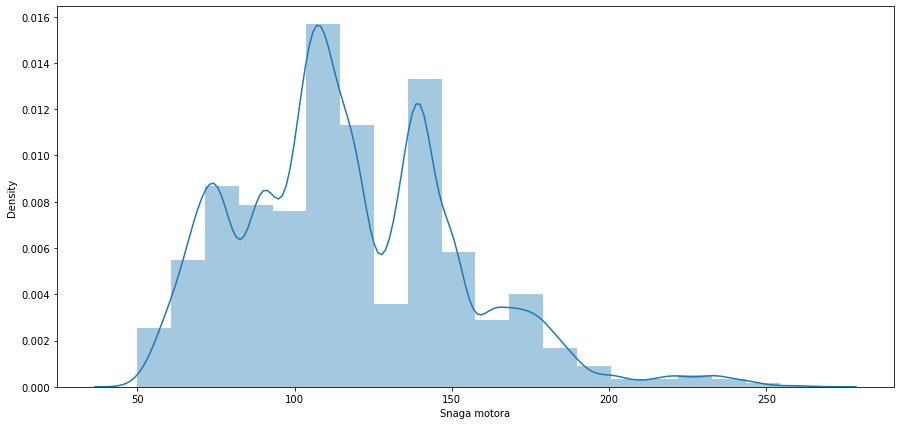

In [276]:
plt.figure(figsize=(15,7))
sns.distplot(df['Snaga motora'], bins=20)


In [277]:
df = df.groupby('Snaga motora').filter(lambda x: len(x)>30)


<AxesSubplot:xlabel='Snaga motora', ylabel='Density'>

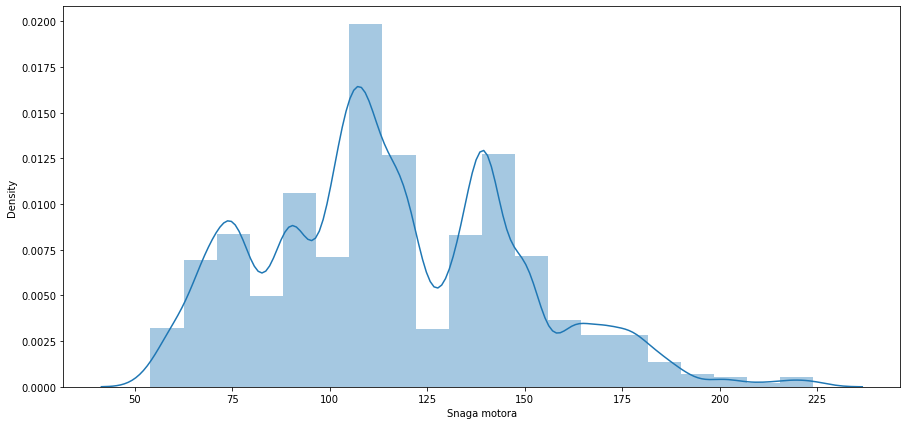

In [278]:
df.drop(df[df['Snaga motora']>=225].index, inplace=True)
plt.figure(figsize=(15,7))
sns.distplot(df['Snaga motora'], bins=20)


<AxesSubplot:xlabel='EKM', ylabel='count'>

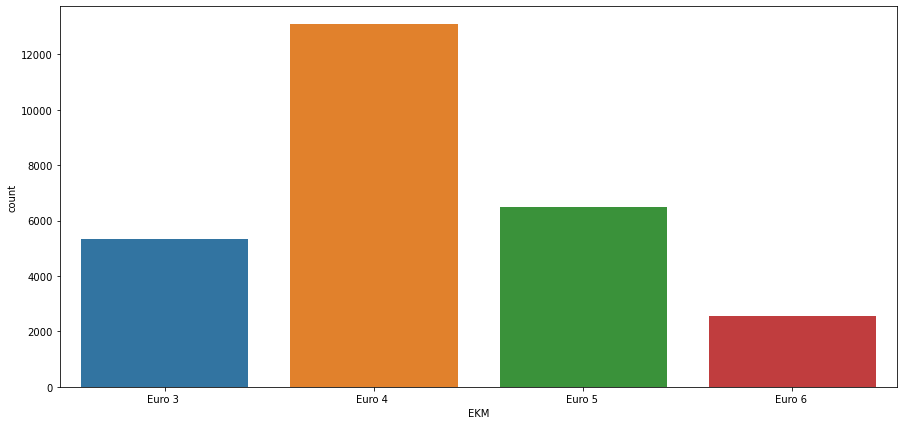

In [279]:
plt.figure(figsize=(15,7))
sns.countplot(df['EKM'])

<AxesSubplot:xlabel='Pogon', ylabel='count'>

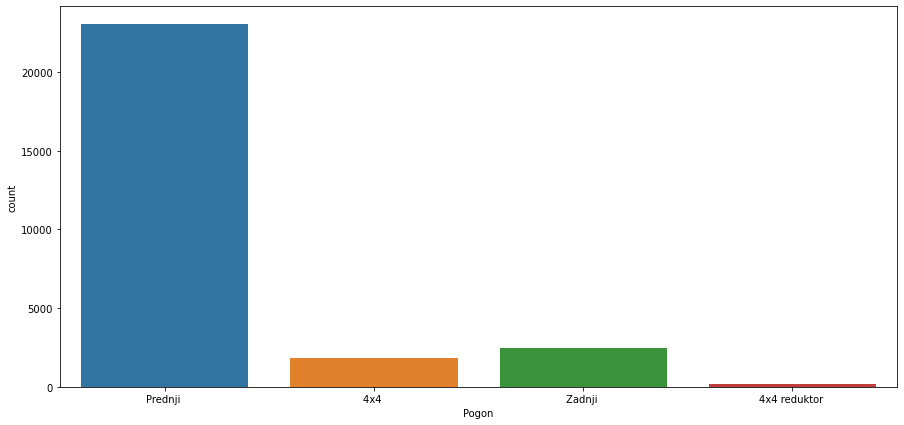

In [280]:
plt.figure(figsize=(15,7))
sns.countplot(df['Pogon'])

In [281]:
df['Pogon'].unique()

array(['Prednji ', '4x4 ', 'Zadnji ', '4x4 reduktor '], dtype=object)

In [282]:
df[(df['Pogon']=='Zadnji ')]['Marka'].value_counts()

BMW              1913
Mercedes Benz     510
Opel               10
Peugeot             8
Volkswagen          8
Audi                7
Renault             6
Fiat                3
Ford                3
Toyota              2
Mazda               2
Skoda               2
Citroen             2
Lancia              2
Honda               1
Hyundai             1
MINI                1
Name: Marka, dtype: int64

In [283]:
df.drop(df[(df['Pogon']=='Zadnji ') & (~df['Marka'].isin(['BMW', 'Mercedes Benz']))].index, inplace=True)

In [284]:
df[df['Pogon']=='4x4 reduktor ']

Marka         Model  Godiste  Kilometraza Karoserija  Gorivo  \
146    Mitsubishi     Outlander     2007       191935   Dzip/SUV   Dizel   
147    Mitsubishi     Outlander     2008       253177   Dzip/SUV   Dizel   
174    Land Rover    Freelander     2003       191216   Dzip/SUV   Dizel   
483        Suzuki  Grand Vitara     2008       225129   Dzip/SUV  Benzin   
529           BMW            X3     2007       228000   Dzip/SUV   Dizel   
...           ...           ...      ...          ...        ...     ...   
27758        Fiat         Panda     2013       146500     Hecbek   Dizel   
27853  Volkswagen       Touareg     2006       325594   Dzip/SUV   Dizel   
27856  Mitsubishi     Outlander     2008       266588   Dzip/SUV   Dizel   
28230      Suzuki  Grand Vitara     2006       203000   Dzip/SUV   Dizel   
28233      Suzuki  Grand Vitara     2007       171690   Dzip/SUV   Dizel   

       Kubikaza  Snaga motora  Cena      EKM          Pogon  \
146         2.0           140  6499  Euro 4   4x4 reduktor    
147         2.0           140  6700  Euro 4   4x4 reduktor    
174         1.9           111  3999  Euro 3   4x4 reduktor    
483         2.0           140  6700  Euro 4   4x4 reduktor    
529         2.0           163  6990  Euro 4   4x4 reduktor    
...         ...           ...   ...      ...            ...   
27758       1.3            90  7490  Euro 5   4x4 reduktor    
27853       3.0           224  6990  Euro 5   4x4 reduktor    
27856       2.0           140  6650  Euro 4   4x4 reduktor    
28230       1.9           129  5700  Euro 4   4x4 reduktor    
28233       1.9           129  6300  Euro 4   4x4 reduktor    

                             Menjac  Broj vrata  Broj sedista  \
146              Manuelni 6 brzina   4/5 vrata              5   
147              Manuelni 6 brzina   4/5 vrata              7   
174              Manuelni 5 brzina   4/5 vrata              5   
483              Manuelni 5 brzina   4/5 vrata              5   
529              Manuelni 6 brzina   4/5 vrata              5   
...                             ...         ...           ...   
27758            Manuelni 6 brzina   4/5 vrata              5   
27853  Automatski / poluautomatski   4/5 vrata              5   
27856            Manuelni 6 brzina   4/5 vrata              7   
28230            Manuelni 5 brzina   4/5 vrata              5   
28233            Manuelni 5 brzina   4/5 vrata              5   

                   Klima  Boja Materijal enterijera Boja enterijera  
146    Automatska klima   Crna                 Stof            Crna  
147    Automatska klima   Siva        Prirodna koza            Crna  
174      Manuelna klima   Crna     Kombinovana koza             Bež  
483      Manuelna klima   Crna                 Stof            Crna  
529    Automatska klima   Siva                 Stof            Crna  
...                  ...   ...                  ...             ...  
27758    Manuelna klima   Bela                 Stof           Smeđa  
27853  Automatska klima   Crna        Prirodna koza             Bež  
27856    Manuelna klima   Siva                Velur            Crna  
28230  Automatska klima   Siva        Prirodna koza            Crna  
28233  Automatska klima   Siva                 Stof            Crna  

[167 rows x 18 columns]

In [285]:
df['Model'].value_counts()

A4          1127
Golf 5       746
320          745
A3           658
Polo         646
            ... 
530           16
607           15
Multipla      14
X5            13
A8             7
Name: Model, Length: 184, dtype: int64

([<matplotlib.axis.XTick at 0x1a0d835d4f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

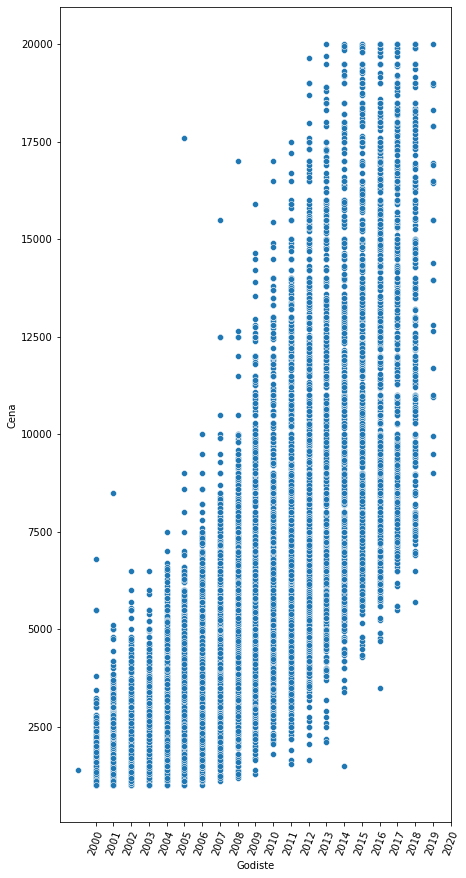

In [286]:
plt.figure(figsize=(7,15))
sns.scatterplot(df['Godiste'], df['Cena'])
plt.xticks(np.arange(2000,2021), rotation=70)

In [287]:
df.drop(df[(df['Godiste']>=2019) | (df['Godiste']<2000)].index, inplace=True)

([<matplotlib.axis.XTick at 0x1a0dab152b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

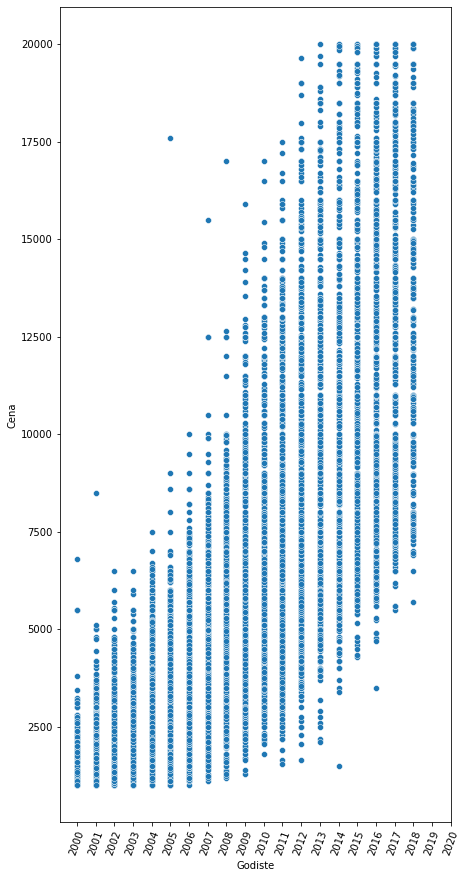

In [288]:
plt.figure(figsize=(7,15))
sns.scatterplot(df['Godiste'], df['Cena'])
plt.xticks(np.arange(2000,2021), rotation=70)

In [289]:
df['Model'].value_counts()

A4          1127
Golf 5       746
320          744
A3           658
Polo         646
            ... 
530           16
607           15
Multipla      14
X5            13
A8             7
Name: Model, Length: 184, dtype: int64

In [290]:
for brand in df['Marka'].unique():
    print('*'*30)
    print(brand)
    for model in df[df['Marka']==brand]['Model'].unique():
        print('Model {} \n'.format(model))
        no_types = (df[(df['Model']==model)]['Karoserija'].value_counts().tolist())
        types = (df[(df['Model']==model)]['Karoserija'].value_counts().index.tolist())
        dict_t = dict(zip(types, no_types))
        print(dict_t)
        

******************************
Volkswagen
Model Passat B5.5 

{'Karavan': 196, 'Limuzina': 104}
Model Passat B6 

{'Karavan': 453, 'Limuzina': 171}
Model Golf 6 

{'Hecbek': 363, 'Karavan': 63, 'Limuzina': 21}
Model Golf 7 

{'Hecbek': 258, 'Karavan': 39, 'Limuzina': 17}
Model Polo 

{'Hecbek': 596, 'Limuzina': 49, 'Karavan': 1}
Model Tiguan 

{'Dzip/SUV': 176, 'Hecbek': 1}
Model Golf 4 

{'Hecbek': 235, 'Karavan': 72, 'Limuzina': 37}
Model Sharan 

{'MiniVan': 106, 'Karavan': 2, 'Limuzina': 1}
Model Golf 5 

{'Hecbek': 645, 'Limuzina': 60, 'Karavan': 41}
Model Passat B8 

{'Limuzina': 88, 'Karavan': 84}
Model Passat B7 

{'Karavan': 118, 'Limuzina': 66}
Model Touran 

{'MiniVan': 286, 'Limuzina': 14, 'Hecbek': 10, 'Karavan': 4, 'Dzip/SUV': 1}
Model Caddy 

{'MiniVan': 63, 'Limuzina': 2, 'Karavan': 1}
Model Passat CC 

{'Limuzina': 33, 'Hecbek': 3}
Model Bora 

{'Limuzina': 39, 'Karavan': 22}
Model Touareg 

{'Dzip/SUV': 62, 'Limuzina': 1, 'Karavan': 1}
Model Golf Plus 

{'MiniVan': 65

{'Hecbek': 48, 'Limuzina': 7}
Model 3 

{'Hecbek': 75, 'Limuzina': 12}
Model 6 

{'Karavan': 54, 'Limuzina': 53, 'Hecbek': 14}
Model 5 

{'MiniVan': 37, 'Limuzina': 1, 'Karavan': 1}
******************************
Mitsubishi
Model Outlander 

{'Dzip/SUV': 34}
Model Colt 

{'Hecbek': 26, 'Limuzina': 4, 'MiniVan': 2}
******************************
Kia
Model Sportage 

{'Dzip/SUV': 86}
Model cee`d 

{'Hecbek': 24, 'Karavan': 3, 'Limuzina': 2}
Model Sorento 

{'Dzip/SUV': 33, 'Hecbek': 1}
******************************
Chevrolet
Model Captiva 

{'Dzip/SUV': 52}
Model Cruze 

{'Limuzina': 32, 'Hecbek': 12, 'Karavan': 1}
Model Aveo 

{'Limuzina': 13, 'Hecbek': 13}
******************************
Suzuki
Model Grand Vitara 

{'Dzip/SUV': 48, 'Hecbek': 1}
Model Swift 

{'Hecbek': 33, 'Limuzina': 4}
******************************
Honda
Model Civic 

{'Hecbek': 49, 'Limuzina': 15, 'Karavan': 4}
Model Accord 

{'Limuzina': 33}
******************************
Dacia
Model Logan 

{'Limuzina': 22, 'Kara

In [291]:
df.drop(df[df['Model']=='Vectra B'].index, inplace=True)
df.drop(df[df['Model']=='Freelander'].index, inplace=True)

In [292]:
#df[df['Model']=='Countryman']

In [293]:
# Volkswagen
df.loc[df[(df['Model']=='Golf 6') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Karavan'
df.loc[df[(df['Model']=='Golf 7') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Karavan'
df.loc[df[(df['Model']=='Polo') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Karavan'
df.loc[df[(df['Model']=='Golf 4') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Golf 5') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Sharan')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Touran')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Caddy')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Passat CC')].index, 'Karoserija'] = 'Limuzina'
df.loc[df[(df['Model']=='Touareg')].index, 'Karoserija'] = 'Dzip/SUV'
# Audi
df.loc[df[(df['Model']=='A3') & (df['Karoserija']=='Karavan')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='A4') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Limuzina'
df.loc[df[(df['Model']=='A6') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Limuzina'
df.loc[df[(df['Model']=='Q3')].index, 'Karoserija'] = 'Dzip/SUV'
df.loc[df[(df['Model']=='A1')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='A2')].index, 'Karoserija'] = 'MiniVan'
# Fiat
df.loc[df[(df['Model']=='Evo')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Bravo')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Punto')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='500')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='500L')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Stilo') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Karavan'
df.loc[df[(df['Model']=='Panda')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Doblo')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Idea')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Idea')].index, 'Karoserija'] = 'Karavan'
df.loc[df[(df['Model']=='Multipla')].index, 'Karoserija'] = 'MiniVan'
# Ford
df.loc[df[(df['Model']=='C-Max')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Focus') & (df['Karoserija']=='MiniVan')].index, 'Karoserija'] = 'Karavan'
df.loc[df[(df['Model']=='Fusion')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Galaxy')].index, 'Karoserija'] = 'MiniVan'
# Skoda
df.loc[df[(df['Model']=='Fabia') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Superb') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Limuzina'
df.loc[df[(df['Model']=='Rapid')].index, 'Karoserija'] = 'Hecbek'
# Renault
df.loc[df[(df['Model']=='Espace')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Scenic')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Grand Scenic')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Clio') & (df['Karoserija']=='MiniVan')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Clio') & (df['Karoserija']=='MiniVan')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Twingo')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Captur')].index, 'Karoserija'] = 'Dzip/SUV'
df.loc[df[(df['Model']=='Kangoo')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Ibiza') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Karavan'
df.loc[df[(df['Model']=='Leon') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Altea')].index, 'Karoserija'] = 'MiniVan'
# Citroen
df.loc[df[(df['Model']=='C3')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='C5') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Karavan'
df.loc[df[(df['Model']=='C3 Picasso')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='C4')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='C4 Grand Picasso')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='C1')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='C2')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='C4 Picasso')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Berlingo')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Xsara Picasso')].index, 'Karoserija'] = 'MiniVan'
# Opel
df.loc[df[(df['Model']=='Agila')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Meriva')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Zafira')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Astra J') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Corsa D')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Corsa E')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Corsa C')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Vectra C') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Limuzina'
df.loc[df[(df['Model']=='Antara')].index, 'Karoserija'] = 'Dzip/SUV'
# Peugeot
df.loc[df[(df['Model']=='308') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='308') & (df['Karoserija']=='Dzip/SUV')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='207') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='208')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='107')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='407') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Limuzina'
df.loc[df[(df['Model']=='307')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='3008')].index, 'Karoserija'] = 'Dzip/SUV'
df.loc[df[(df['Model']=='2008')].index, 'Karoserija'] = 'Dzip/SUV'
df.loc[df[(df['Model']=='206') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='5008') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'MiniVan'
# BMW 
df.loc[df[(df['Model']=='320') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Limuzina'
df.loc[df[(df['Model']=='118')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='116')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='120')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='X3')].index, 'Karoserija'] = 'Dzip/SUV'
df.loc[df[(df['Model']=='X1')].index, 'Karoserija'] = 'Dzip/SUV'
df.loc[df[(df['Model']=='X5')].index, 'Karoserija'] = 'Dzip/SUV'
df.loc[df[(df['Model']=='318') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Limuzina'
df.loc[df[(df['Model']=='316') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Limuzina'
# Mini
df.loc[df[(df['Model']=='Cooper')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Countryman')].index, 'Karoserija'] = 'Dzip/SUV'
df.loc[df[(df['Model']=='One')].index, 'Karoserija'] = 'Hecbek'
# Mercedes Benz
df.loc[df[(df['Model']=='B 180')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='B 200')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='C 200') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Limuzina'
df.loc[df[(df['Model']=='C 220') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Limuzina'
df.loc[df[(df['Model']=='C 180') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Limuzina'
df.loc[df[(df['Model']=='A 160')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='A 180')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='A 170')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='A 150')].index, 'Karoserija'] = 'Hecbek'
# Hyundai
df.loc[df[(df['Model']=='i20')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Getz')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='i30') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Hecbek'
# Nissan
df.loc[df[(df['Model']=='Qashqai')].index, 'Karoserija'] = 'Dzip/SUV'
df.loc[df[(df['Model']=='Juke')].index, 'Karoserija'] = 'Dzip/SUV'
df.loc[df[(df['Model']=='Micra')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Note')].index, 'Karoserija'] = 'Hecbek'
# Alfa Romeo
df.loc[df[(df['Model']=='Giulietta')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='147')].index, 'Karoserija'] = 'Hecbek'
# Toyota
df.loc[df[(df['Model']=='Aygo')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Auris')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Yaris')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Avensis') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Limuzina'
# Lancia
df.loc[df[(df['Model']=='Ypsilon')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Delta')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Musa')].index, 'Karoserija'] = 'MiniVan'
# Land Rover
df.loc[df[(df['Model']=='Freelander')].index, 'Karoserija'] = 'Dzip/SUV'
# Mazda
df.loc[df[(df['Model']=='2')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='6') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Limuzina'
df.loc[df[(df['Model']=='5')].index, 'Karoserija'] = 'MiniVan'
# Mitsubishi
df.loc[df[(df['Model']=='Colt')].index, 'Karoserija'] = 'Hecbek'
# Kia
df.loc[df[(df['Model']=='cee`d') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Sorento')].index, 'Karoserija'] = 'Dzip/SUV'
# Suzuki
df.loc[df[(df['Model']=='Grand Vitara')].index, 'Karoserija'] = 'Dzip/SUV'
df.loc[df[(df['Model']=='Swift')].index, 'Karoserija'] = 'Hecbek'
# Dacia
df.loc[df[(df['Model']=='Logan') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Limuzina'
df.loc[df[(df['Model']=='Sandero')].index, 'Karoserija'] = 'Hecbek'

# Pogon 
df.loc[df[(df['Pogon']=='4x4 reduktor ')].index, 'Pogon'] = '4x4 '
df.loc[df[(df['Menjac']=='Automatski ')].index, 'Menjac'] = 'Automatski / poluautomatski '

In [294]:
df['Menjac'].unique()

array(['Manuelni 6 brzina ', 'Manuelni 5 brzina ',
       'Automatski / poluautomatski ', 'Automatski / poluautomatski  '],
      dtype=object)

In [295]:
for brand in df['Marka'].unique():
    print('*'*30)
    print(brand)
    for model in df[df['Marka']==brand]['Model'].unique():
        print('Model {} \n'.format(model))
        no_types = (df[(df['Model']==model)]['Karoserija'].value_counts().tolist())
        types = (df[(df['Model']==model)]['Karoserija'].value_counts().index.tolist())
        dict_t = dict(zip(types, no_types))
        print(dict_t)

******************************
Volkswagen
Model Passat B5.5 

{'Karavan': 196, 'Limuzina': 104}
Model Passat B6 

{'Karavan': 453, 'Limuzina': 171}
Model Golf 6 

{'Hecbek': 363, 'Karavan': 84}
Model Golf 7 

{'Hecbek': 258, 'Karavan': 56}
Model Polo 

{'Hecbek': 596, 'Karavan': 50}
Model Tiguan 

{'Dzip/SUV': 176, 'Hecbek': 1}
Model Golf 4 

{'Hecbek': 272, 'Karavan': 72}
Model Sharan 

{'MiniVan': 109}
Model Golf 5 

{'Hecbek': 705, 'Karavan': 41}
Model Passat B8 

{'Limuzina': 88, 'Karavan': 84}
Model Passat B7 

{'Karavan': 118, 'Limuzina': 66}
Model Touran 

{'MiniVan': 315}
Model Caddy 

{'MiniVan': 66}
Model Passat CC 

{'Limuzina': 36}
Model Bora 

{'Limuzina': 39, 'Karavan': 22}
Model Touareg 

{'Dzip/SUV': 64}
Model Golf Plus 

{'MiniVan': 65, 'Hecbek': 32, 'Limuzina': 7}
Model Jetta 

{'Limuzina': 35}
Model Passat B5 

{'Karavan': 22, 'Limuzina': 6}
Model Fox 

{'Hecbek': 29, 'Limuzina': 3}
******************************
Audi
Model A3 

{'Hecbek': 598, 'Limuzina': 60}
Model 

<AxesSubplot:xlabel='Menjac', ylabel='count'>

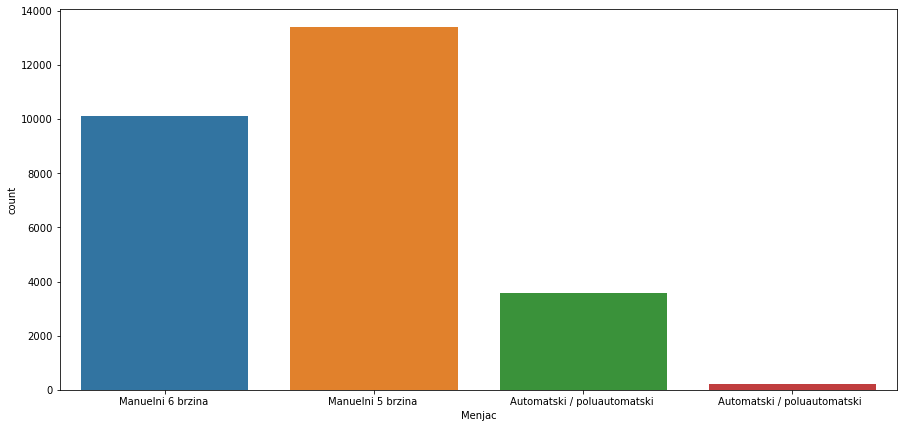

In [296]:
plt.figure(figsize=(15,7))
sns.countplot(df['Menjac'])

In [297]:
for i in range(6):
    for year in range(2000,2021):
        max = df[df['Godiste']==year]['Cena'].max()
        min = df[df['Godiste']==year]['Cena'].min()
        df.drop(df[(df['Godiste']==year) & (df['Cena']==max)].index, inplace=True)
        df.drop(df[(df['Godiste']==year) & (df['Cena']==min)].index, inplace=True)

In [298]:
for i in range(4):
    for year in range(2007,2015):
        max = df[df['Godiste']==year]['Cena'].max()
        #min = df[df['Godiste']==year]['Cena'].min()
        df.drop(df[(df['Godiste']==year) & (df['Cena']==max)].index, inplace=True)
        #df.drop(df[(df['Godiste']==year) & (df['Cena']==min)].index, inplace=True)

([<matplotlib.axis.XTick at 0x1a0d7119f70>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

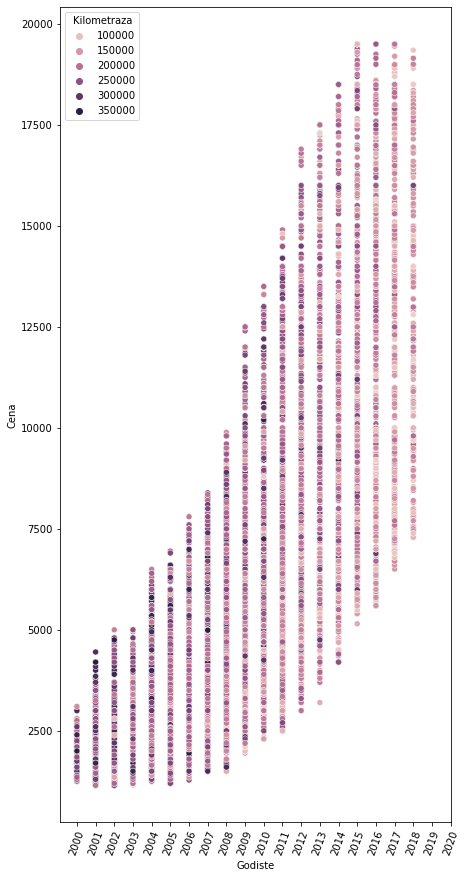

In [299]:
plt.figure(figsize=(7,15))
sns.scatterplot(df['Godiste'], df['Cena'], data=df, hue='Kilometraza')
plt.xticks(np.arange(2000,2021), rotation=70)

In [300]:
df = df.groupby('Model').filter(lambda x: len(x)>=15)

<AxesSubplot:xlabel='Kilometraza'>

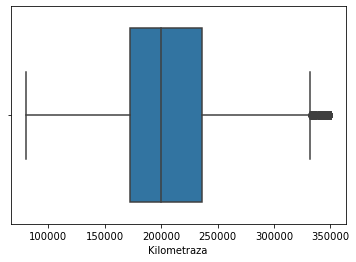

In [301]:
sns.boxplot(df['Kilometraza'])

In [302]:
df.drop(df[(df['Kilometraza']>=320000)].index, inplace=True)

<AxesSubplot:xlabel='Kilometraza'>

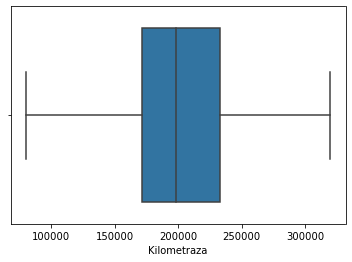

In [303]:
sns.boxplot(df['Kilometraza'])

<AxesSubplot:xlabel='Cena'>

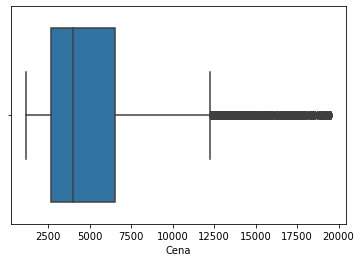

In [304]:
sns.boxplot(df['Cena'])

In [305]:
#df.drop(df[(df['Cena']>=12000)].index, inplace=True)

<AxesSubplot:xlabel='Cena'>

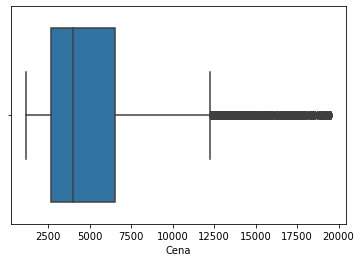

In [306]:
sns.boxplot(df['Cena'])

In [307]:
df = df.groupby('Model').filter(lambda x: len(x)>=15)

In [308]:
df

Marka         Model  Godiste  Kilometraza Karoserija  Gorivo  \
0         Volkswagen   Passat B5.5     2003       217000    Karavan   Dizel   
2         Volkswagen     Passat B6     2008       244000   Limuzina   Dizel   
3               Audi            A3     2013       164000     Hecbek   Dizel   
4               Fiat  Grande Punto     2012        95987     Hecbek  Benzin   
5         Volkswagen        Golf 6     2009       219000     Hecbek   Dizel   
...              ...           ...      ...          ...        ...     ...   
28539           Seat          Leon     2010       223891     Hecbek  Benzin   
28540           Ford         Focus     2006       270500     Hecbek  Benzin   
28541           Audi            A4     2008       215400   Limuzina   Dizel   
28542  Mercedes Benz         A 170     2002       230000     Hecbek   Dizel   
28543        Peugeot           308     2010       196400     Hecbek   Dizel   

       Kubikaza  Snaga motora   Cena      EKM     Pogon  \
0           1.9           131   1850  Euro 3   Prednji    
2           1.9           105   5499  Euro 4   Prednji    
3           2.0           150  11200  Euro 5   Prednji    
4           1.4            77   4699  Euro 5   Prednji    
5           2.0           110   6950  Euro 5   Prednji    
...         ...           ...    ...      ...       ...   
28539       1.4           124   4700  Euro 5   Prednji    
28540       1.8           125   2999  Euro 4   Prednji    
28541       2.0           140   7900  Euro 5   Prednji    
28542       1.7            95   1500  Euro 3   Prednji    
28543       1.6            92   3900  Euro 5   Prednji    

                             Menjac  Broj vrata  Broj sedista  \
0                Manuelni 6 brzina   4/5 vrata              5   
2                Manuelni 5 brzina   4/5 vrata              5   
3                Manuelni 6 brzina   2/3 vrata              5   
4                Manuelni 5 brzina   4/5 vrata              5   
5                Manuelni 5 brzina   4/5 vrata              5   
...                             ...         ...           ...   
28539            Manuelni 6 brzina   4/5 vrata              5   
28540            Manuelni 5 brzina   4/5 vrata              5   
28541  Automatski / poluautomatski   4/5 vrata              5   
28542            Manuelni 5 brzina   4/5 vrata              5   
28543            Manuelni 5 brzina   4/5 vrata              5   

                   Klima     Boja Materijal enterijera Boja enterijera  
0      Automatska klima   Srebrna                 Stof            Crna  
2        Manuelna klima     Plava                 Stof            Crna  
3      Automatska klima      Bela                 Stof            Siva  
4        Manuelna klima      Bela                 Stof            Crna  
5      Automatska klima      Crna                 Stof            Crna  
...                  ...      ...                  ...             ...  
28539    Manuelna klima      Siva                Druga            Crna  
28540  Automatska klima      Siva                Velur            Siva  
28541  Automatska klima      Crna     Kombinovana koza            Crna  
28542    Manuelna klima     Bordo                 Stof            Siva  
28543  Automatska klima     Plava                 Stof            Crna  

[25999 rows x 18 columns]

<AxesSubplot:>

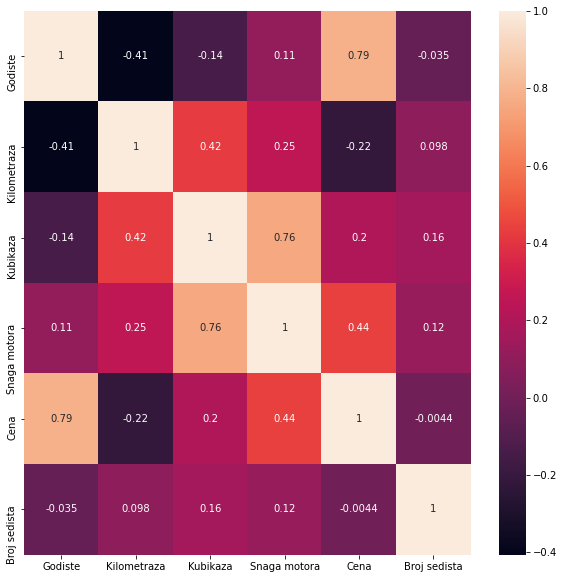

In [309]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

### Engine power

In [310]:
for model in df['Model'].unique():
    print('-'*30)
    print('Model: {}'.format(model))
    power = sorted(list(df[df['Model']==model]['Snaga motora'].unique()))
    print(power)
    base=5
    new_power = sorted(set([base * round(a_number/base) for a_number in power]))
    print('Converted')
    print(new_power)
        

------------------------------
Model: Passat B5.5
[101, 102, 105, 116, 129, 131, 136, 150, 163, 179]
Converted
[100, 105, 115, 130, 135, 150, 165, 180]
------------------------------
Model: Passat B6
[101, 105, 109, 110, 116, 121, 122, 136, 139, 140, 141, 143, 150, 160, 170, 200]
Converted
[100, 105, 110, 115, 120, 135, 140, 145, 150, 160, 170, 200]
------------------------------
Model: A3
[75, 90, 101, 102, 105, 109, 110, 116, 122, 124, 125, 131, 136, 139, 140, 141, 150, 160, 170, 179, 184, 200]
Converted
[75, 90, 100, 105, 110, 115, 120, 125, 130, 135, 140, 150, 160, 170, 180, 185, 200]
------------------------------
Model: Grande Punto
[64, 65, 68, 69, 75, 77, 80, 84, 86, 90, 94, 95, 105, 120, 129, 131, 135, 155]
Converted
[65, 70, 75, 80, 85, 90, 95, 105, 120, 130, 135, 155]
------------------------------
Model: Golf 6
[79, 80, 86, 90, 102, 105, 109, 110, 120, 121, 122, 129, 136, 139, 140, 160, 163, 170, 204, 211]
Converted
[80, 85, 90, 100, 105, 110, 120, 130, 135, 140, 160, 165, 

[58, 60, 68, 69, 75, 79, 80, 82, 86, 90, 92, 94, 95, 101, 120, 150]
Converted
[60, 70, 75, 80, 85, 90, 95, 100, 120, 150]
------------------------------
Model: E 200
[102, 116, 122, 136, 139, 140, 150, 163, 184]
Converted
[100, 115, 120, 135, 140, 150, 165, 185]
------------------------------
Model: 318
[105, 114, 116, 117, 118, 121, 122, 125, 129, 136, 139, 140, 143, 150, 177]
Converted
[105, 115, 120, 125, 130, 135, 140, 145, 150, 175]
------------------------------
Model: Superb
[101, 105, 114, 116, 120, 125, 131, 139, 140, 141, 150, 160, 162, 163, 165, 170, 190]
Converted
[100, 105, 115, 120, 125, 130, 140, 150, 160, 165, 170, 190]
------------------------------
Model: X1
[99, 116, 136, 143, 150, 163, 177, 184, 190, 204]
Converted
[100, 115, 135, 145, 150, 165, 175, 185, 190, 205]
------------------------------
Model: Astra J
[94, 95, 101, 109, 110, 116, 120, 124, 125, 131, 136, 139, 140, 141, 160, 165, 179]
Converted
[95, 100, 110, 115, 120, 125, 130, 135, 140, 160, 165, 180]
----

[69, 75, 80, 86, 90, 102, 105]
Converted
[70, 75, 80, 85, 90, 100, 105]
------------------------------
Model: 5008
[109, 111, 113, 114, 116, 120, 131, 150, 156, 162, 163]
Converted
[110, 115, 120, 130, 150, 155, 160, 165]
------------------------------
Model: 607
[107, 120, 136, 150, 179, 204]
Converted
[105, 120, 135, 150, 180, 205]
------------------------------
Model: Jetta
[105, 136, 139, 140, 150, 170]
Converted
[105, 135, 140, 150, 170]
------------------------------
Model: Altea
[101, 102, 105, 125, 131, 139, 140, 170, 200, 211]
Converted
[100, 105, 125, 130, 140, 170, 200, 210]
------------------------------
Model: Passat B5
[90, 101, 110, 114, 116, 117]
Converted
[90, 100, 110, 115]
------------------------------
Model: B 200
[103, 136, 139, 140, 156]
Converted
[105, 135, 140, 155]
------------------------------
Model: Colt
[60, 75, 94, 95, 109]
Converted
[60, 75, 95, 110]
------------------------------
Model: RAV 4
[116, 122, 124, 125, 136, 143, 150, 177]
Converted
[115, 120,

In [311]:
base = 5
df['Snaga motora'] = df['Snaga motora'].apply(lambda x: int(base * round(x/base)))

In [312]:
vc = df['Model'].value_counts()
print(vc[vc > 30])

A4             1086
Golf 5          733
320             709
A3              645
Polo            634
               ... 
Fox              32
S-Max            32
Qashqai + 2      32
Colt             32
2008             31
Name: Model, Length: 162, dtype: int64


In [313]:
for kubikaza in sorted(df['Kubikaza'].unique()):
    print(kubikaza)
    print('-'*30)
    print(sorted(df[df['Kubikaza']==kubikaza]['Snaga motora'].unique()))

0.9
------------------------------
[70, 80, 85, 90, 95, 100, 105]
1.0
------------------------------
[60, 65, 70, 75, 90, 95, 100, 105, 110, 115, 125, 170]
1.1
------------------------------
[55, 60, 65, 75, 80, 100, 105]
1.2
------------------------------
[55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 130, 140, 150]
1.3
------------------------------
[60, 65, 70, 75, 80, 85, 90, 95, 100, 105]
1.4
------------------------------
[55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 150, 155, 160, 165, 170, 180, 205]
1.5
------------------------------
[60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 130, 135, 140, 150]
1.6
------------------------------
[60, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 150, 155, 160, 165, 170, 175, 180, 185, 190, 200, 210, 220]
1.7
------------------------------
[55, 65, 70, 75, 80, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 150, 200]
1.8
------------------------------


In [314]:
df.count()[0]

25999

In [315]:
df_new = pd.DataFrame()
for kubikaza in sorted(df['Kubikaza'].unique()):
    print(kubikaza)
    print('-'*30)
    print(df[df['Kubikaza']==kubikaza]['Snaga motora'].value_counts())
    df_new = df_new.append(df[df['Kubikaza']==kubikaza].groupby("Snaga motora").filter(lambda x: len(x) >= 4))

0.9
------------------------------
90     31
85     21
80      2
105     2
70      1
95      1
100     1
Name: Snaga motora, dtype: int64
1.0
------------------------------
70     222
60      73
65      24
125     16
100     12
115      7
95       3
110      3
75       2
105      2
90       1
170      1
Name: Snaga motora, dtype: int64
1.1
------------------------------
75     144
60     139
100     40
55      38
65       7
105      3
80       2
Name: Snaga motora, dtype: int64
1.2
------------------------------
75     515
70     337
60     294
80     229
85     182
65     159
95     111
90      86
55      84
105     66
100     19
115     12
130      7
110      6
120      2
150      1
140      1
Name: Snaga motora, dtype: int64
1.3
------------------------------
75     88
85     63
90     59
70     57
95     44
100    25
80     10
60      7
105     2
65      1
Name: Snaga motora, dtype: int64
1.4
------------------------------
75     711
70     526
90     411
95     236
80     211
120 

In [316]:
df = df_new

In [317]:
for kubikaza in sorted(df['Kubikaza'].unique()):
    print(kubikaza)
    print('-'*30)
    print(df[df['Kubikaza']==kubikaza]['Snaga motora'].value_counts())

0.9
------------------------------
90    31
85    21
Name: Snaga motora, dtype: int64
1.0
------------------------------
70     222
60      73
65      24
125     16
100     12
115      7
Name: Snaga motora, dtype: int64
1.1
------------------------------
75     144
60     139
100     40
55      38
65       7
Name: Snaga motora, dtype: int64
1.2
------------------------------
75     515
70     337
60     294
80     229
85     182
65     159
95     111
90      86
55      84
105     66
100     19
115     12
130      7
110      6
Name: Snaga motora, dtype: int64
1.3
------------------------------
75     88
85     63
90     59
70     57
95     44
100    25
80     10
60      7
Name: Snaga motora, dtype: int64
1.4
------------------------------
75     711
70     526
90     411
95     236
80     211
120    177
100    149
140     81
150     52
85      49
125     44
60      30
170     22
160     20
130     17
105     16
155     15
135     14
110     13
55       6
180      4
Name: Snaga motora, d

In [318]:
df_new = pd.DataFrame()
for model in sorted(df['Model'].unique()):
    print(model)
    print('-'*30)
    print(df[df['Model']==model]['Snaga motora'].value_counts())
    df_new = df_new.append(df[df['Model']==model].groupby("Snaga motora").filter(lambda x: len(x) >= 3))
df = df_new

107
------------------------------
70    35
55     1
Name: Snaga motora, dtype: int64
116
------------------------------
115    86
120    22
135    17
90      1
Name: Snaga motora, dtype: int64
118
------------------------------
145    69
120    65
150     9
135     6
130     2
115     1
140     1
190     1
Name: Snaga motora, dtype: int64
120
------------------------------
165    50
175    15
160     8
150     4
185     4
190     4
145     1
170     1
200     1
Name: Snaga motora, dtype: int64
147
------------------------------
120    51
115    48
105    30
150    28
140     6
110     3
170     2
100     1
190     1
Name: Snaga motora, dtype: int64
156
------------------------------
115    25
140    19
150     9
110     8
120     3
155     1
Name: Snaga motora, dtype: int64
159
------------------------------
150    112
120     29
170      5
140      4
115      2
135      2
165      1
Name: Snaga motora, dtype: int64
2
------------------------------
75     19
70     16
85      8
80    

Name: Snaga motora, dtype: int64
C 180
------------------------------
145    17
130    13
155    12
115     7
120     5
150     1
Name: Snaga motora, dtype: int64
C 200
------------------------------
135    46
120    23
165    22
115    11
145     4
160     2
185     2
130     1
Name: Snaga motora, dtype: int64
C 220
------------------------------
170    66
145    21
150    10
135     4
115     2
140     1
205     1
125     1
Name: Snaga motora, dtype: int64
C-Max
------------------------------
110    38
115    37
135    22
90     20
125    15
100    14
95      6
120     5
105     2
140     2
75      1
130     1
150     1
Name: Snaga motora, dtype: int64
C1
------------------------------
70    68
55     4
75     1
Name: Snaga motora, dtype: int64
C2
------------------------------
60     18
70     16
75      8
120     4
110     1
Name: Snaga motora, dtype: int64
C3
------------------------------
70     153
75     110
60      50
90      41
95      15
110     15
100     13
80       9
120 

110    33
115    15
190     5
200     1
Name: Snaga motora, dtype: int64
Ka
------------------------------
70    21
75     8
60     4
Name: Snaga motora, dtype: int64
Kadjar
------------------------------
110    58
130    16
115     1
Name: Snaga motora, dtype: int64
Kangoo
------------------------------
65     7
70     6
80     6
85     6
90     5
75     4
105    4
95     3
60     1
Name: Snaga motora, dtype: int64
Kuga
------------------------------
135    49
140    33
150    15
165    10
120     7
180     4
160     1
Name: Snaga motora, dtype: int64
Laguna
------------------------------
120    51
110    43
150    40
105    20
130    19
100     9
140     5
115     1
135     1
165     1
170     1
180     1
Name: Snaga motora, dtype: int64
Leon
------------------------------
105    49
140    17
110    14
90     12
150    11
125     9
100     7
170     7
75      6
85      4
115     3
210     2
200     2
190     1
70      1
180     1
120     1
Name: Snaga motora, dtype: int64
Logan
-----

130    18
140     6
150     6
135     4
115     2
175     1
Name: Snaga motora, dtype: int64
X1
------------------------------
145    35
175    26
150    14
115     7
185     5
135     3
165     2
190     1
100     1
Name: Snaga motora, dtype: int64
X3
------------------------------
150    96
175    54
185    34
190     7
205     4
165     3
140     1
145     1
Name: Snaga motora, dtype: int64
XC60
------------------------------
165    11
135     5
150     3
190     1
Name: Snaga motora, dtype: int64
Xsara Picasso
------------------------------
90     40
110    29
95     15
115    13
135     2
120     1
Name: Snaga motora, dtype: int64
Yaris
------------------------------
70     49
85     24
90     24
65      6
75      5
100     5
105     1
Name: Snaga motora, dtype: int64
Ypsilon
------------------------------
60     23
70     13
85      7
95      7
75      6
80      3
105     1
Name: Snaga motora, dtype: int64
Zafira
------------------------------
100    72
120    46
125    24
150   

In [319]:
df.count()[0]

25348

In [320]:
df_new = pd.DataFrame()
for model in sorted(df['Model'].unique()):
    print(model)
    print('-'*30)
    print(df[df['Model']==model]['Kubikaza'].value_counts())
    df_new = df_new.append(df[df['Model']==model].groupby("Kubikaza").filter(lambda x: len(x) >= 3))
df = df_new

107
------------------------------
1.0    35
Name: Kubikaza, dtype: int64
116
------------------------------
1.6    68
2.0    43
1.5    14
Name: Kubikaza, dtype: int64
118
------------------------------
2.0    146
1.9      3
Name: Kubikaza, dtype: int64
120
------------------------------
2.0    85
Name: Kubikaza, dtype: int64
147
------------------------------
1.9    113
1.6     51
2.0      2
Name: Kubikaza, dtype: int64
156
------------------------------
1.9    51
1.7     4
2.0     3
1.6     2
1.8     2
2.4     2
Name: Kubikaza, dtype: int64
159
------------------------------
1.9    134
2.0     12
1.8      4
Name: Kubikaza, dtype: int64
2
------------------------------
1.4    24
1.3    17
1.2     8
1.7     1
Name: Kubikaza, dtype: int64
2008
------------------------------
1.6    22
1.5     1
Name: Kubikaza, dtype: int64
206
------------------------------
1.4    138
1.6     34
1.1     20
2.0     19
1.9      5
1.8      2
Name: Kubikaza, dtype: int64
207
------------------------------
1.

Croma
------------------------------
1.9    50
2.0     1
Name: Kubikaza, dtype: int64
Cruze
------------------------------
1.6    20
2.0    16
1.8     4
Name: Kubikaza, dtype: int64
DS3
------------------------------
1.6    31
1.4     8
Name: Kubikaza, dtype: int64
Delta
------------------------------
1.6    31
1.4    12
2.0    10
1.9     5
Name: Kubikaza, dtype: int64
Doblo
------------------------------
1.9    13
1.6    10
1.2     9
Name: Kubikaza, dtype: int64
E 200
------------------------------
2.1    59
2.2    15
1.8     5
2.0     1
1.9     1
Name: Kubikaza, dtype: int64
E 220
------------------------------
2.1    58
2.2    24
Name: Kubikaza, dtype: int64
EVO
------------------------------
1.2    95
1.4    28
1.3    23
0.9     1
Name: Kubikaza, dtype: int64
Espace
------------------------------
2.0    23
1.9    18
1.6     7
2.2     3
Name: Kubikaza, dtype: int64
Fabia
------------------------------
1.4    96
1.2    83
1.9    37
1.6    11
1.0     3
1.1     1
Name: Kubikaza, dtype:

2.0    42
1.6    15
1.9     3
1.8     2
Name: Kubikaza, dtype: int64
V50
------------------------------
1.6    28
2.0    26
Name: Kubikaza, dtype: int64
Vectra C
------------------------------
1.9    52
1.8    19
2.0    19
2.2     6
1.6     2
Name: Kubikaza, dtype: int64
X-Trail
------------------------------
1.6    18
2.0    11
2.2     4
1.9     1
Name: Kubikaza, dtype: int64
X1
------------------------------
2.0    86
1.5     4
Name: Kubikaza, dtype: int64
X3
------------------------------
2.0    192
3.0      4
1.9      2
Name: Kubikaza, dtype: int64
XC60
------------------------------
2.0    14
2.4     5
Name: Kubikaza, dtype: int64
Xsara Picasso
------------------------------
1.6    58
2.0    26
1.7     8
1.8     4
1.9     1
Name: Kubikaza, dtype: int64
Yaris
------------------------------
1.0    55
1.3    31
1.4    27
Name: Kubikaza, dtype: int64
Ypsilon
------------------------------
1.2    38
1.4    12
0.9     7
1.3     2
Name: Kubikaza, dtype: int64
Zafira
---------------------

In [321]:
df.count()[0]

25202

In [322]:
df['Model'].value_counts()

A4           1079
Golf 5        728
320           705
A3            641
Polo          625
             ... 
i20            20
XC60           19
Passat B5      15
ML 270         15
607            10
Name: Model, Length: 177, dtype: int64

In [323]:
df.count()[0]

25202

<AxesSubplot:xlabel='Cena', ylabel='Density'>

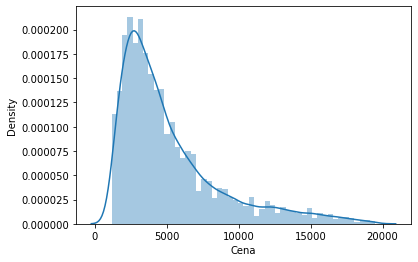

In [324]:
sns.distplot(df['Cena'])

([<matplotlib.axis.YTick at 0x1a0dadbca90>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

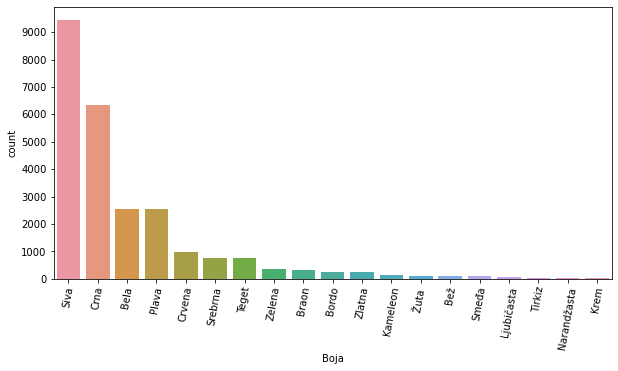

In [325]:
plt.figure(figsize=(10,5))
sns.countplot(df['Boja'], order=df['Boja'].value_counts().index)
plt.xticks(rotation=80)
plt.yticks(np.arange(0,10000, 1000))

In [326]:
df['Boja'].unique()

array(['Crna', 'Siva', 'Srebrna', 'Crvena', 'Žuta ', 'Plava', 'Bela',
       'Teget', 'Braon', 'Bordo', 'Kameleon', 'Zelena', 'Smeđa', 'Bež',
       'Zlatna', 'Narandžasta', 'Krem', 'Tirkiz', 'Ljubičasta'],
      dtype=object)

In [327]:
def change_color(row):
    if row not in ['Siva', 'Crna', 'Bela','Plava', 'Crvena']:
        return 'Druga'
    else:
        return row
df['Boja'] = df['Boja'].apply(change_color)

In [328]:
df['Boja'].unique()

array(['Crna', 'Siva', 'Druga', 'Crvena', 'Plava', 'Bela'], dtype=object)

([<matplotlib.axis.YTick at 0x1a0d9906fd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

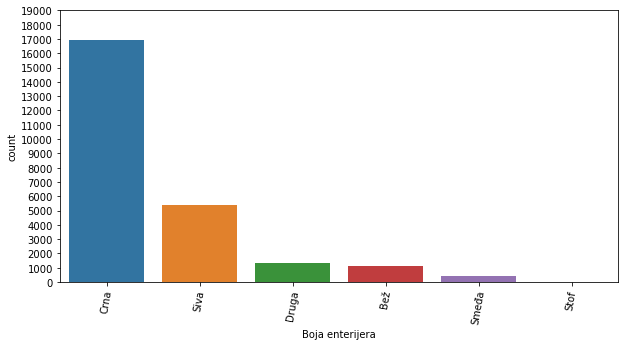

In [329]:
plt.figure(figsize=(10,5))
sns.countplot(df['Boja enterijera'], order=df['Boja enterijera'].value_counts().index)
plt.xticks(rotation=80)
plt.yticks(np.arange(0,20000, 1000))

In [330]:
def change_color_inside(row):
    if row not in ['Siva', 'Crna', 'Bež']:
        return 'Druga'
    else:
        return row
df['Boja enterijera'] = df['Boja enterijera'].apply(change_color_inside)

([<matplotlib.axis.YTick at 0x1a0d848ba30>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

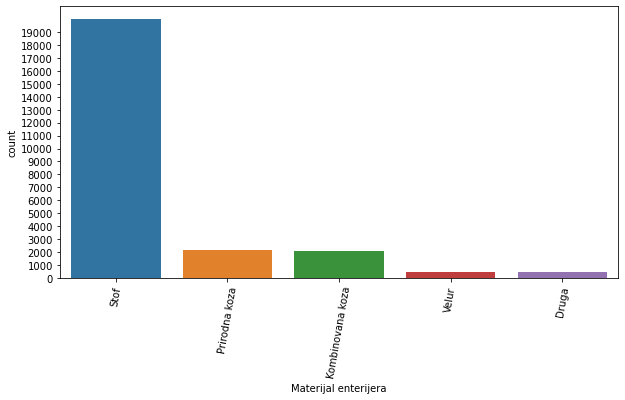

In [331]:
plt.figure(figsize=(10,5))
sns.countplot(df['Materijal enterijera'], order=df['Materijal enterijera'].value_counts().index)
plt.xticks(rotation=80)
plt.yticks(np.arange(0,20000, 1000))

In [332]:
df['Materijal enterijera'].unique()

array(['Stof', 'Kombinovana koza', 'Prirodna koza', 'Velur', 'Druga'],
      dtype=object)

In [333]:
def change_material(row):
    if row not in ['Stof', 'Kombinovana koza', 'Prirodna koza']:
        return 'Drugi'
    else:
        return row
df['Materijal enterijera'] = df['Materijal enterijera'].apply(change_material)

In [334]:
#df = df.groupby('Model').filter(lambda x: len(x)>=30)

In [335]:
df.drop(columns=['Broj sedista', 'Klima', 'EKM', 'Broj vrata', 'Materijal enterijera', 'Boja enterijera'], inplace=True)

-----------------------------------
Model 107


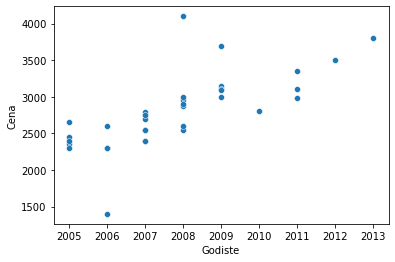

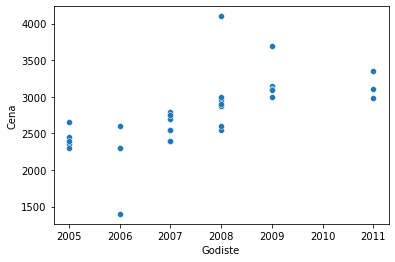

-----------------------------------
Model 116


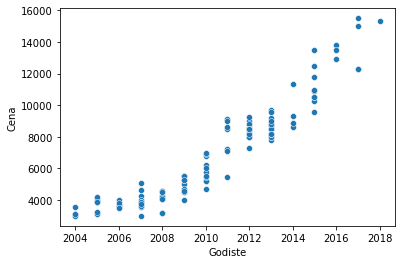

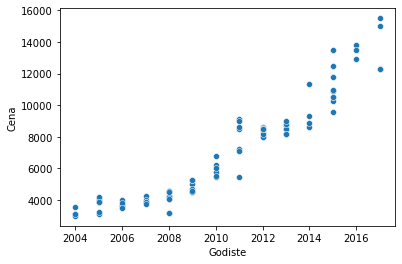

-----------------------------------
Model 118


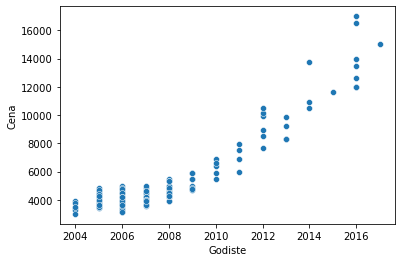

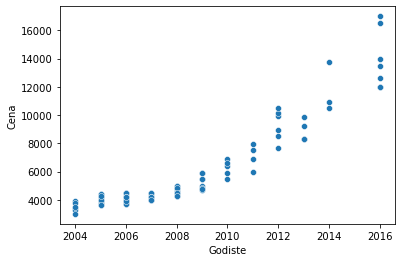

-----------------------------------
Model 120


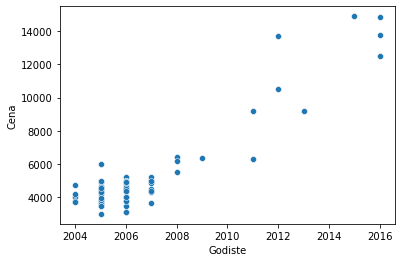

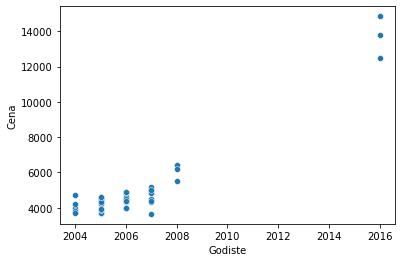

-----------------------------------
Model 147


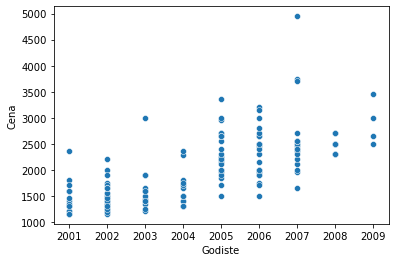

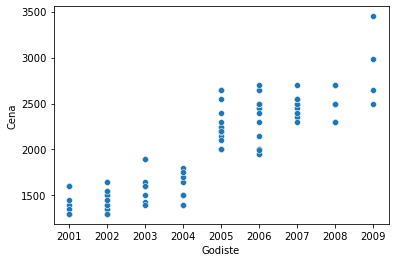

-----------------------------------
Model 156


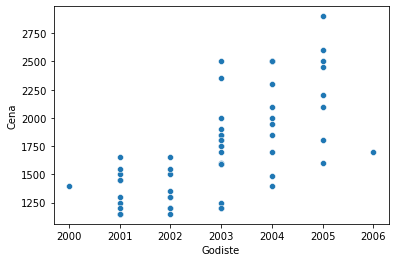

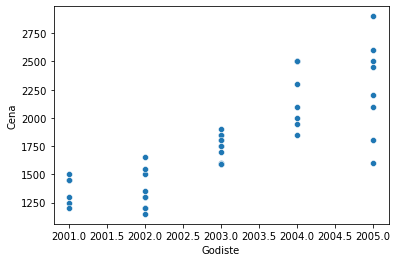

-----------------------------------
Model 159


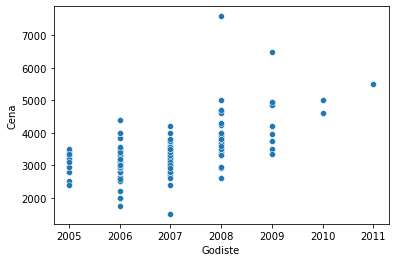

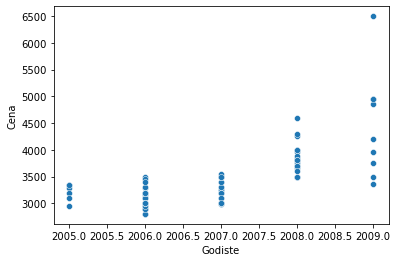

-----------------------------------
Model 2


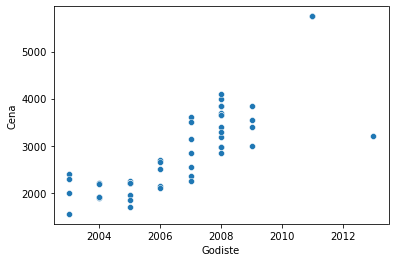

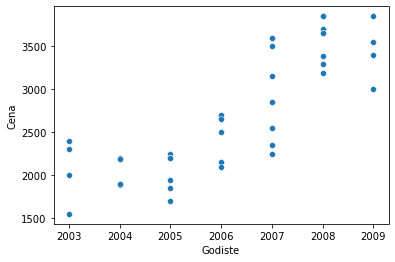

-----------------------------------
Model 206


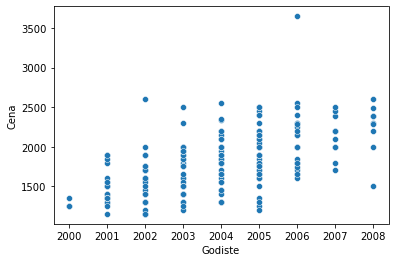

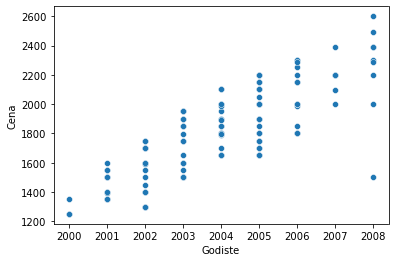

-----------------------------------
Model 207


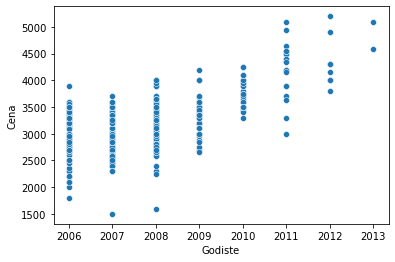

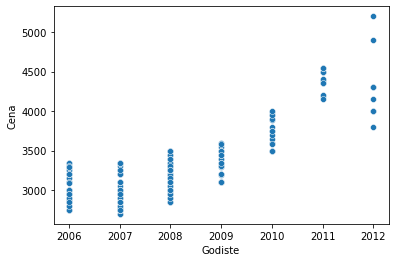

-----------------------------------
Model 208


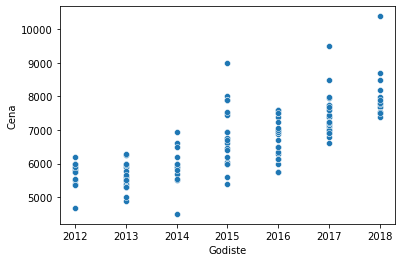

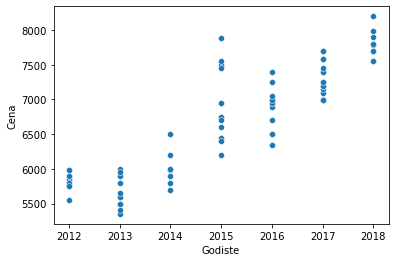

-----------------------------------
Model 3


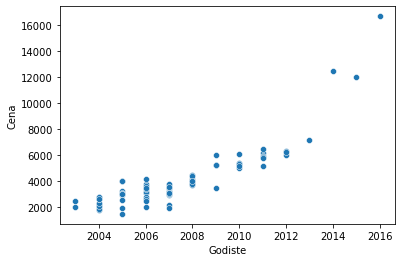

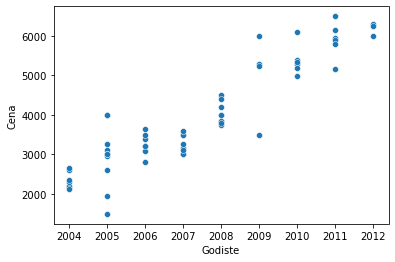

-----------------------------------
Model 3008


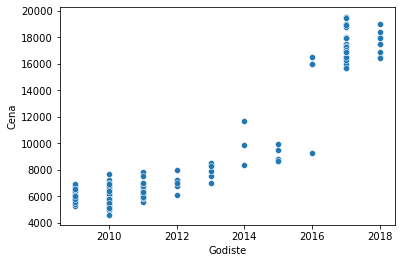

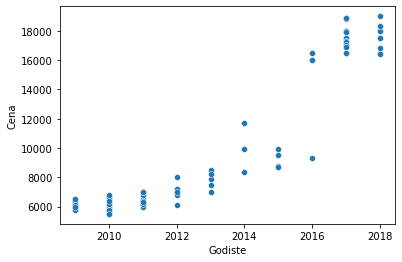

-----------------------------------
Model 307


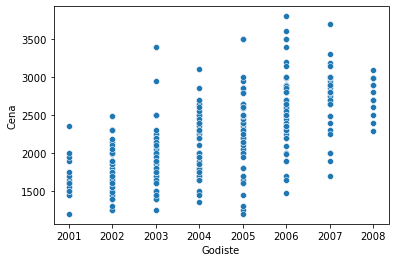

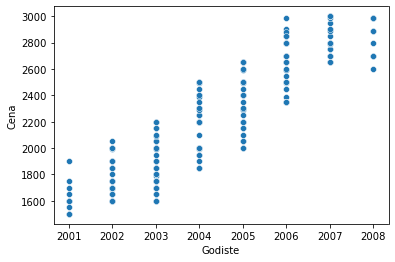

-----------------------------------
Model 308


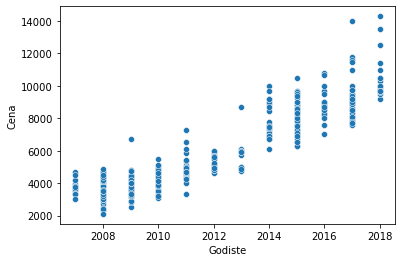

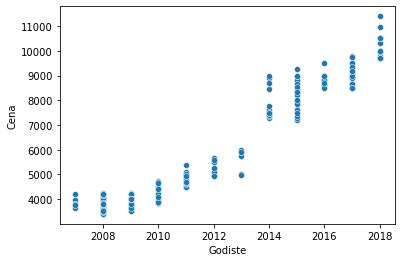

-----------------------------------
Model 316


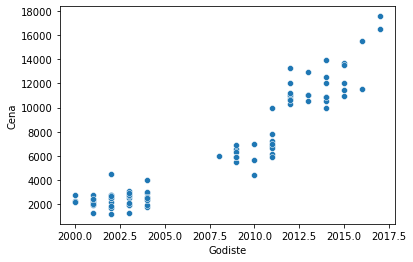

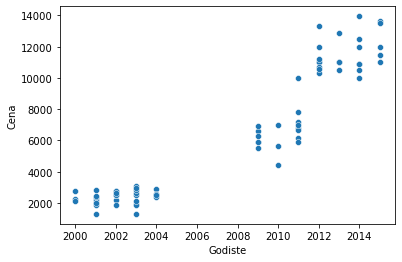

-----------------------------------
Model 318


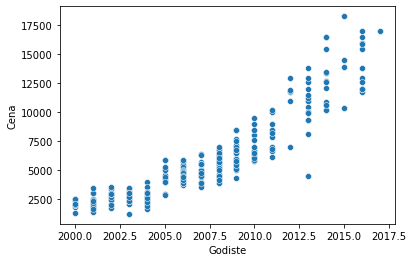

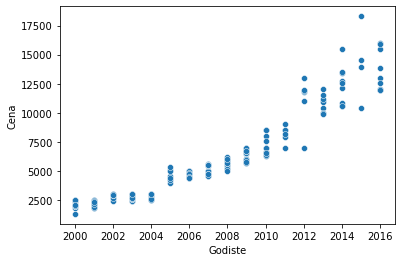

-----------------------------------
Model 320


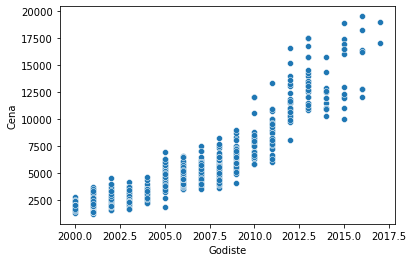

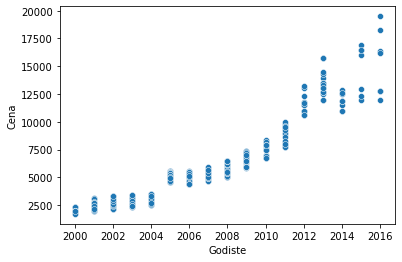

-----------------------------------
Model 407


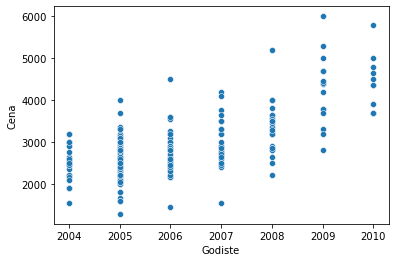

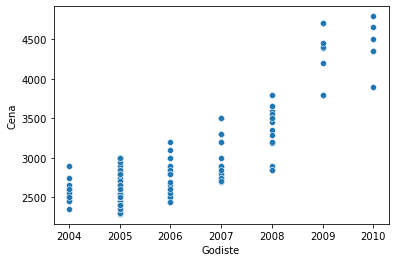

-----------------------------------
Model 5


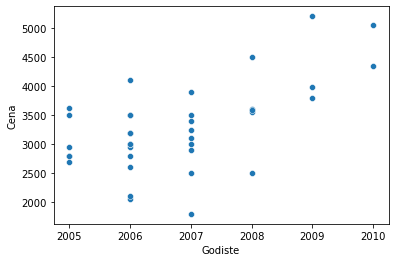

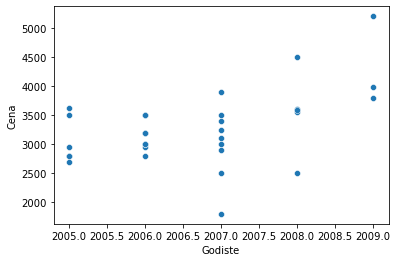

-----------------------------------
Model 500


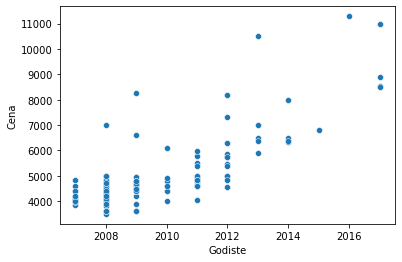

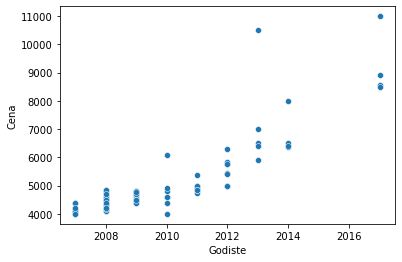

-----------------------------------
Model 5008


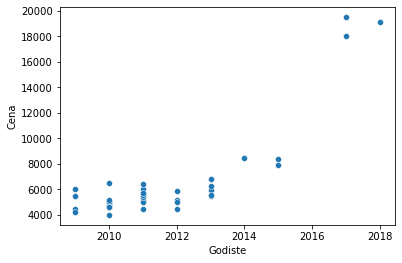

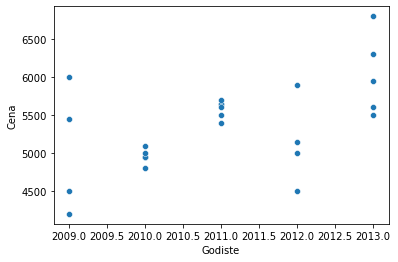

-----------------------------------
Model 500L


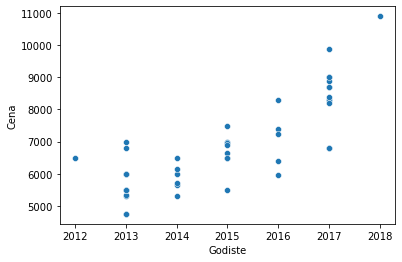

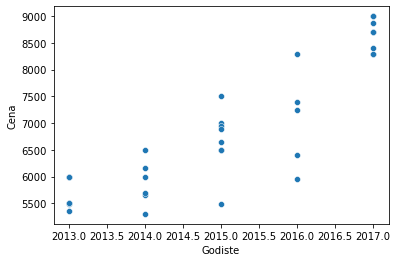

-----------------------------------
Model 508


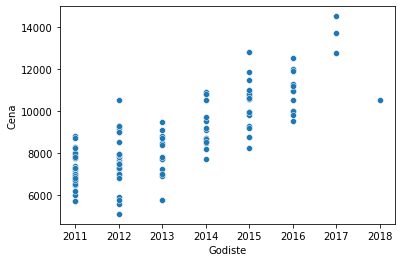

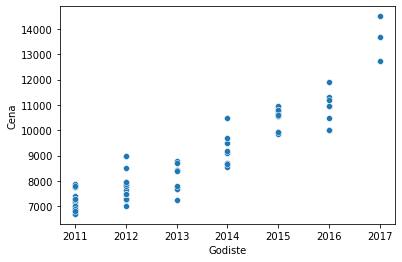

-----------------------------------
Model 520


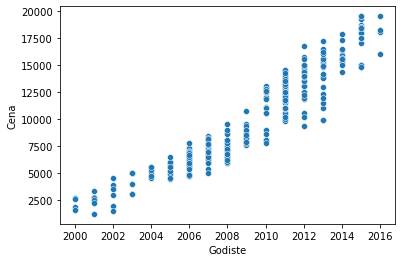

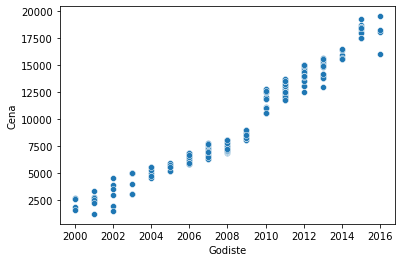

-----------------------------------
Model 525


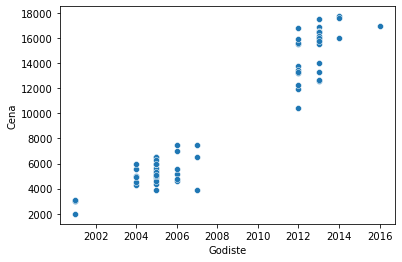

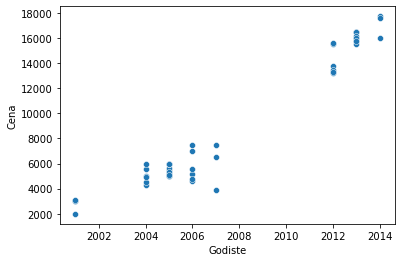

-----------------------------------
Model 6


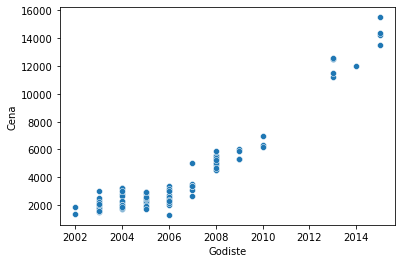

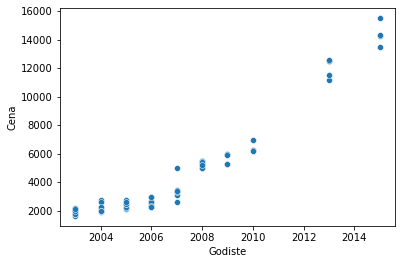

-----------------------------------
Model A 150


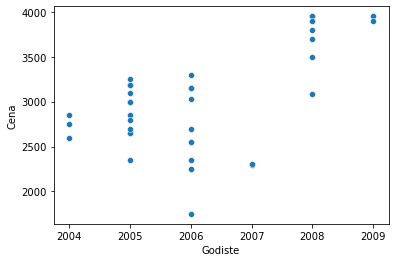

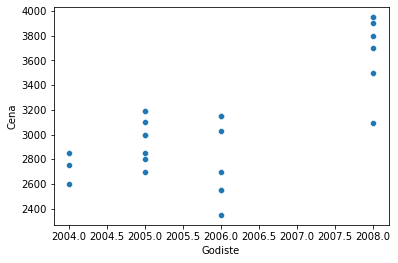

-----------------------------------
Model A 160


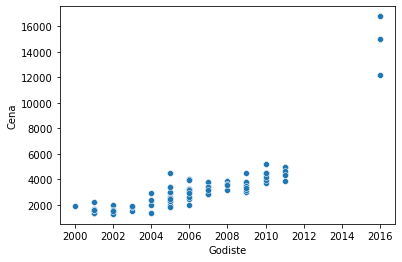

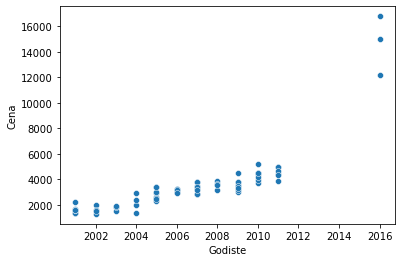

-----------------------------------
Model A 170


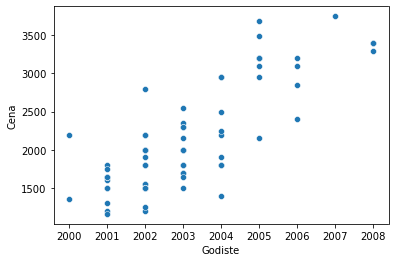

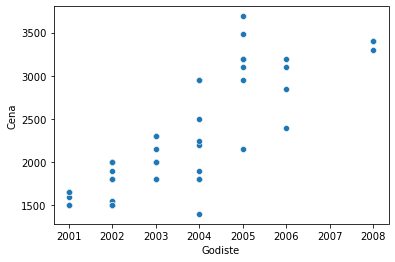

-----------------------------------
Model A 180


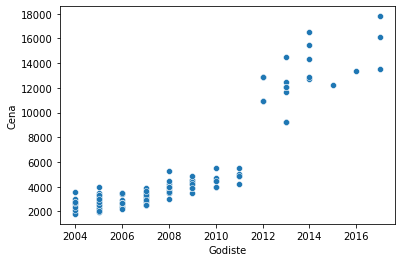

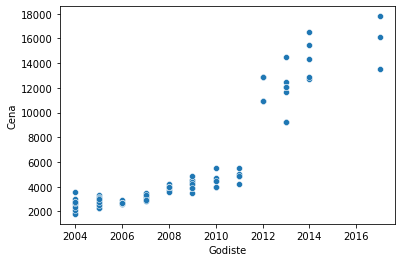

-----------------------------------
Model A2


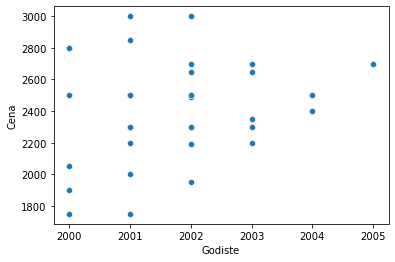

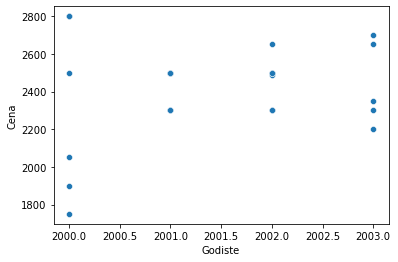

-----------------------------------
Model A3


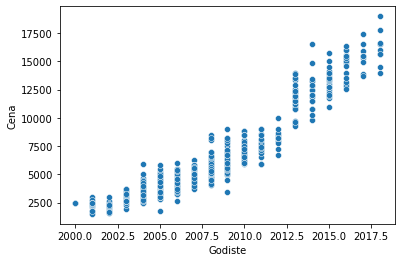

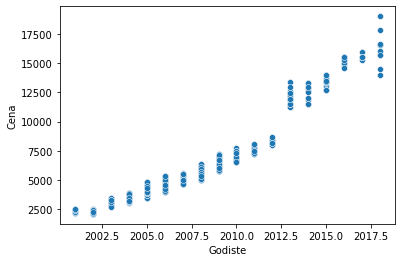

-----------------------------------
Model A4


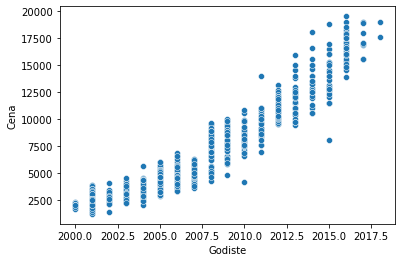

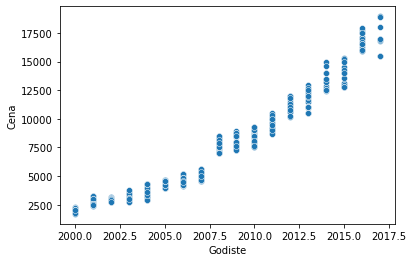

-----------------------------------
Model A5


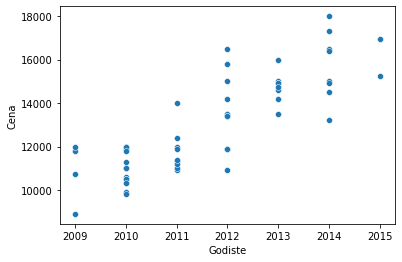

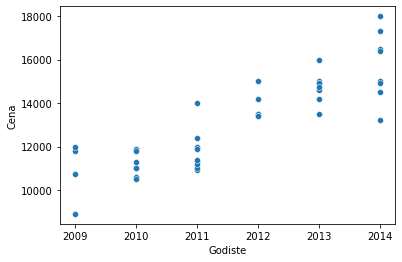

-----------------------------------
Model A6


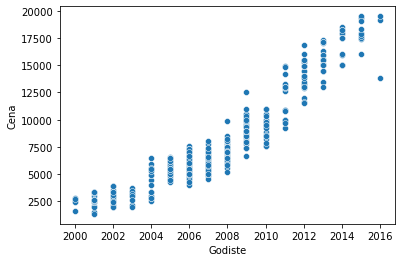

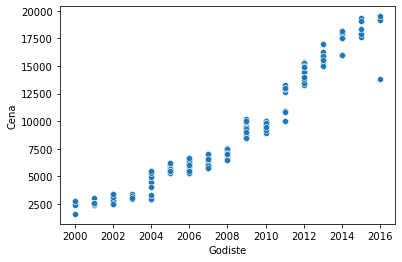

-----------------------------------
Model Agila


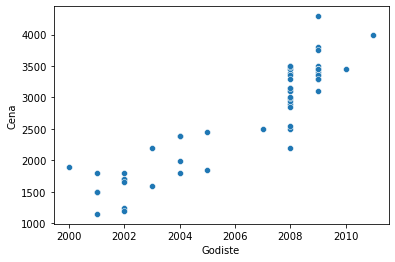

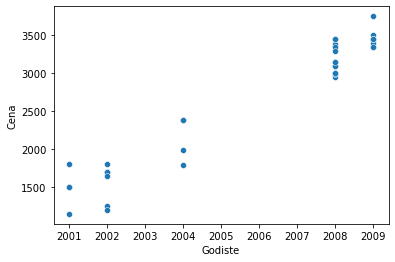

-----------------------------------
Model Alhambra


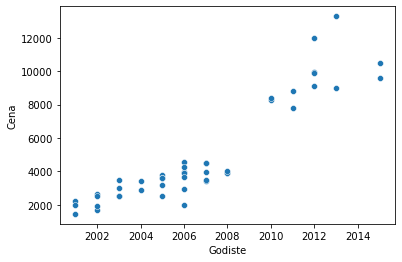

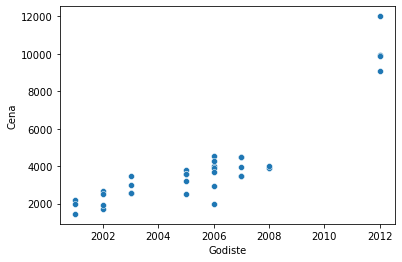

-----------------------------------
Model Altea


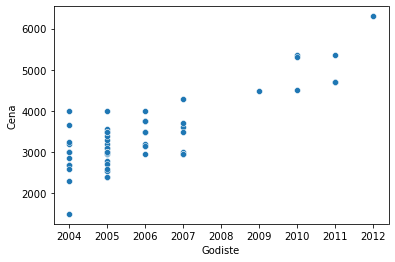

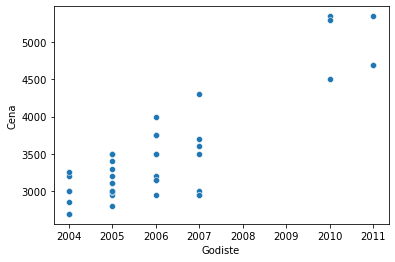

-----------------------------------
Model Antara


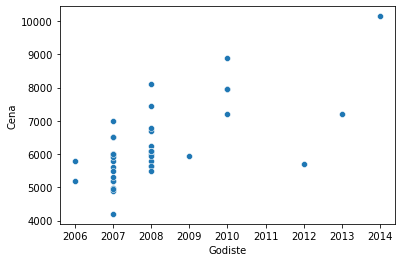

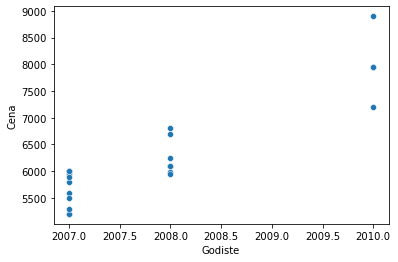

-----------------------------------
Model Astra G


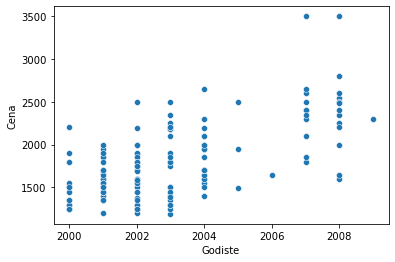

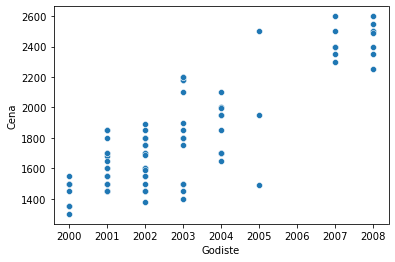

-----------------------------------
Model Astra H


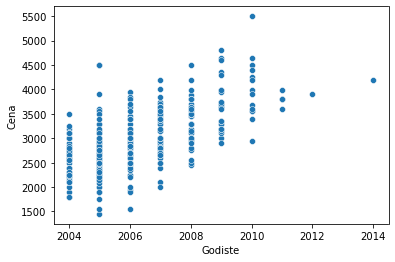

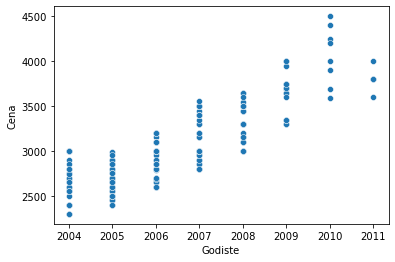

-----------------------------------
Model Astra J


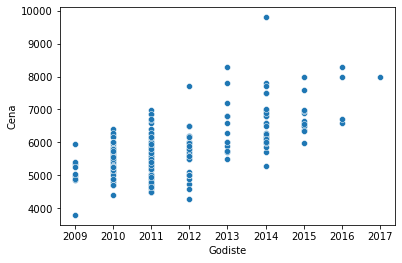

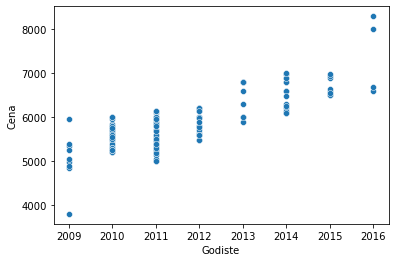

-----------------------------------
Model Astra K


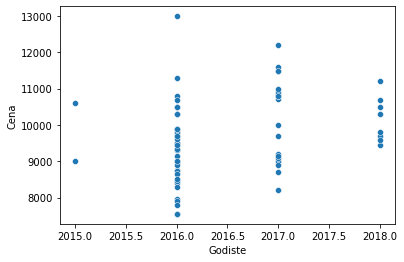

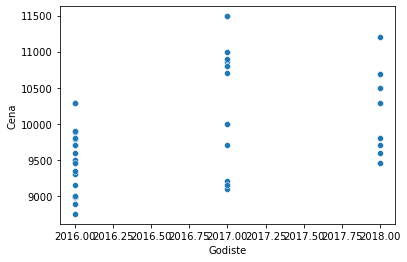

-----------------------------------
Model Auris


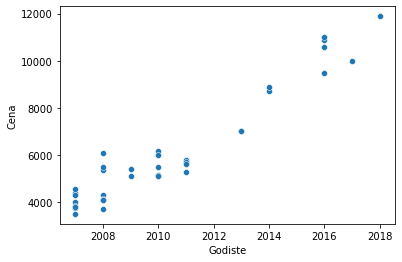

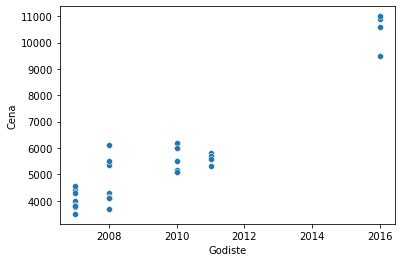

-----------------------------------
Model Avensis


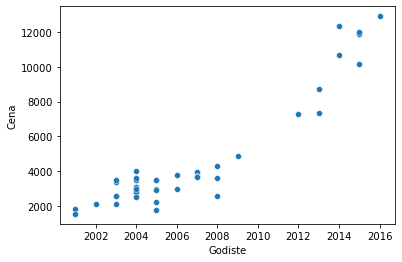

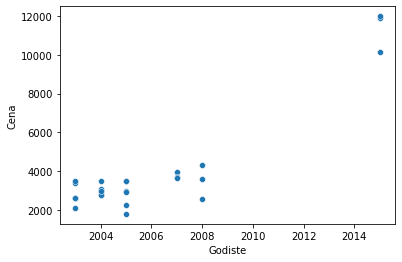

-----------------------------------
Model Aygo


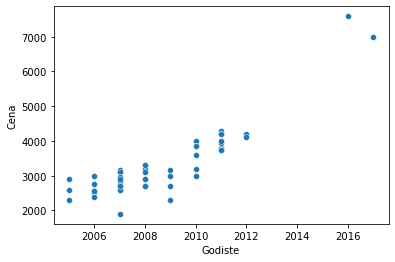

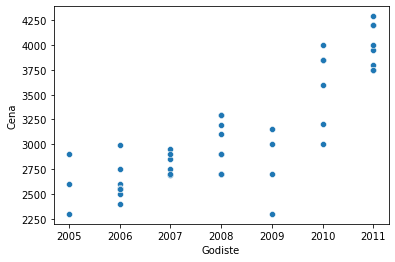

-----------------------------------
Model B 180


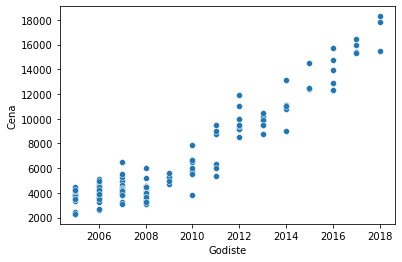

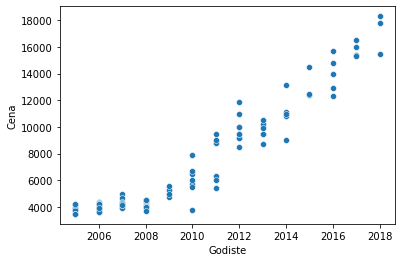

-----------------------------------
Model B 200


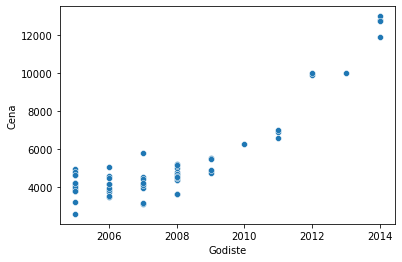

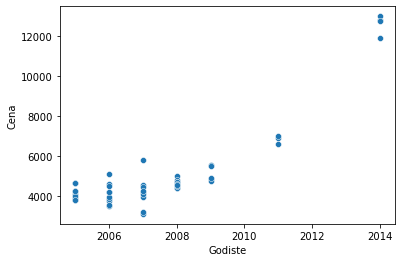

-----------------------------------
Model Berlingo


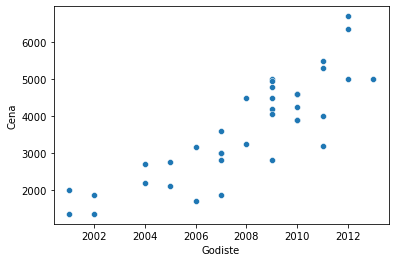

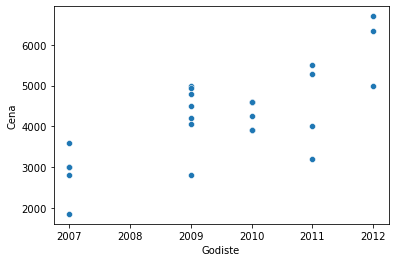

-----------------------------------
Model Bora


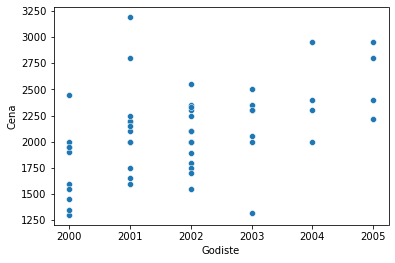

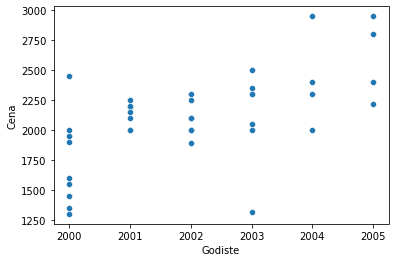

-----------------------------------
Model Bravo


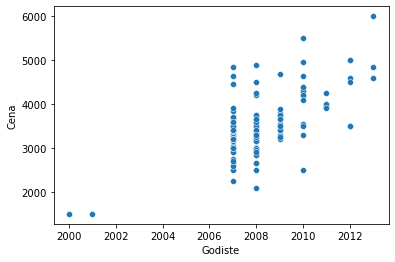

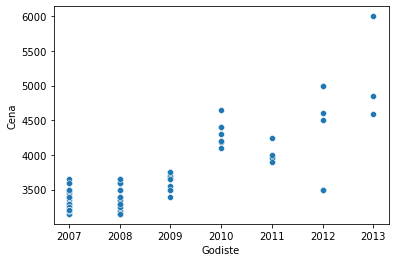

-----------------------------------
Model C 180


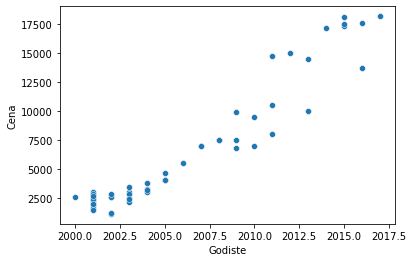

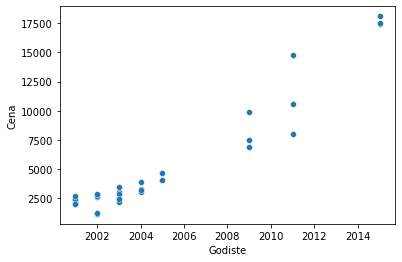

-----------------------------------
Model C 200


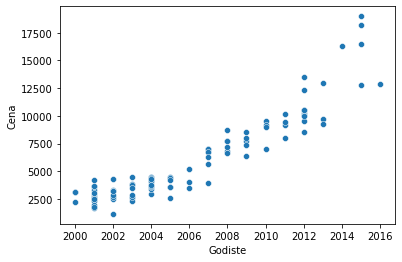

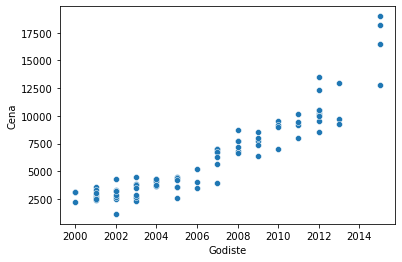

-----------------------------------
Model C 220


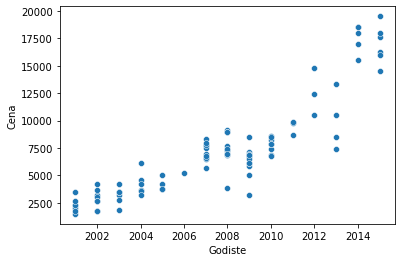

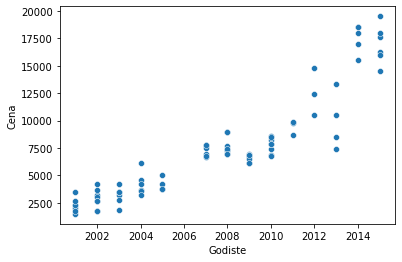

-----------------------------------
Model C-Max


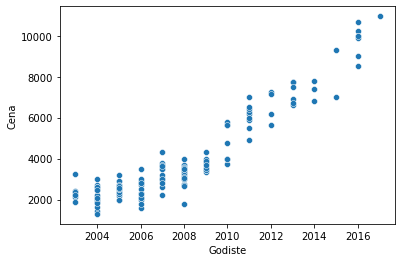

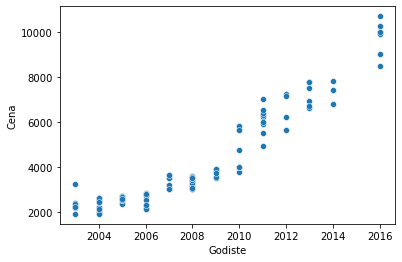

-----------------------------------
Model C1


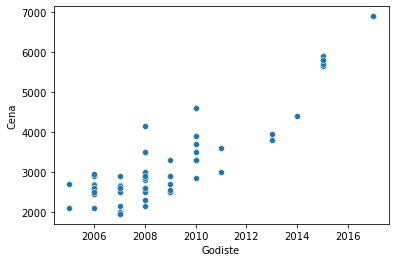

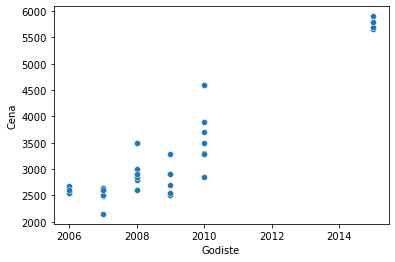

-----------------------------------
Model C2


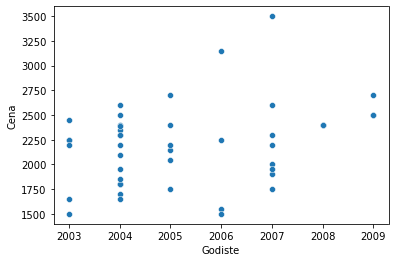

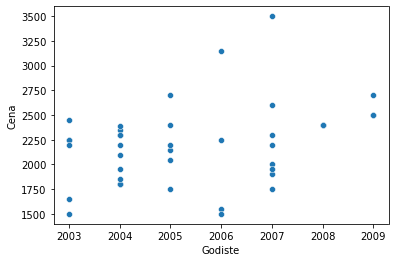

-----------------------------------
Model C3


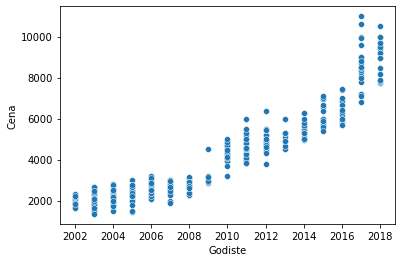

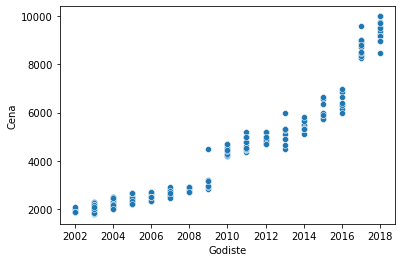

-----------------------------------
Model C3 Picasso


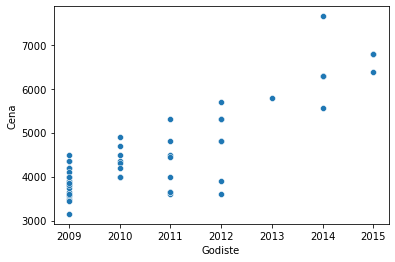

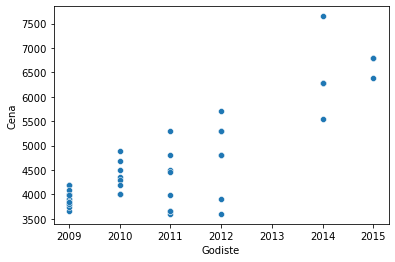

-----------------------------------
Model C4


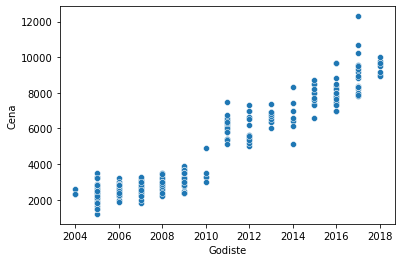

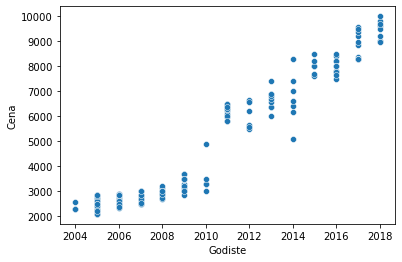

-----------------------------------
Model C4 Grand Picasso


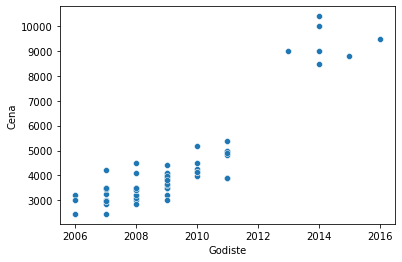

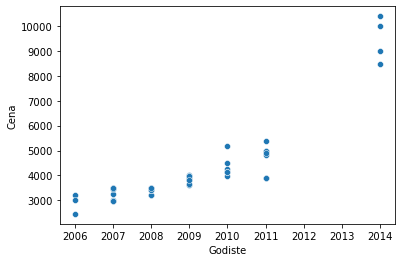

-----------------------------------
Model C4 Picasso


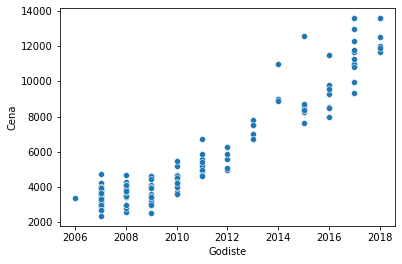

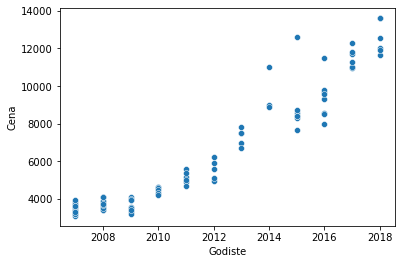

-----------------------------------
Model C5


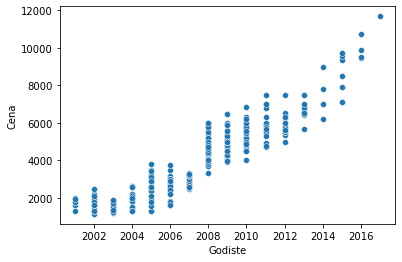

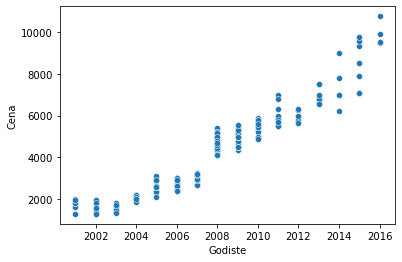

-----------------------------------
Model Caddy


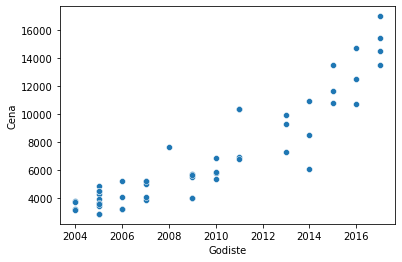

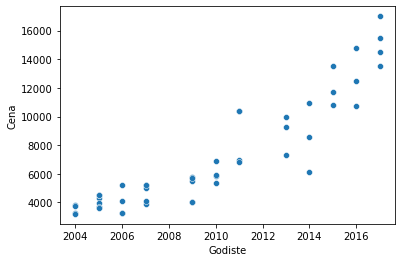

-----------------------------------
Model Captiva


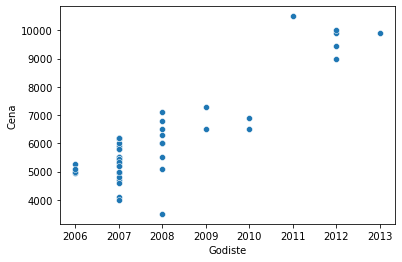

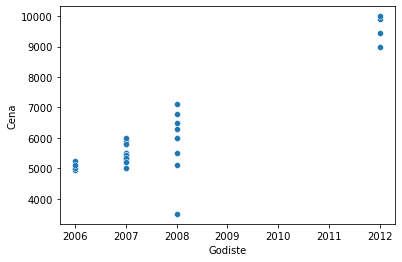

-----------------------------------
Model Captur


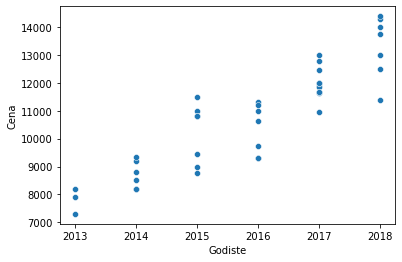

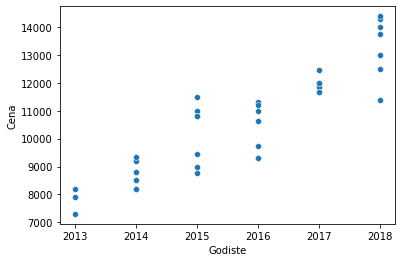

-----------------------------------
Model Civic


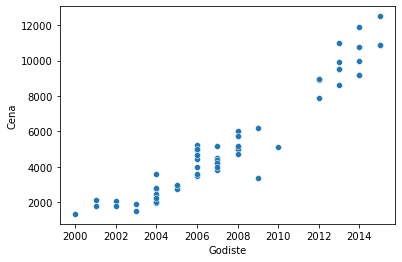

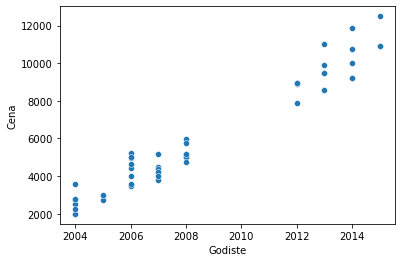

-----------------------------------
Model Clio


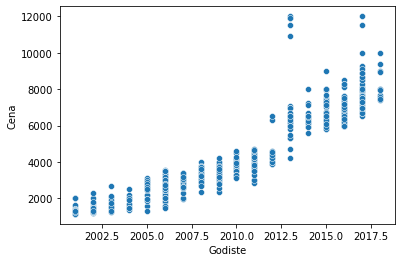

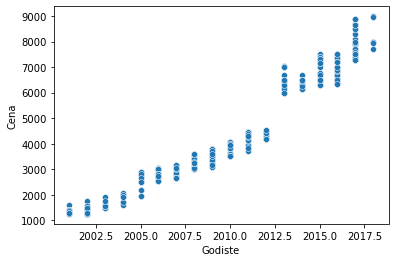

-----------------------------------
Model Colt


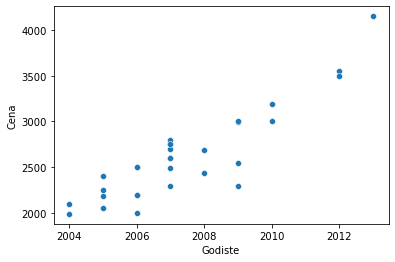

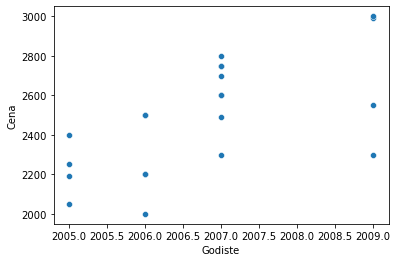

-----------------------------------
Model Cooper


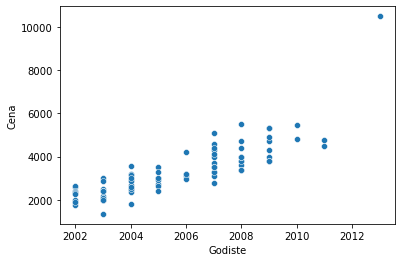

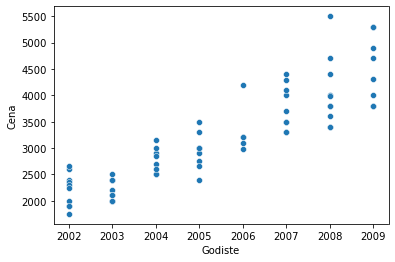

-----------------------------------
Model Corsa C


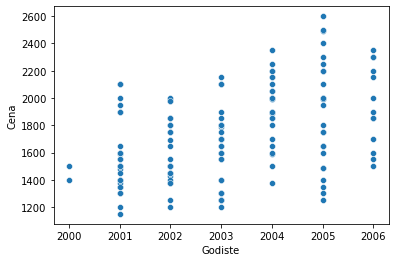

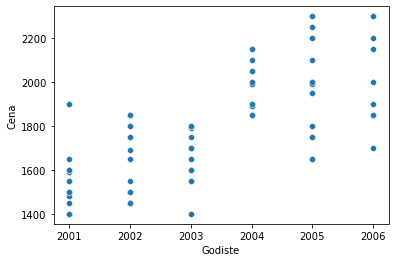

-----------------------------------
Model Corsa D


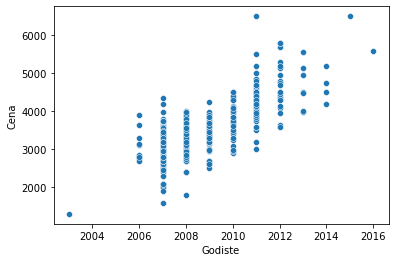

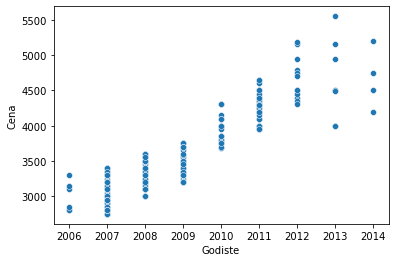

-----------------------------------
Model Corsa E


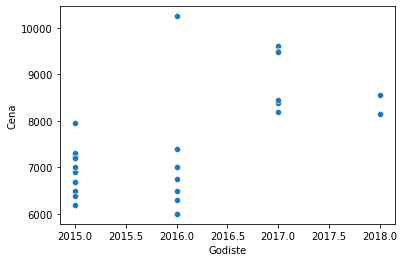

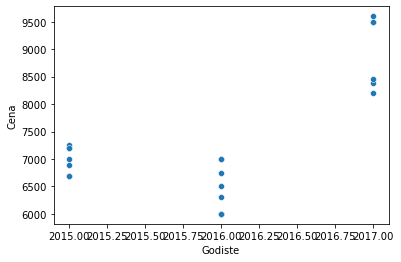

-----------------------------------
Model Countryman


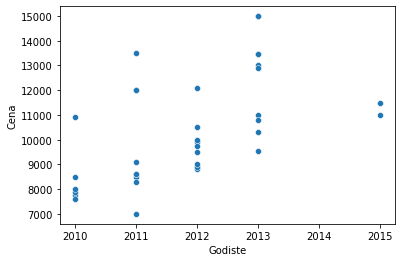

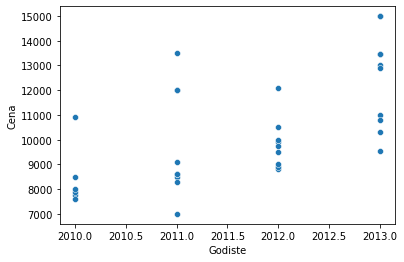

-----------------------------------
Model Croma


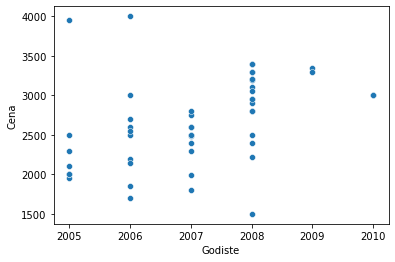

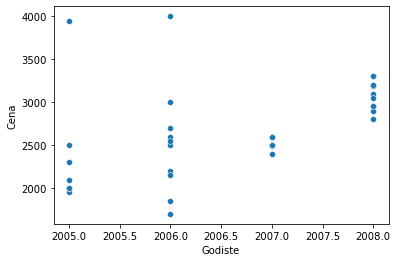

-----------------------------------
Model Cruze


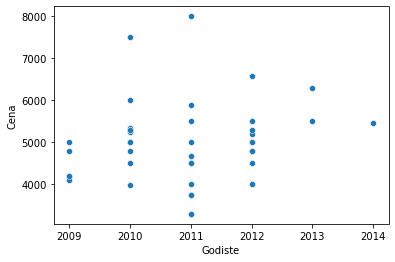

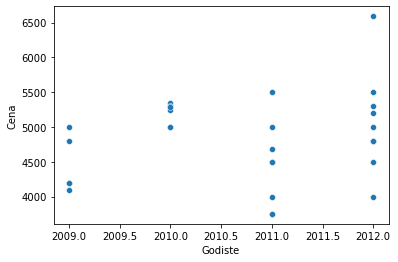

-----------------------------------
Model DS3


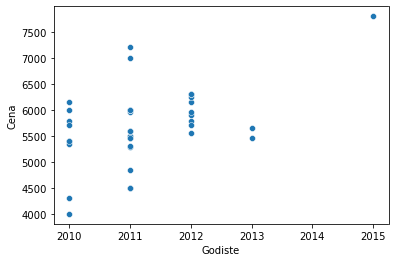

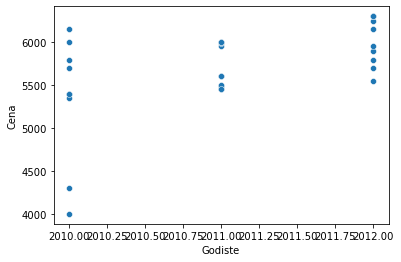

-----------------------------------
Model Delta


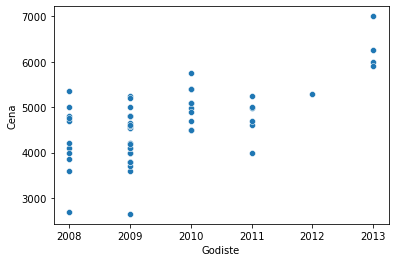

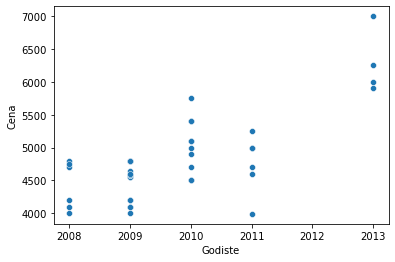

-----------------------------------
Model Doblo


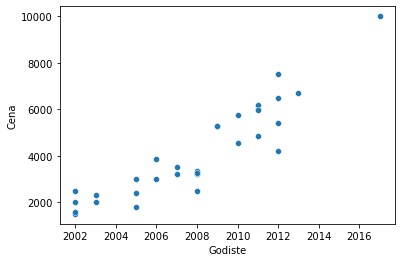

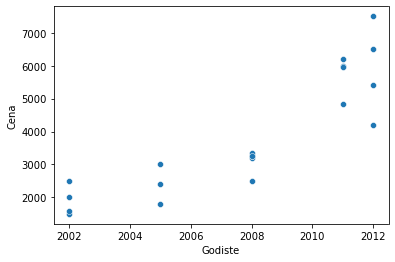

-----------------------------------
Model E 200


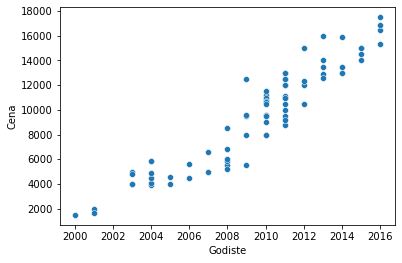

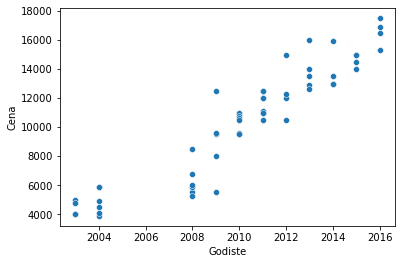

-----------------------------------
Model E 220


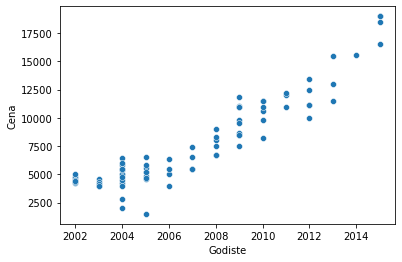

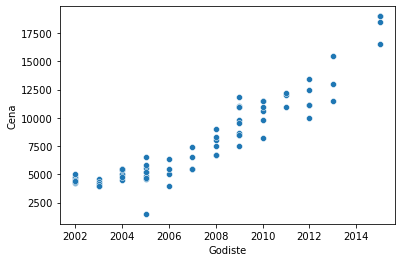

-----------------------------------
Model EVO


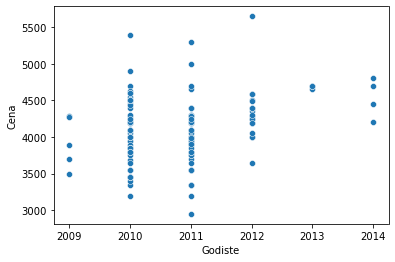

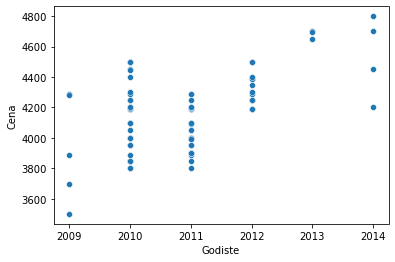

-----------------------------------
Model Espace


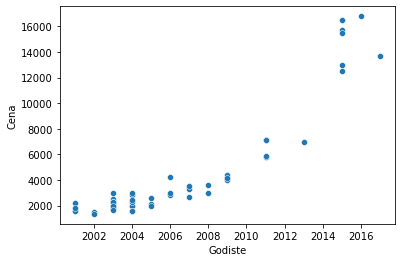

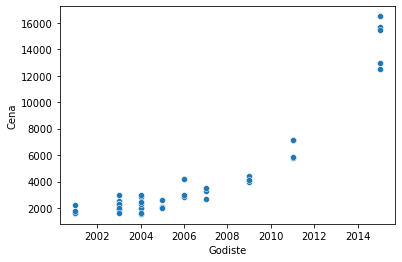

-----------------------------------
Model Fabia


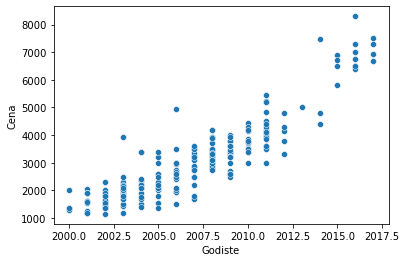

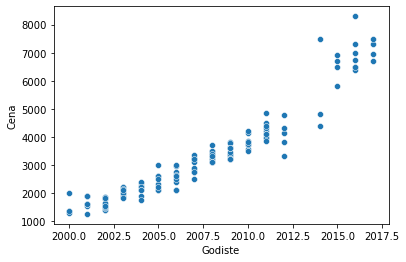

-----------------------------------
Model Fiesta


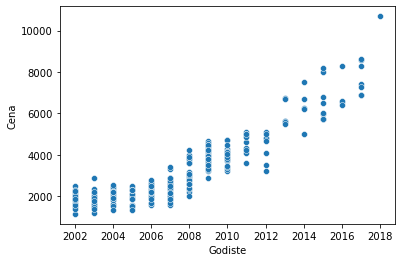

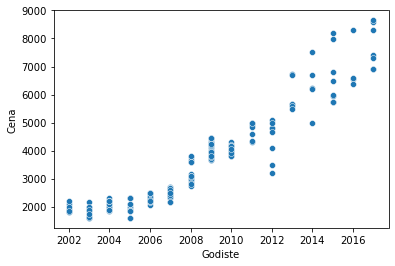

-----------------------------------
Model Focus


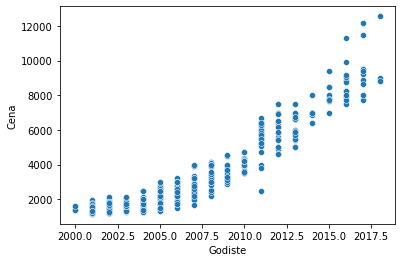

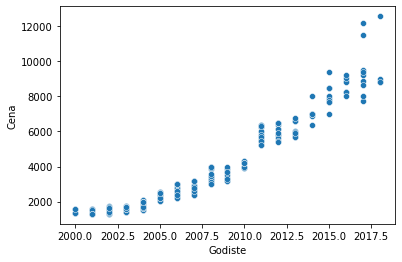

-----------------------------------
Model Fox


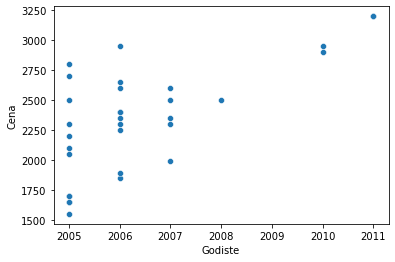

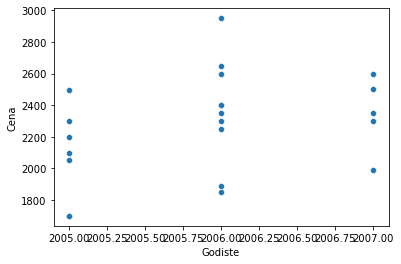

-----------------------------------
Model Fusion


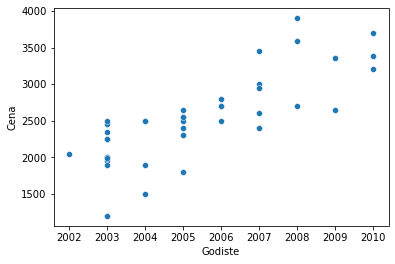

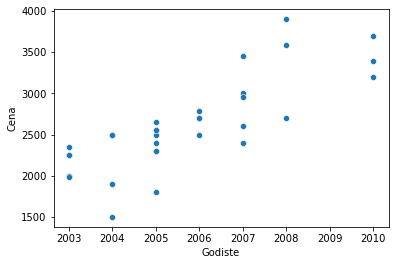

-----------------------------------
Model Galaxy


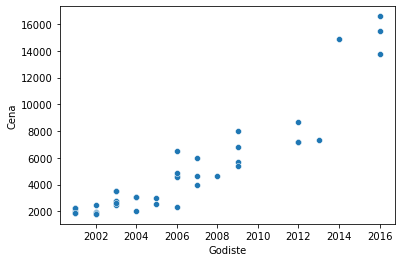

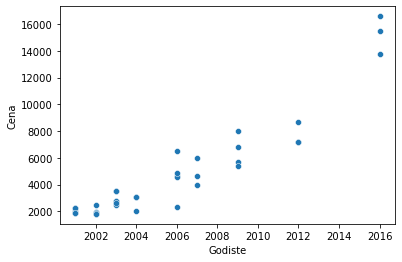

-----------------------------------
Model Giulietta


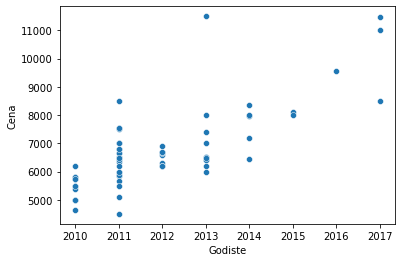

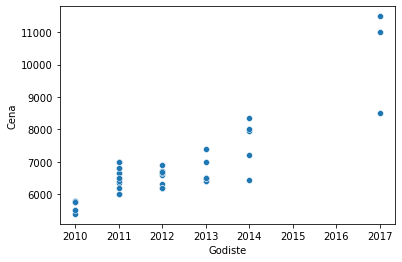

-----------------------------------
Model Golf 4


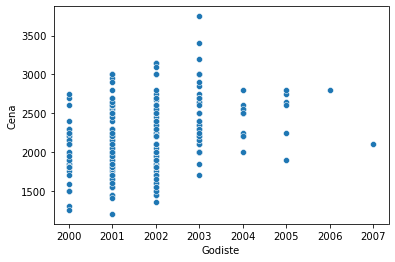

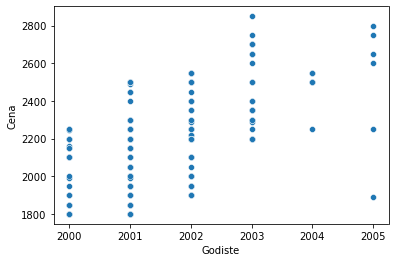

-----------------------------------
Model Golf 5


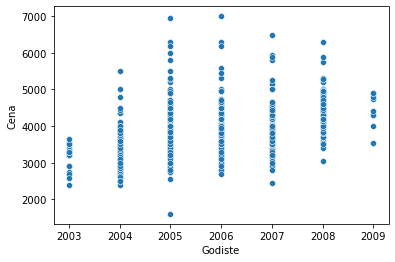

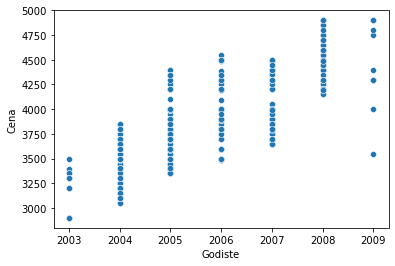

-----------------------------------
Model Golf 6


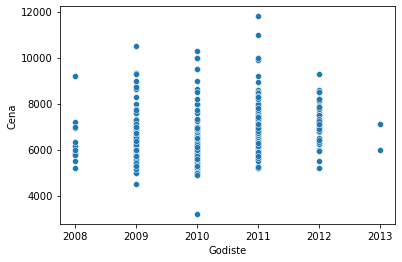

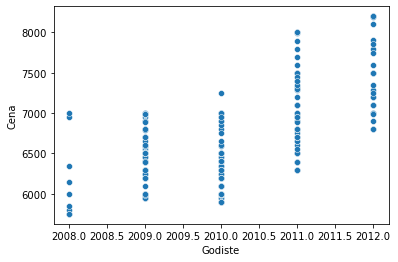

-----------------------------------
Model Golf 7


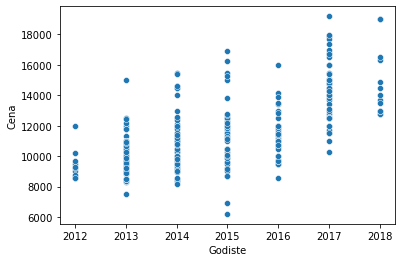

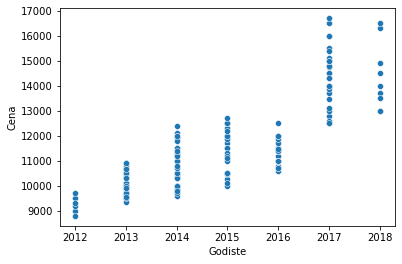

-----------------------------------
Model Golf Plus


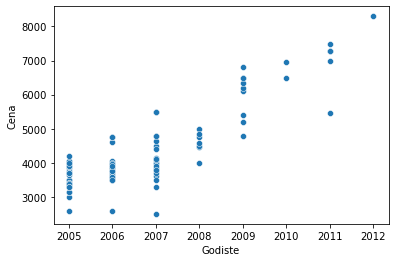

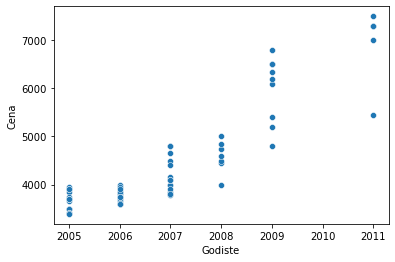

-----------------------------------
Model Grand Scenic


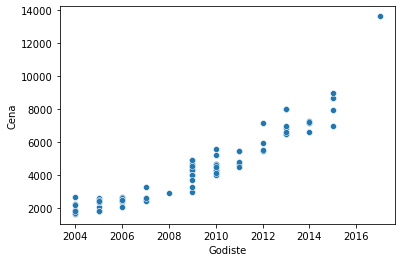

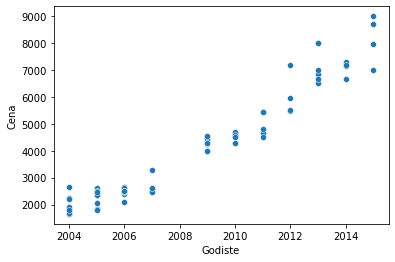

-----------------------------------
Model Grand Vitara


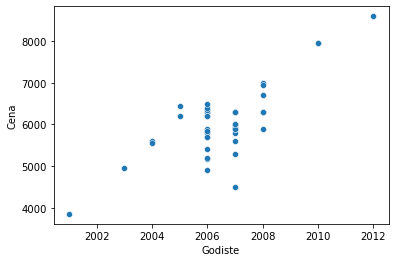

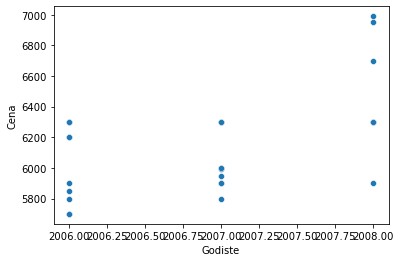

-----------------------------------
Model Grande Punto


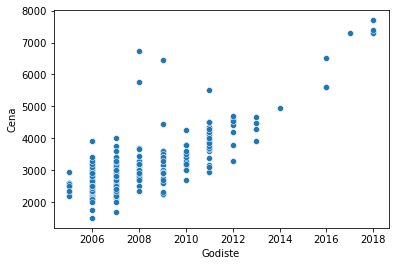

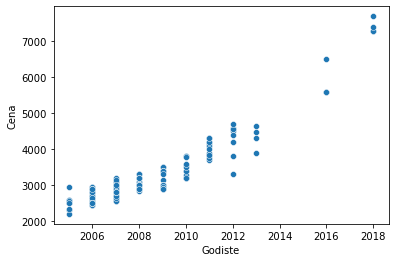

-----------------------------------
Model Ibiza


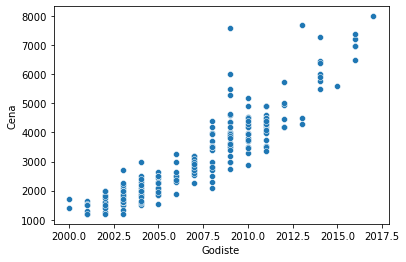

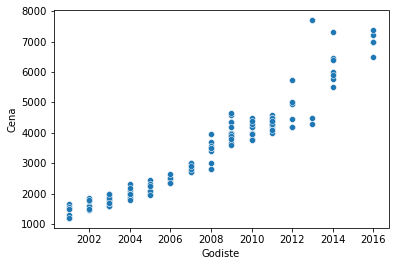

-----------------------------------
Model Idea


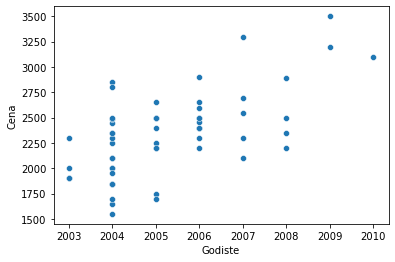

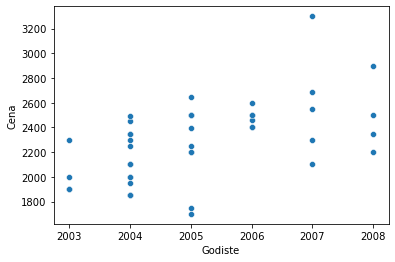

-----------------------------------
Model Insignia


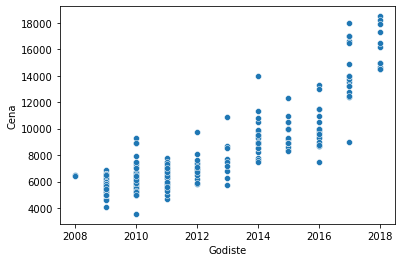

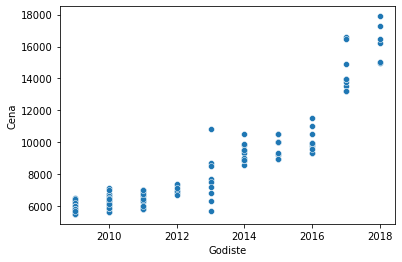

-----------------------------------
Model Jetta


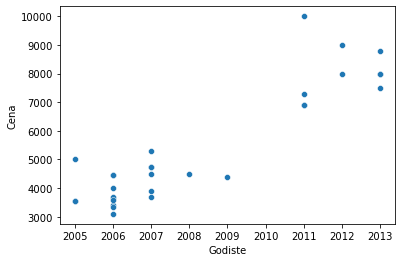

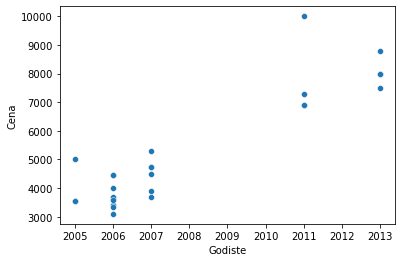

-----------------------------------
Model Juke


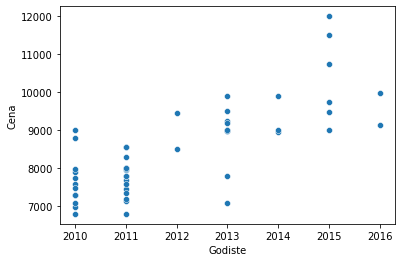

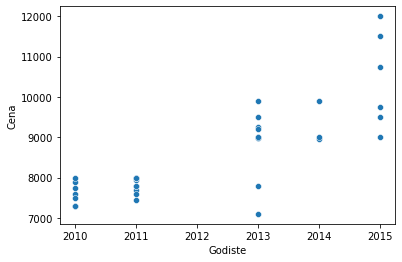

-----------------------------------
Model Ka


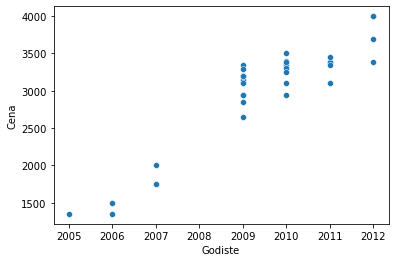

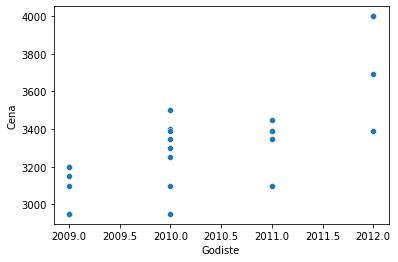

-----------------------------------
Model Kadjar


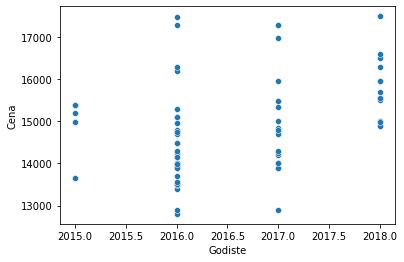

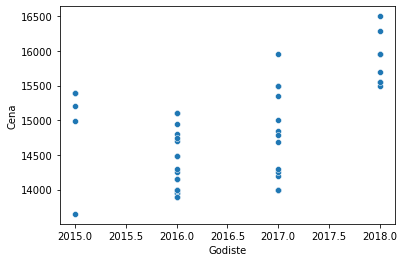

-----------------------------------
Model Kangoo


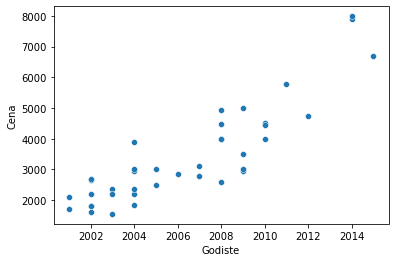

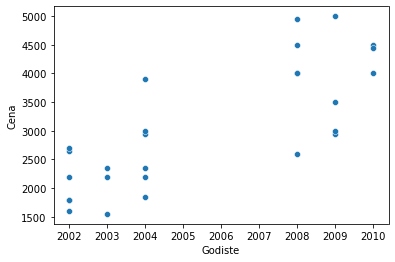

-----------------------------------
Model Kuga


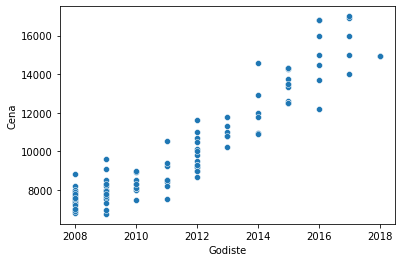

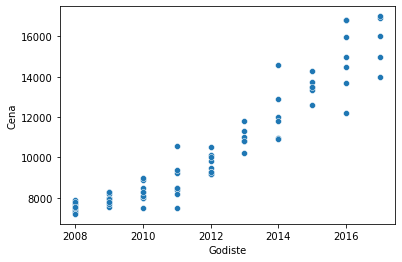

-----------------------------------
Model Laguna


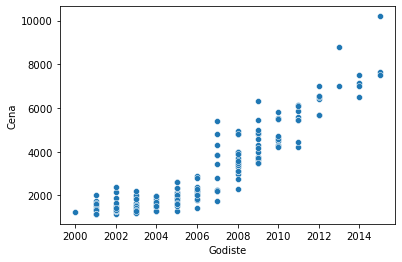

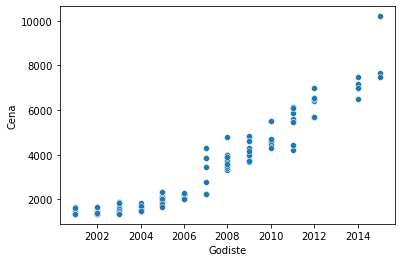

-----------------------------------
Model Leon


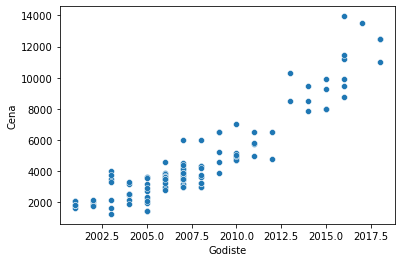

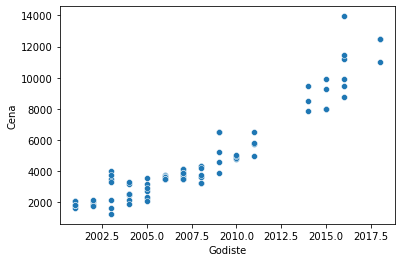

-----------------------------------
Model Logan


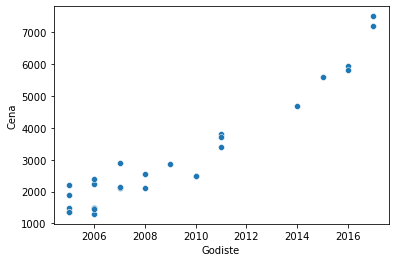

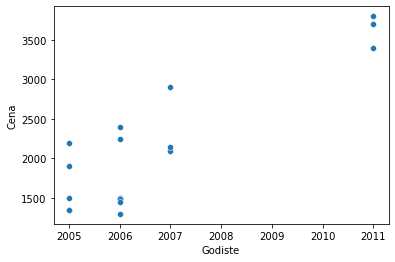

-----------------------------------
Model Megane


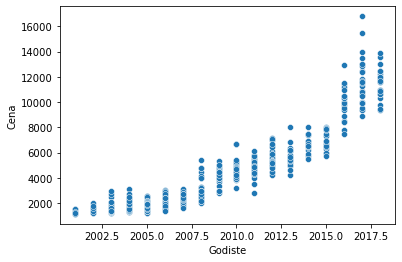

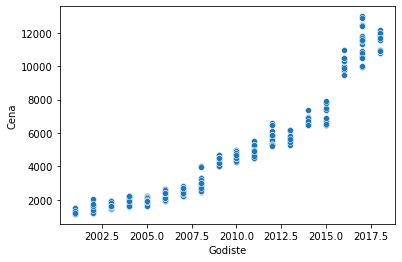

-----------------------------------
Model Meriva


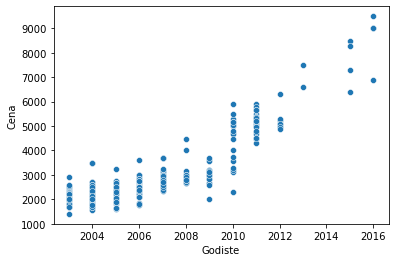

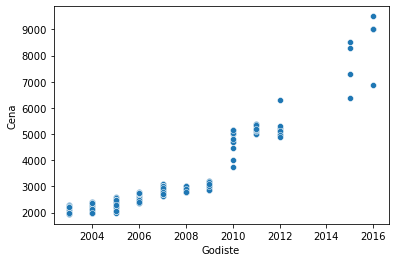

-----------------------------------
Model MiTo


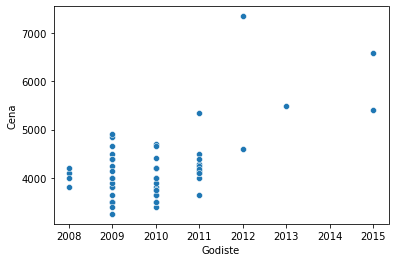

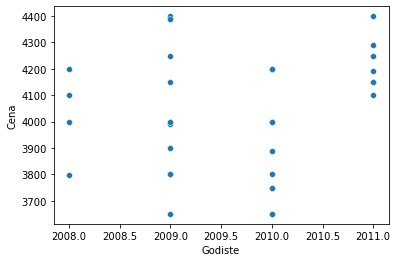

-----------------------------------
Model Micra


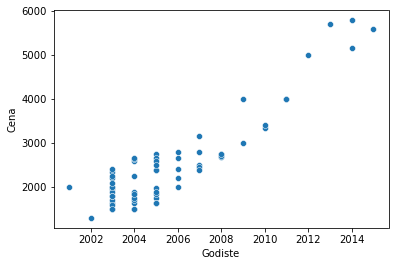

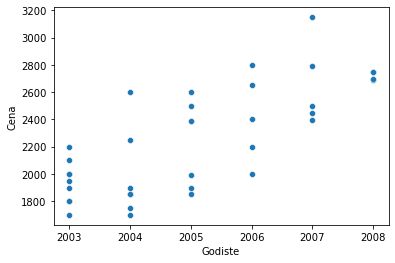

-----------------------------------
Model Modus


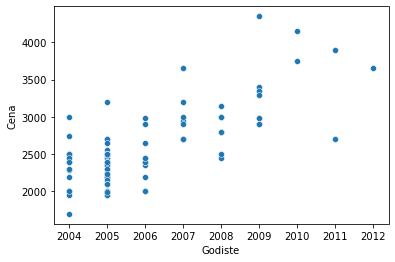

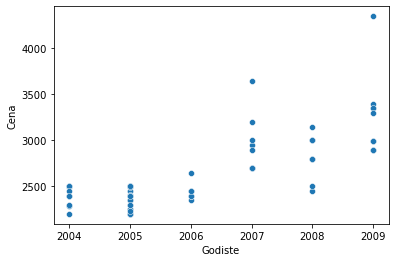

-----------------------------------
Model Mondeo


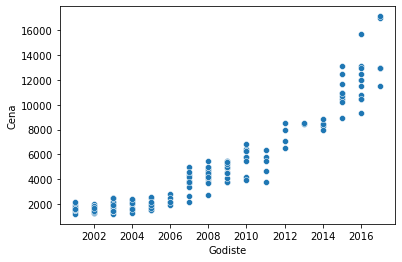

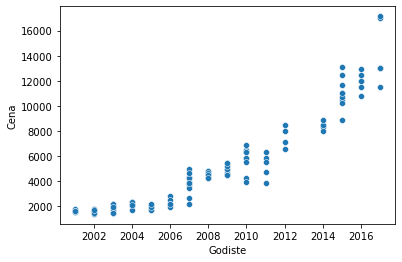

-----------------------------------
Model Musa


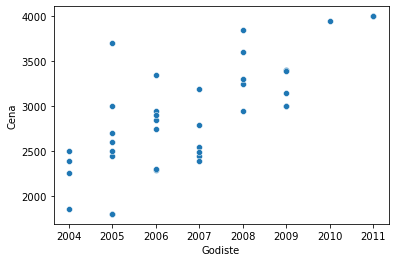

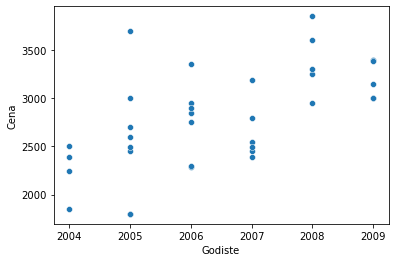

-----------------------------------
Model Note


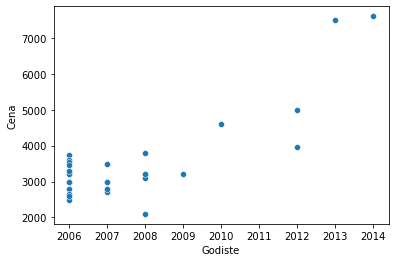

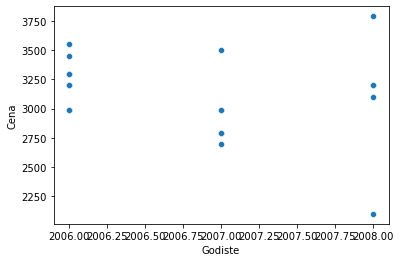

-----------------------------------
Model Octavia


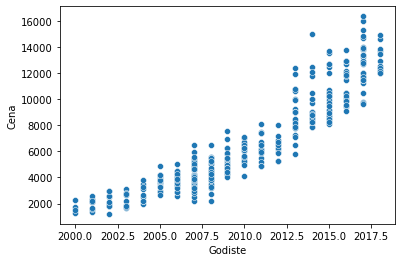

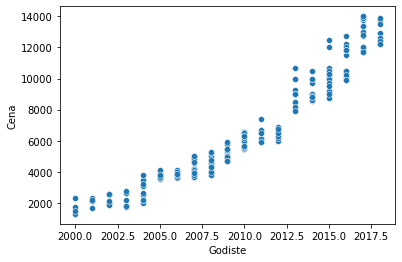

-----------------------------------
Model One


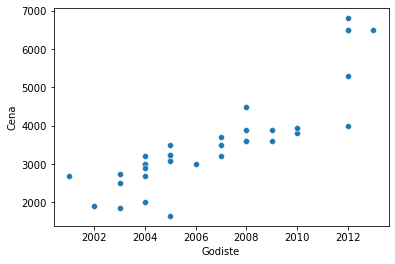

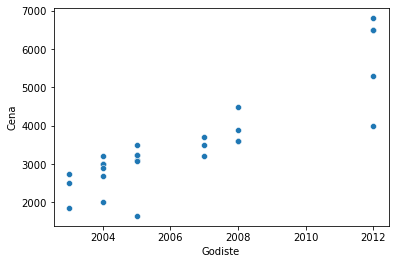

-----------------------------------
Model Outlander


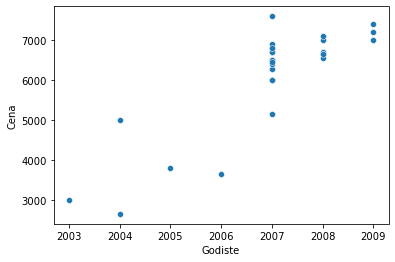

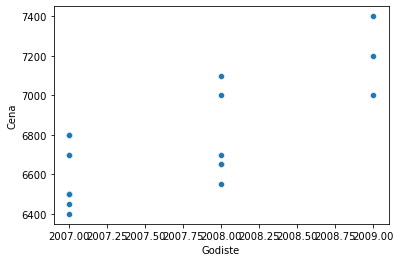

-----------------------------------
Model Panda


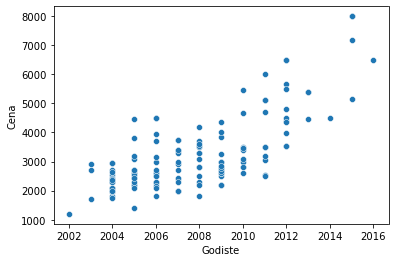

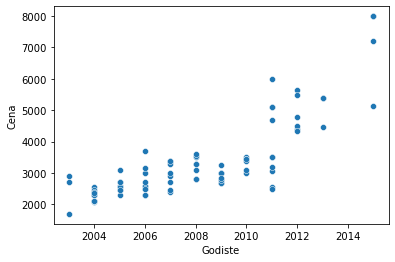

-----------------------------------
Model Passat B5.5


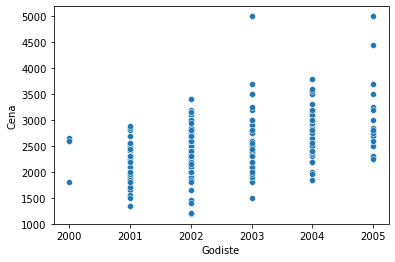

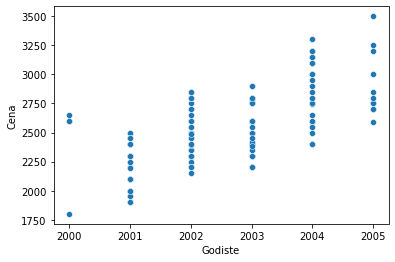

-----------------------------------
Model Passat B6


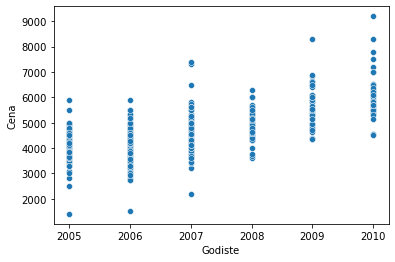

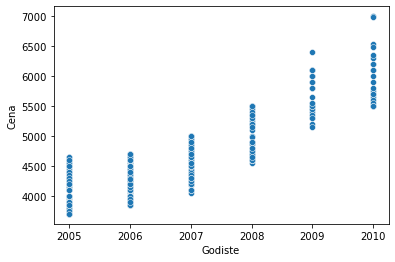

-----------------------------------
Model Passat B7


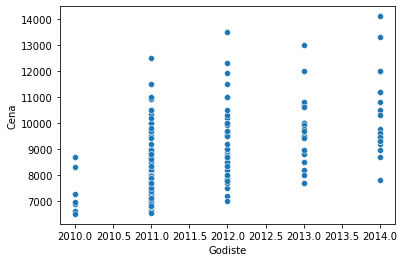

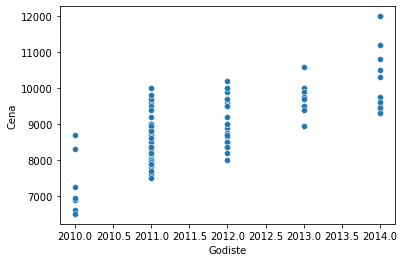

-----------------------------------
Model Passat B8


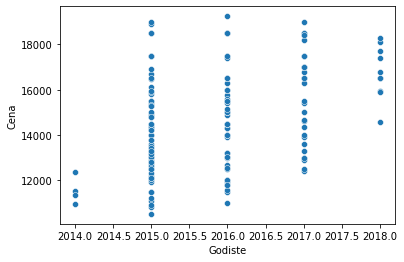

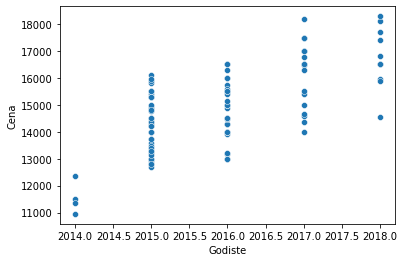

-----------------------------------
Model Passat CC


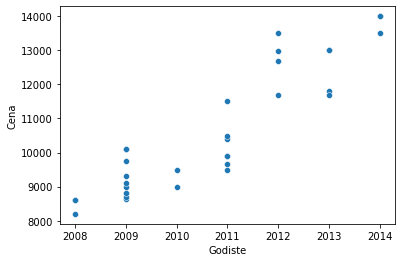

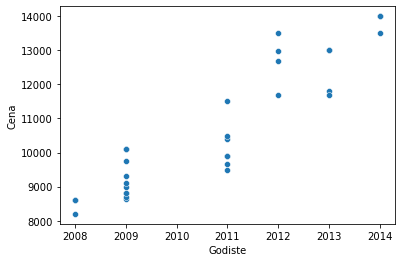

-----------------------------------
Model Polo


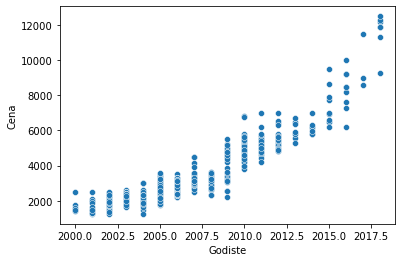

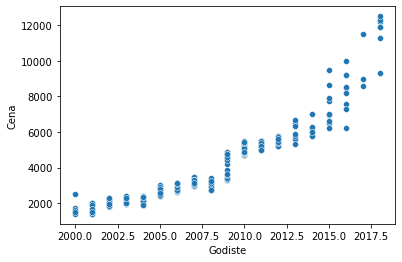

-----------------------------------
Model Punto


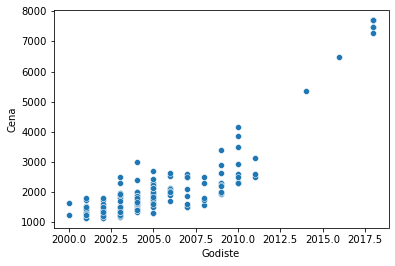

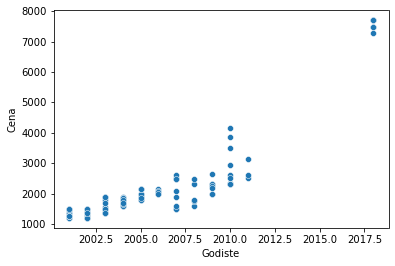

-----------------------------------
Model Q5


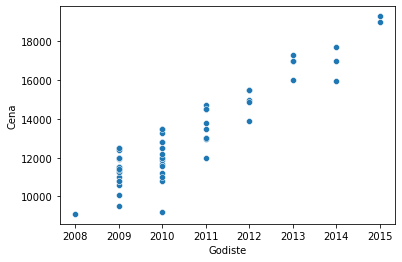

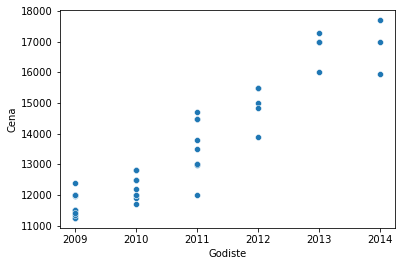

-----------------------------------
Model Qashqai


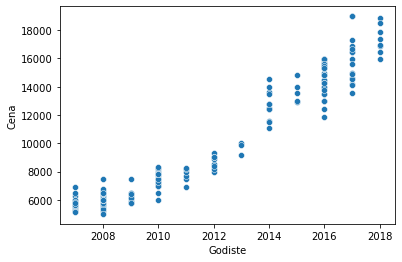

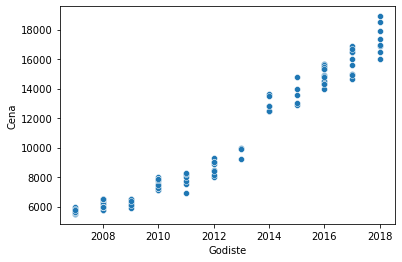

-----------------------------------
Model RAV 4


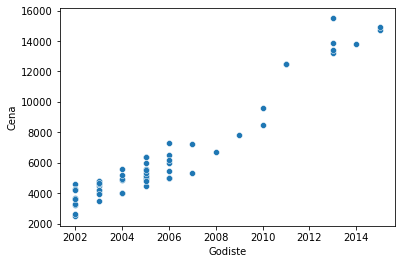

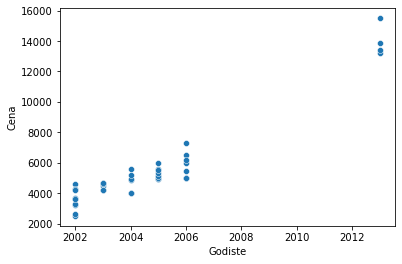

-----------------------------------
Model Roomster


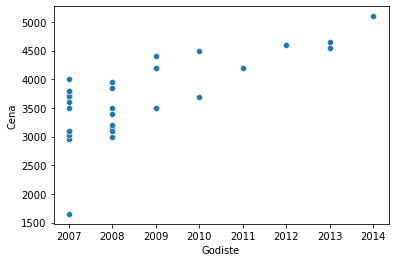

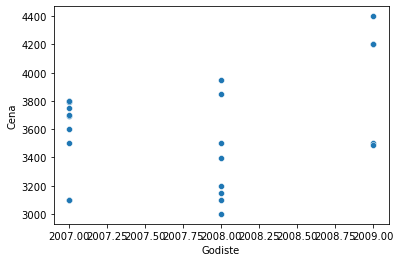

-----------------------------------
Model Santa Fe


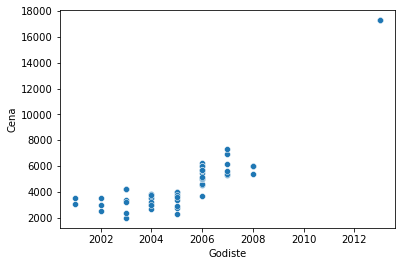

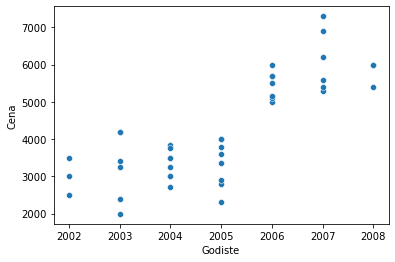

-----------------------------------
Model Scenic


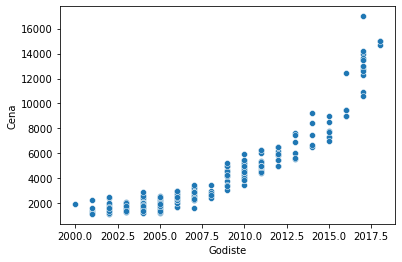

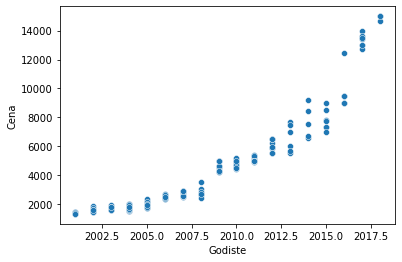

-----------------------------------
Model Sharan


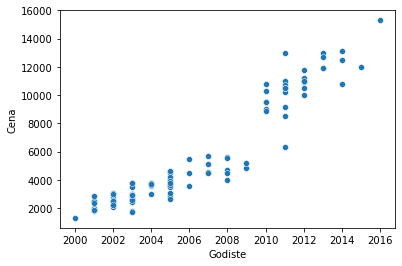

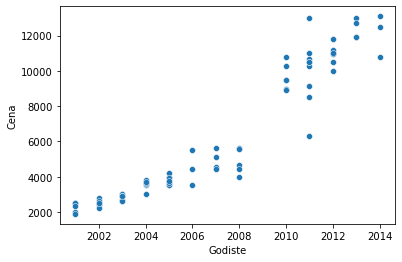

-----------------------------------
Model Sorento


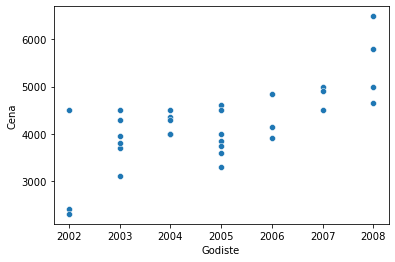

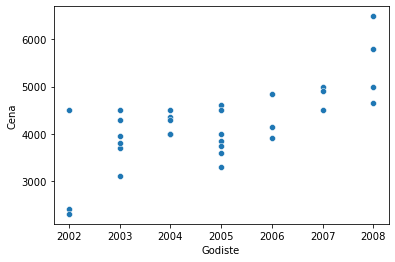

-----------------------------------
Model Sportage


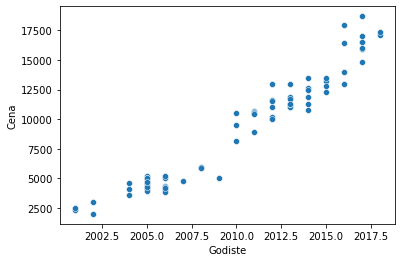

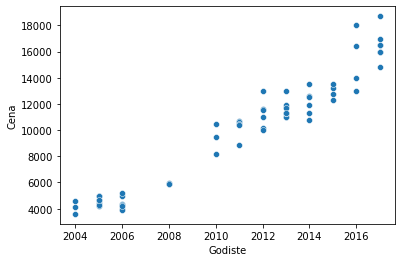

-----------------------------------
Model Stilo


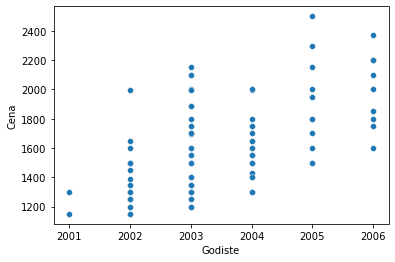

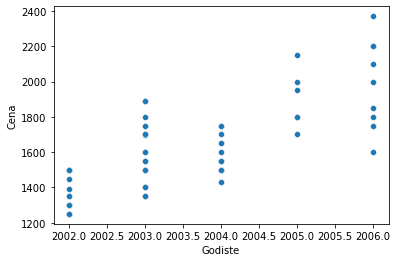

-----------------------------------
Model Superb


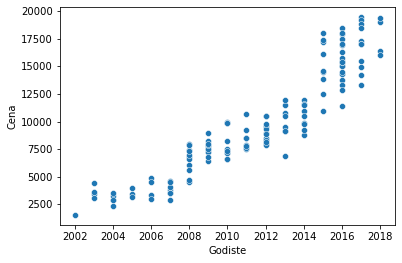

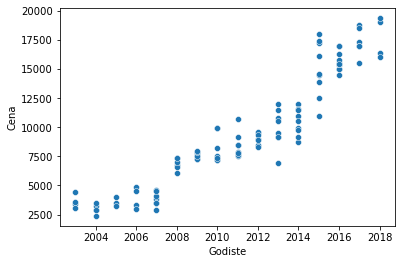

-----------------------------------
Model Swift


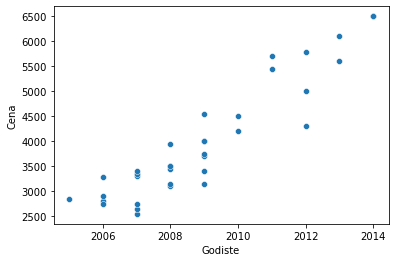

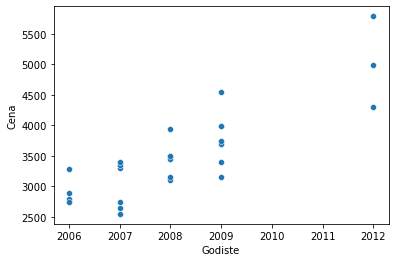

-----------------------------------
Model Talisman


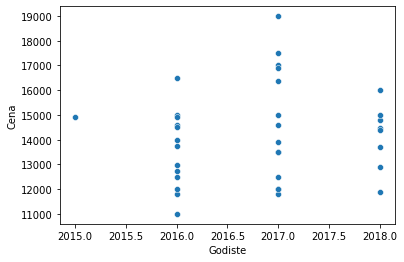

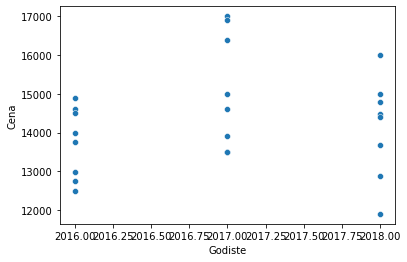

-----------------------------------
Model Tiguan


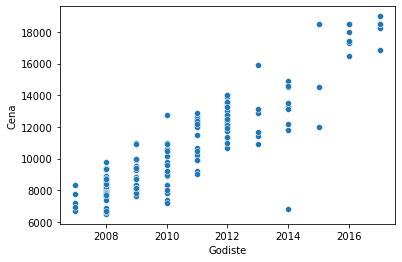

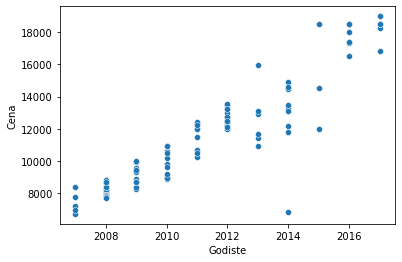

-----------------------------------
Model Touareg


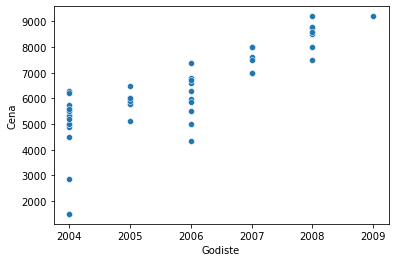

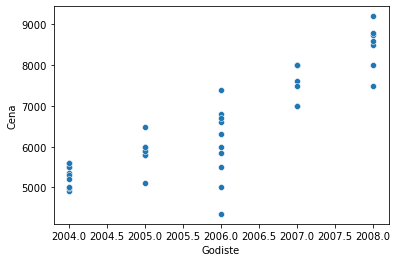

-----------------------------------
Model Touran


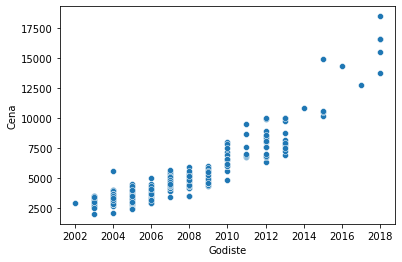

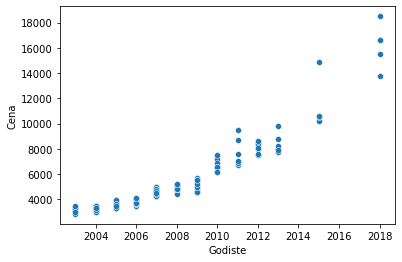

-----------------------------------
Model Tucson


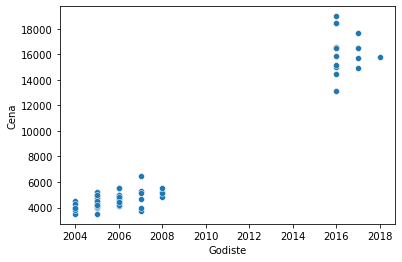

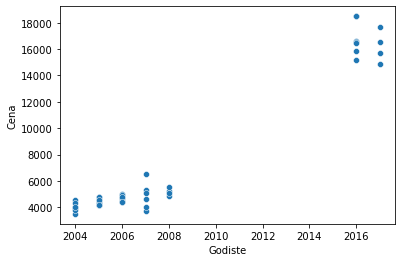

-----------------------------------
Model Twingo


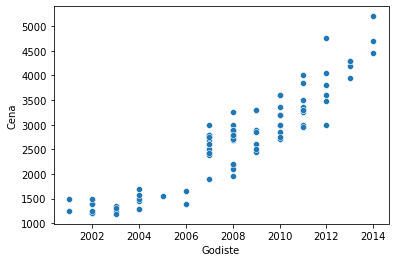

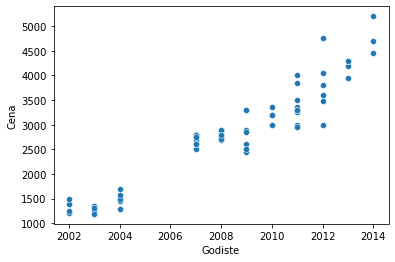

-----------------------------------
Model V40


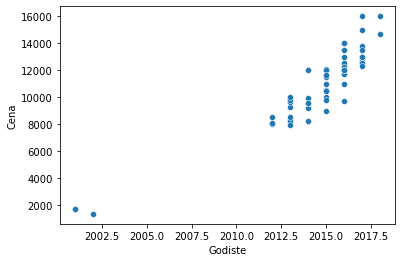

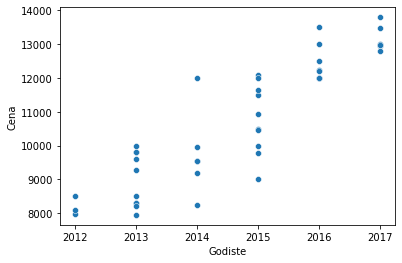

-----------------------------------
Model V50


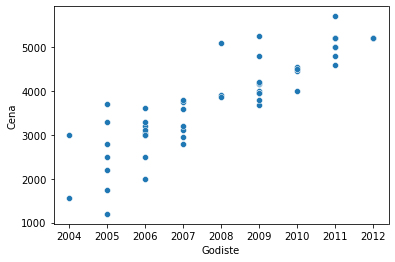

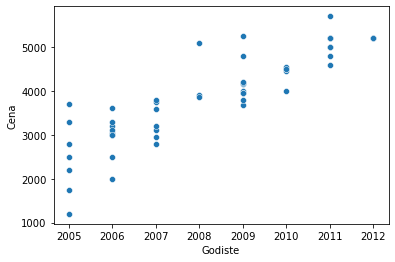

-----------------------------------
Model Vectra C


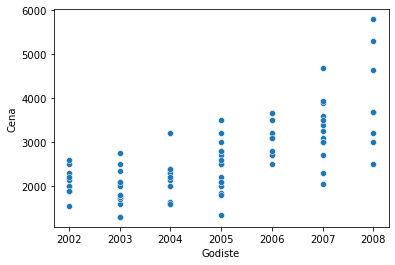

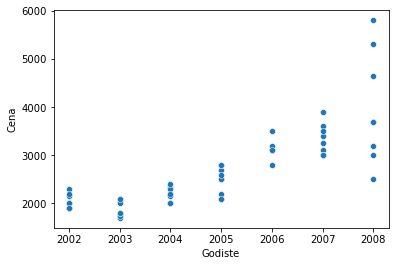

-----------------------------------
Model X-Trail


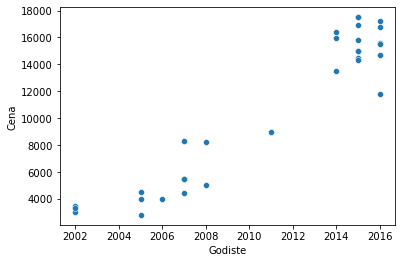

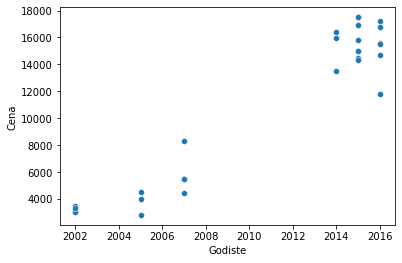

-----------------------------------
Model X1


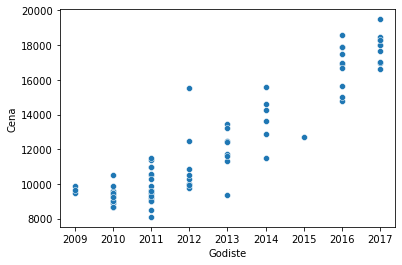

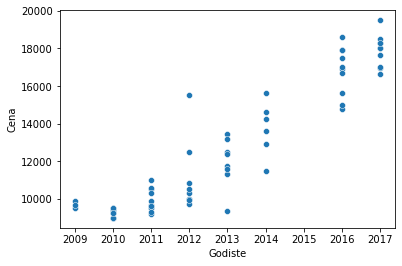

-----------------------------------
Model X3


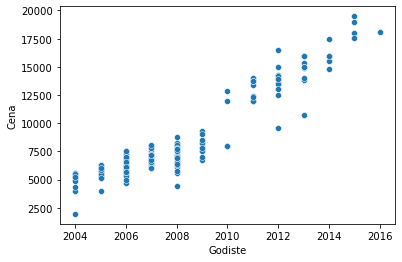

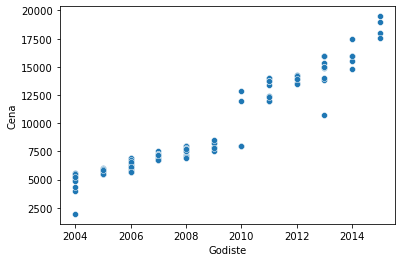

-----------------------------------
Model Xsara Picasso


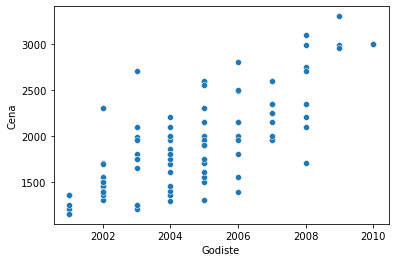

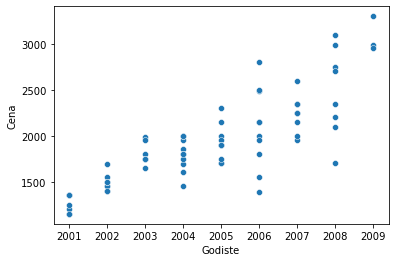

-----------------------------------
Model Yaris


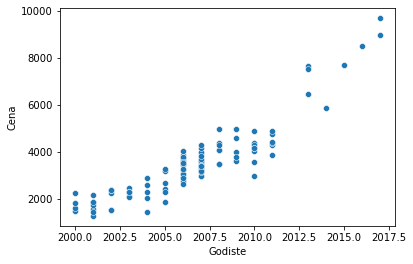

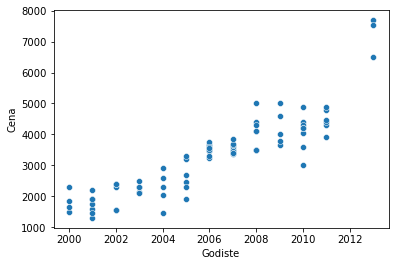

-----------------------------------
Model Ypsilon


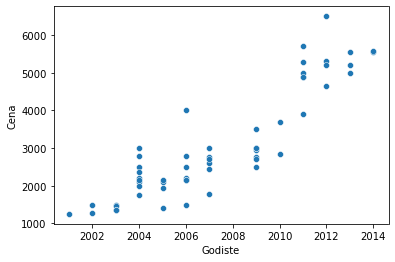

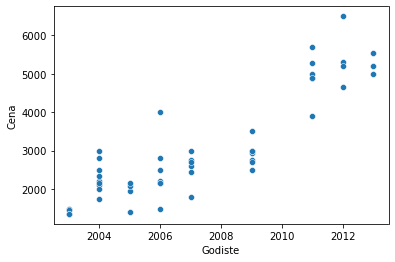

-----------------------------------
Model Zafira


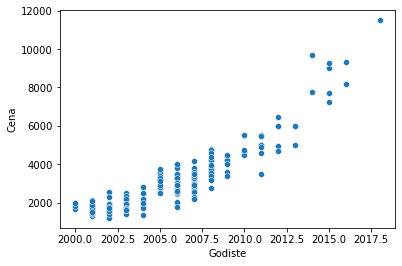

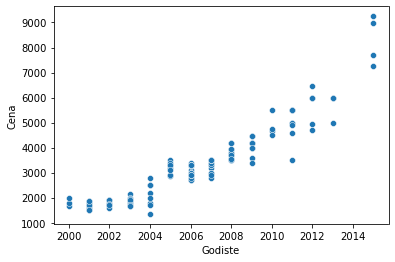

In [336]:
for model in df['Model'].unique():
    
    if int(df[df['Model']==model].count()[0])>=30:
        print('-'*35)
        print('Model {}'.format(model))
        sns.scatterplot('Godiste', 'Cena', data=df[df['Model']==model])
        plt.show()

        for year in range(df[df['Model']==model]['Godiste'].min(), df[df['Model']==model]['Godiste'].max()+1):
            if df[(df['Model']==model) & (df['Godiste']==year)].count()[0]>10:
                upper = df[(df['Model']==model) & (df['Godiste']==year)]['Cena'].quantile(0.85)
                lower = df[(df['Model']==model) & (df['Godiste']==year)]['Cena'].quantile(0.25)
                df.drop(df[(df['Model']==model) & (df['Godiste']==year) & (df['Cena']>upper)].index, inplace=True)
                df.drop(df[(df['Model']==model) & (df['Godiste']==year) & (df['Cena']< lower)].index, inplace=True)
            if df[(df['Model']==model) & (df['Godiste']==year)].count()[0]<3:
                df.drop(df[(df['Model']==model) & (df['Godiste']==year)].index, inplace=True)
 
        sns.scatterplot('Godiste', 'Cena', data=df[df['Model']==model])
        plt.show()
    

In [337]:
df.drop((df[df['Model'].isin(['Captiva','Agila', '525'])].index), inplace=True)
df.drop(df[(df['Model']=='A 160') & (df['Godiste']==2016)].index, inplace=True)
df.drop(df[(df['Model']=='A 170') & (df['Godiste']==2008)].index, inplace=True)
df.drop(df[(df['Model']=='Alhambra') & (df['Godiste']==2012)].index, inplace=True)
df.drop(df[(df['Model']=='Altea') & (df['Godiste']>2007)].index, inplace=True)
df.drop(df[(df['Model']=='Astra G') & (df['Godiste']==2005)].index, inplace=True)
df.drop(df[(df['Model']=='Auris') & (df['Godiste']==2016)].index, inplace=True)
df.drop(df[(df['Model']=='Astra G') & (df['Godiste']==2005)].index, inplace=True)
df.drop(df[(df['Model']=='B 200') & (df['Godiste']>2009)].index, inplace=True)
df.drop(df[(df['Model']=='C1') & (df['Godiste']>2010)].index, inplace=True)
df.drop(df[(df['Model']=='C4 Grand Picasso') & (df['Godiste']>2011)].index, inplace=True)
df.drop(df[(df['Model']=='Espace') & (df['Godiste']>2011)].index, inplace=True)
df.drop(df[(df['Model']=='Giulietta') & (df['Godiste']>2014)].index, inplace=True)
df.drop(df[(df['Model']=='Meriva') & (df['Godiste']>2012)].index, inplace=True)
df.drop(df[(df['Model']=='Punto') & (df['Godiste']>2011)].index, inplace=True)
df.drop(df[(df['Model']=='Grande Punto') & (df['Godiste']>2011)].index, inplace=True)
df.drop(df[(df['Model']=='RAV 4') & (df['Godiste']>2006)].index, inplace=True)
df.drop(df[(df['Model']=='Sorento') & (df['Godiste']<2003)].index, inplace=True)
df.drop(df[(df['Model']=='120') & (df['Godiste']<2009)].index, inplace=True)
df.drop(df[(df['Model']=='5008') & (df['Godiste']<2014)].index, inplace=True)
df.drop(df[(df['Model']=='Touran') & (df['Godiste']<2016)].index, inplace=True)






In [338]:
df = df.groupby('Model').filter(lambda x: len(x)>=70)

-----------------------------------
Model 116


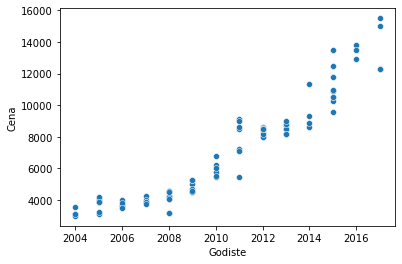

-----------------------------------
Model 118


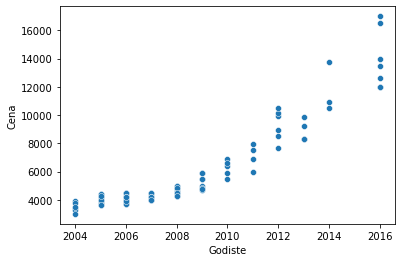

-----------------------------------
Model 147


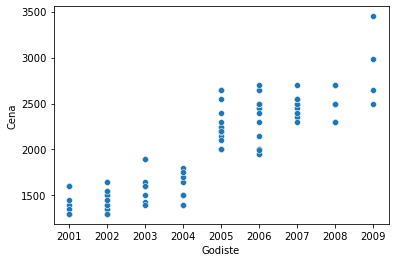

-----------------------------------
Model 159


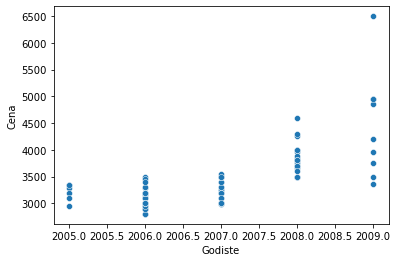

-----------------------------------
Model 206


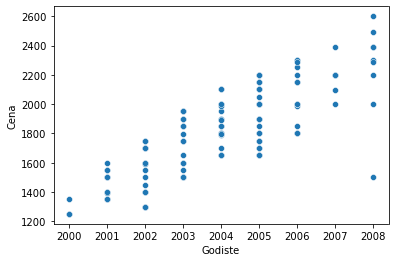

-----------------------------------
Model 207


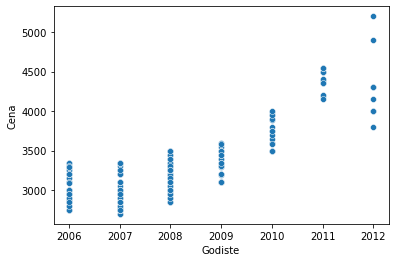

-----------------------------------
Model 208


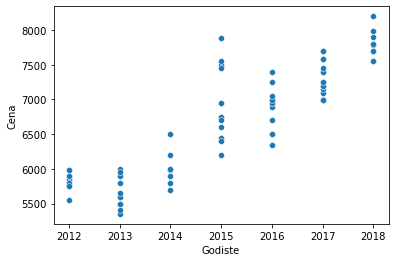

-----------------------------------
Model 3008


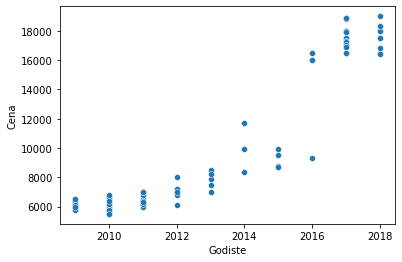

-----------------------------------
Model 307


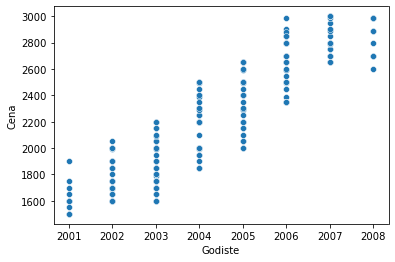

-----------------------------------
Model 308


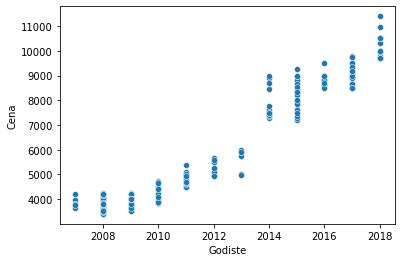

-----------------------------------
Model 316


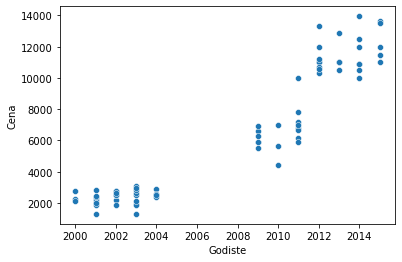

-----------------------------------
Model 318


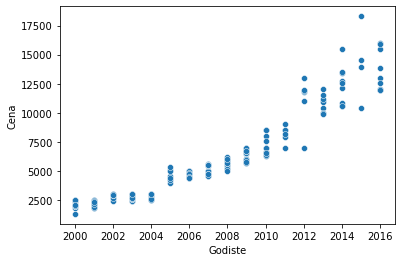

-----------------------------------
Model 320


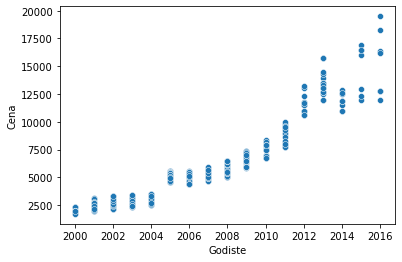

-----------------------------------
Model 407


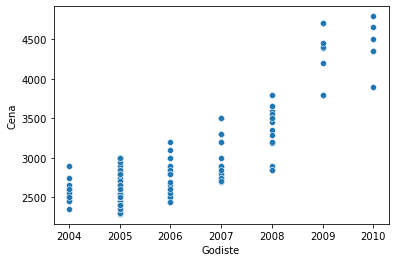

-----------------------------------
Model 500


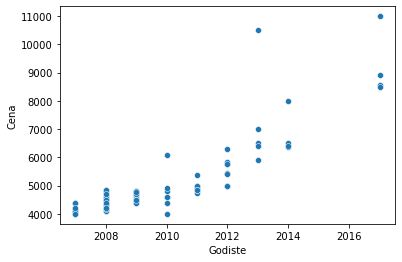

-----------------------------------
Model 508


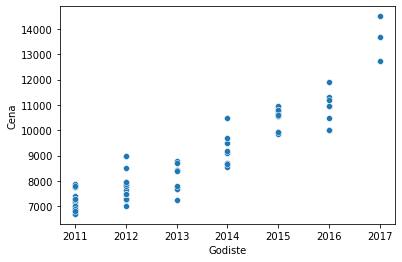

-----------------------------------
Model 520


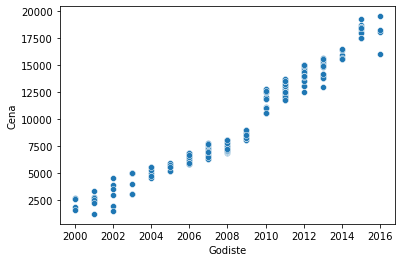

-----------------------------------
Model 6


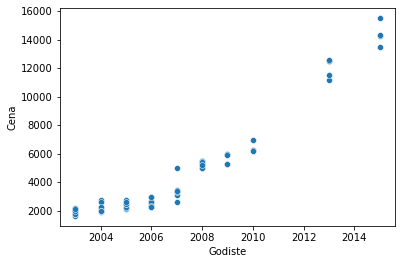

-----------------------------------
Model A 160


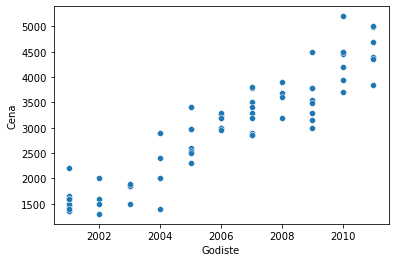

-----------------------------------
Model A 180


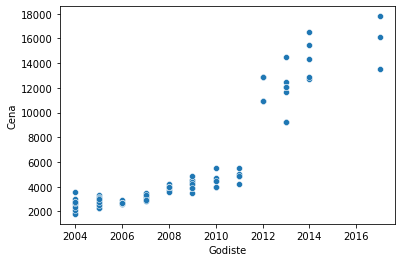

-----------------------------------
Model A3


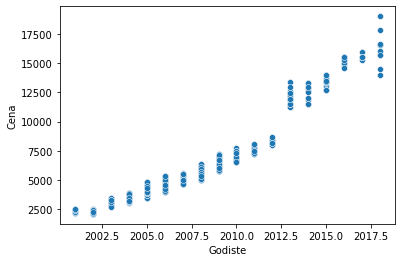

-----------------------------------
Model A4


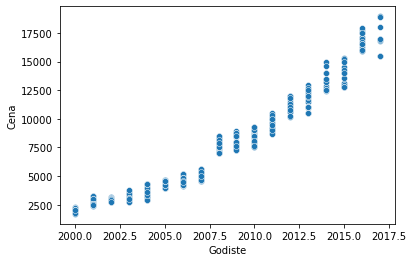

-----------------------------------
Model A6


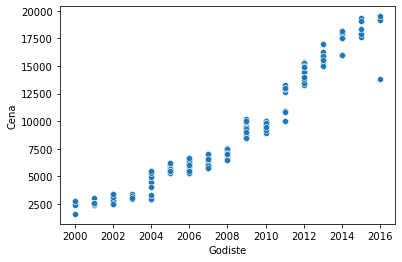

-----------------------------------
Model Astra G


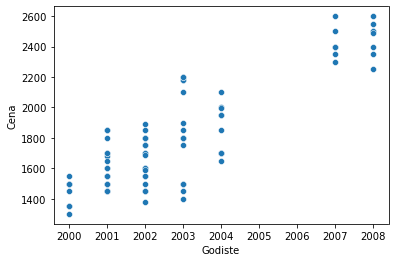

-----------------------------------
Model Astra H


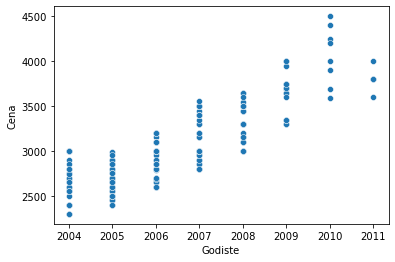

-----------------------------------
Model Astra J


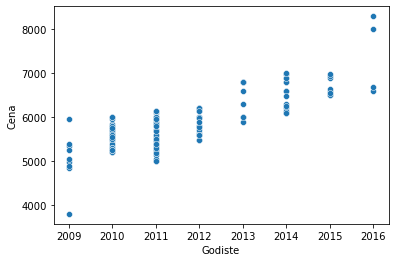

-----------------------------------
Model B 180


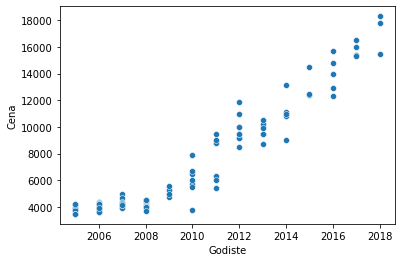

-----------------------------------
Model Bravo


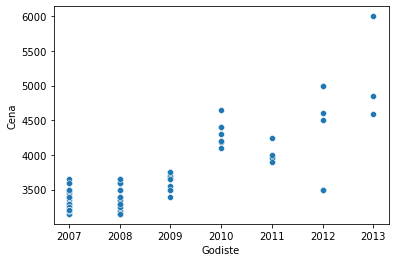

-----------------------------------
Model C 200


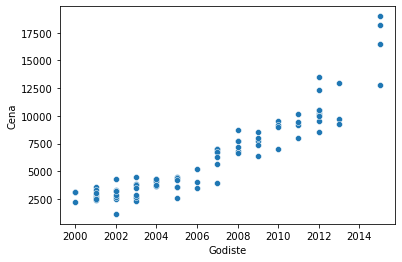

-----------------------------------
Model C 220


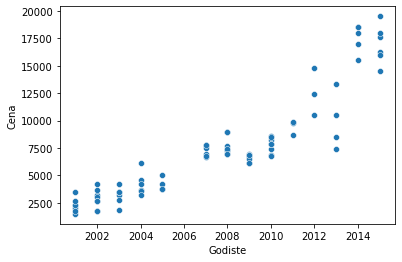

-----------------------------------
Model C-Max


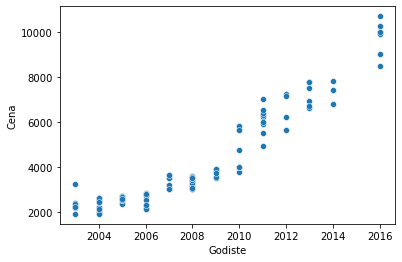

-----------------------------------
Model C3


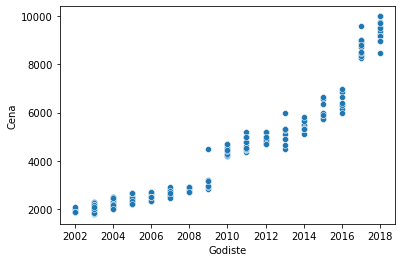

-----------------------------------
Model C4


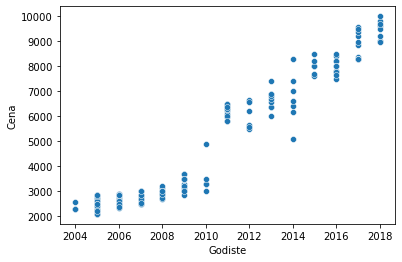

-----------------------------------
Model C4 Picasso


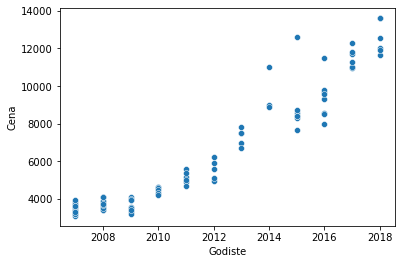

-----------------------------------
Model C5


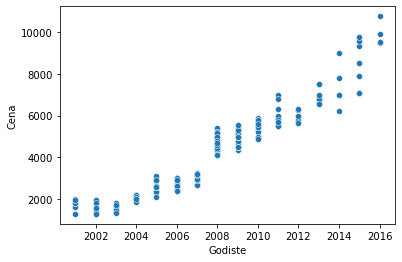

-----------------------------------
Model Clio


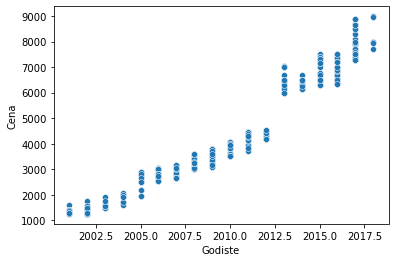

-----------------------------------
Model Cooper


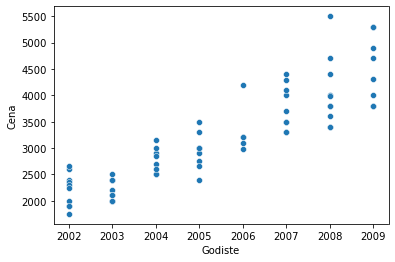

-----------------------------------
Model Corsa C


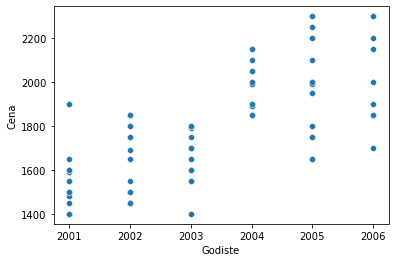

-----------------------------------
Model Corsa D


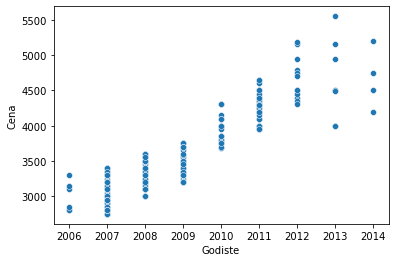

-----------------------------------
Model E 220


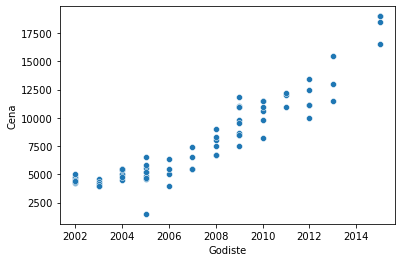

-----------------------------------
Model EVO


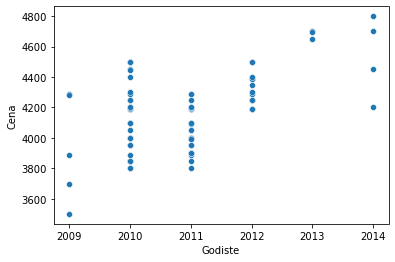

-----------------------------------
Model Fabia


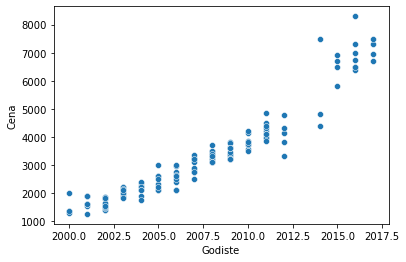

-----------------------------------
Model Fiesta


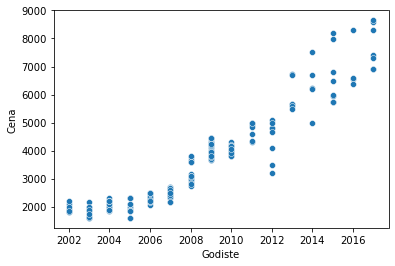

-----------------------------------
Model Focus


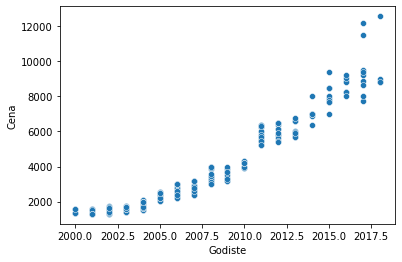

-----------------------------------
Model Golf 4


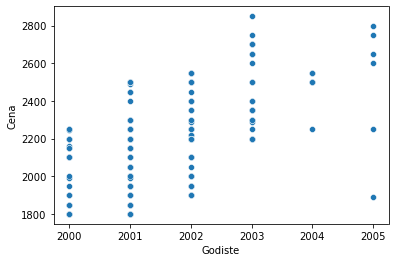

-----------------------------------
Model Golf 5


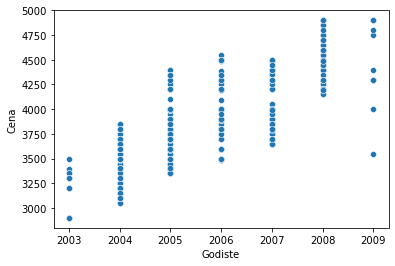

-----------------------------------
Model Golf 6


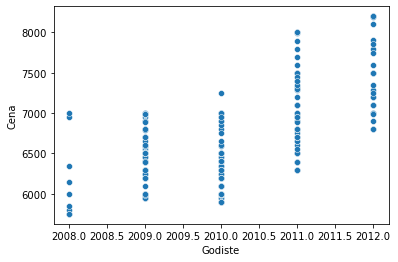

-----------------------------------
Model Golf 7


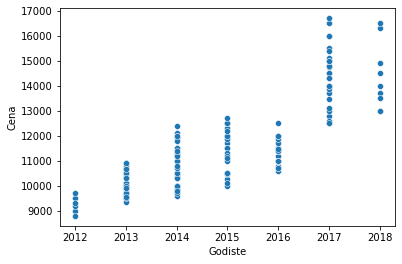

-----------------------------------
Model Grand Scenic


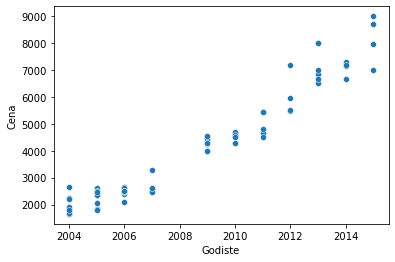

-----------------------------------
Model Grande Punto


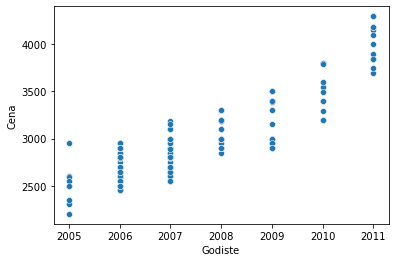

-----------------------------------
Model Ibiza


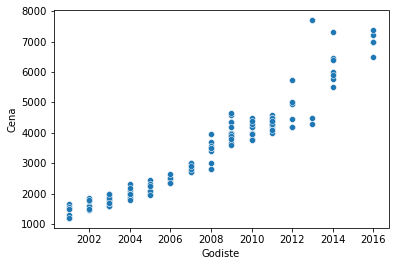

-----------------------------------
Model Insignia


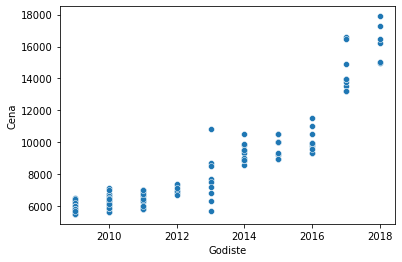

-----------------------------------
Model Kuga


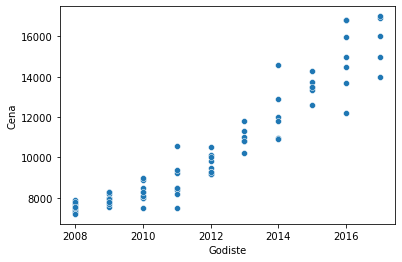

-----------------------------------
Model Laguna


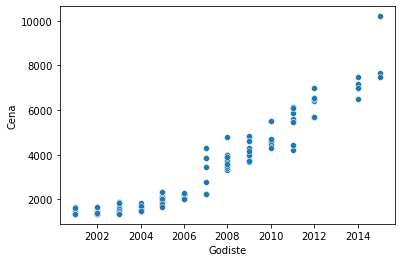

-----------------------------------
Model Leon


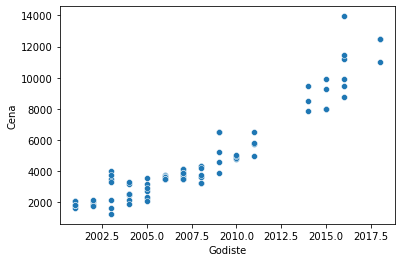

-----------------------------------
Model Megane


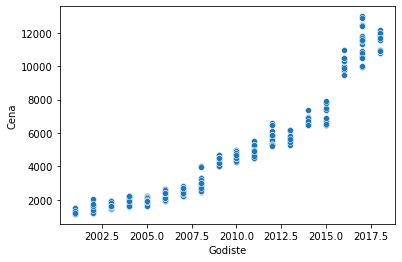

-----------------------------------
Model Meriva


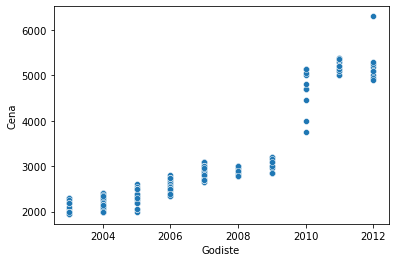

-----------------------------------
Model Mondeo


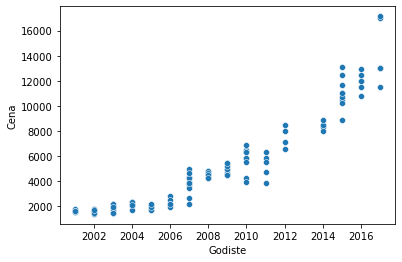

-----------------------------------
Model Octavia


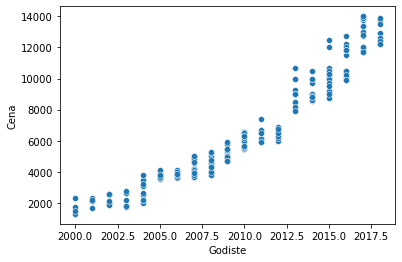

-----------------------------------
Model Panda


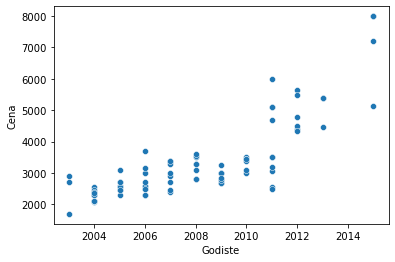

-----------------------------------
Model Passat B5.5


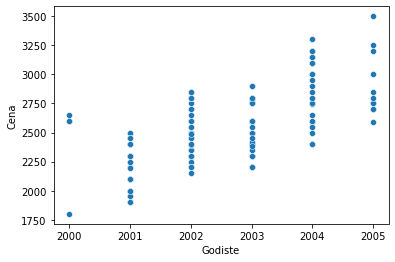

-----------------------------------
Model Passat B6


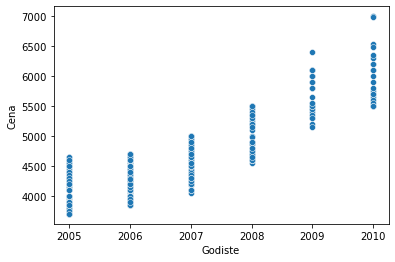

-----------------------------------
Model Passat B7


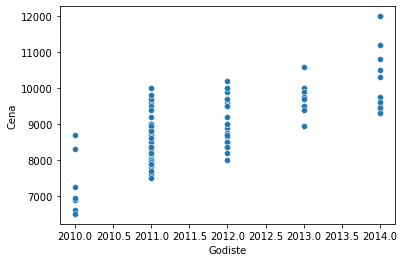

-----------------------------------
Model Passat B8


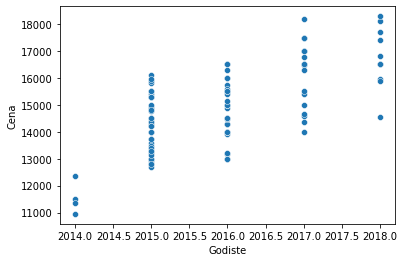

-----------------------------------
Model Polo


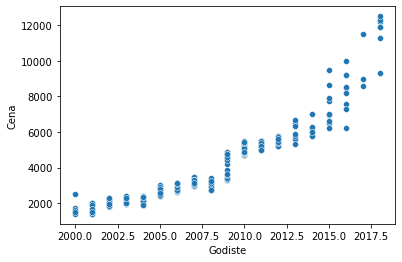

-----------------------------------
Model Punto


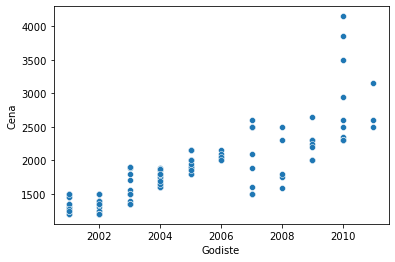

-----------------------------------
Model Qashqai


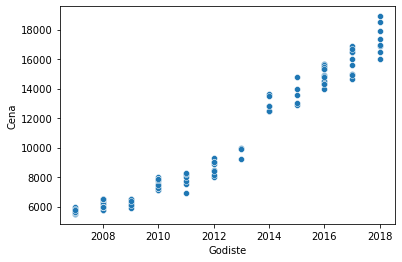

-----------------------------------
Model Scenic


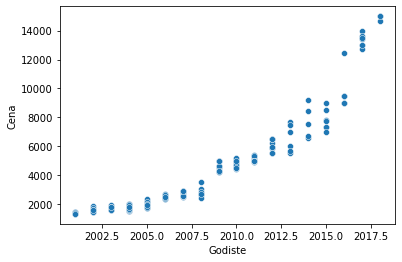

-----------------------------------
Model Sharan


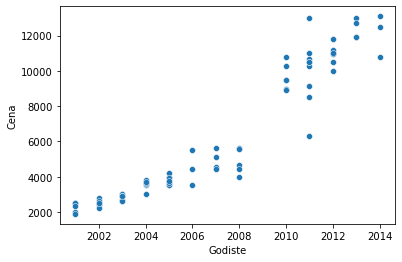

-----------------------------------
Model Stilo


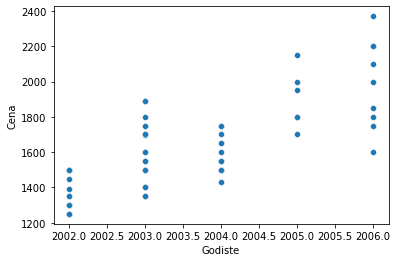

-----------------------------------
Model Superb


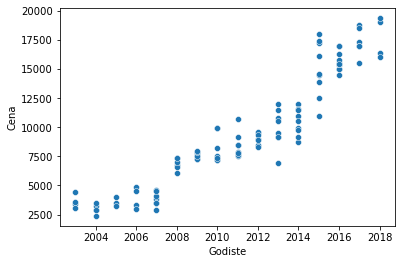

-----------------------------------
Model Tiguan


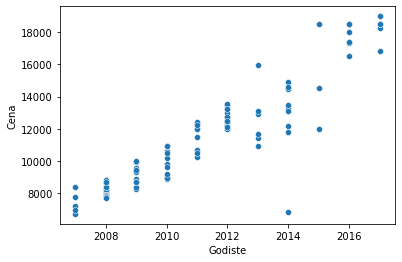

-----------------------------------
Model X1


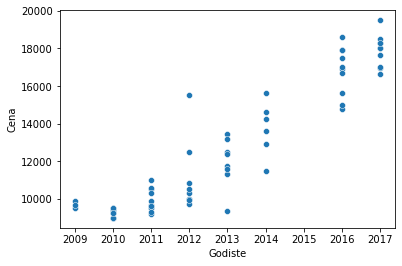

-----------------------------------
Model X3


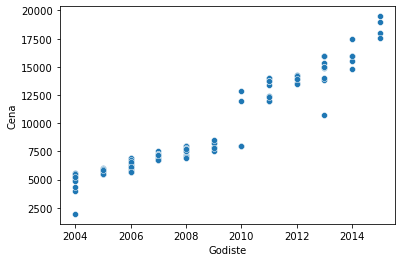

-----------------------------------
Model Xsara Picasso


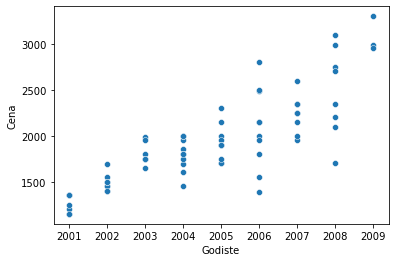

-----------------------------------
Model Yaris


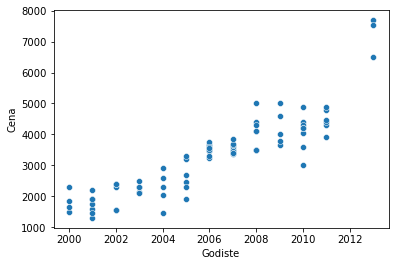

-----------------------------------
Model Zafira


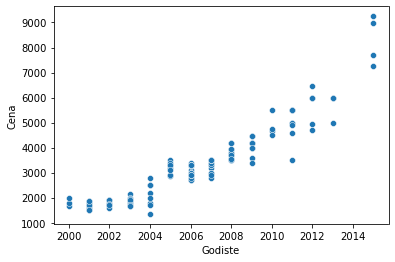

In [339]:
for model in df['Model'].unique():
    
    print('-'*35)
    print('Model {}'.format(model))

    sns.scatterplot('Godiste', 'Cena', data=df[df['Model']==model])
    plt.show()


In [340]:
df

Marka   Model  Godiste  Kilometraza Karoserija Gorivo  Kubikaza  \
571     BMW     116     2015       194000     Hecbek  Dizel       1.5   
3183    BMW     116     2015       176000     Hecbek  Dizel       1.5   
4778    BMW     116     2017       184924     Hecbek  Dizel       1.5   
4915    BMW     116     2016       185000     Hecbek  Dizel       1.5   
12701   BMW     116     2015       197000     Hecbek  Dizel       1.5   
...     ...     ...      ...          ...        ...    ...       ...   
24063  Opel  Zafira     2004       168000    MiniVan  Dizel       2.0   
24571  Opel  Zafira     2003       225000    MiniVan  Dizel       2.0   
25238  Opel  Zafira     2003       315234    MiniVan  Dizel       2.0   
25246  Opel  Zafira     2004       225000    MiniVan  Dizel       2.0   
25914  Opel  Zafira     2002       220000    MiniVan  Dizel       2.0   

       Snaga motora   Cena     Pogon                        Menjac   Boja  
571             115  10900   Zadnji             Manuelni 6 brzina   Plava  
3183            115  10990   Zadnji             Manuelni 6 brzina    Crna  
4778            115  12300   Zadnji   Automatski / poluautomatski    Crna  
4915            115  13800   Zadnji   Automatski / poluautomatski    Bela  
12701           115  10290   Zadnji             Manuelni 6 brzina   Plava  
...             ...    ...       ...                           ...    ...  
24063           100   2500  Prednji             Manuelni 5 brzina    Siva  
24571           100   1700  Prednji             Manuelni 5 brzina   Druga  
25238           100   1650  Prednji             Manuelni 5 brzina    Siva  
25246           100   1999  Prednji             Manuelni 5 brzina   Plava  
25914           100   1700  Prednji             Manuelni 5 brzina   Druga  

[13036 rows x 12 columns]

In [342]:
df['Boja'].value_counts()

Siva      5056
Crna      3362
Druga     1634
Plava     1292
Bela      1245
Crvena     447
Name: Boja, dtype: int64

In [347]:
df['Menjac'].value_counts()

Manuelni 5 brzina               6413
Manuelni 6 brzina               4996
Automatski / poluautomatski     1627
Name: Menjac, dtype: int64

In [348]:
#df.to_csv('./Data/cleanedUsedCars.csv', index=False)
df.to_csv('./Data/usedCleaned21.csv', index=False)